# Load Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymannkendall as mk
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.model_selection import train_test_split  
from sklearn import metrics  
from statsmodels.tsa.arima.model import ARIMA
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing




# Load Datasets

In [2]:
Net_Migration = pd.read_csv('Net_Migration.csv', sep= ",")
Immigration = pd.read_csv('Immigration.csv', sep= ",")
Emigration = pd.read_csv('Emigration.csv', sep= ",")

# Net_Migration

In [3]:
Net_Migration

,Unnamed: 0,Year,Migration Percentage of Population,T-1 Net migration 25-44 years,T-1 Enterprises_Ireland_250+,T-1 General Surplus/Deficit (Million Euros),T-1 Trade Volume Index Imports (Base 2010),T-1 Housing_CPI,T-1 Trade Volume Index Exports (Base 2010),T-1 Unemployment rate_Ireland_Total_Foreign-born,T-1 Emigrants 15-24 years,T-1 Emigrants_EU15 to EU27,T-1 South Asia Percentage Change,T-1 Migration Percentage of Population,T-1 Crisis Indicator,Events_Positive_Impact,Events_Negative_Impact,Events_Impact
0,0,1952.0,NaN,NaN,NaN,NaN,4.6,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0,0,0,0
1,1,1953.0,NaN,NaN,NaN,NaN,3.9,NaN,1.2,NaN,NaN,NaN,NaN,NaN,0,0,0,0
2,2,1954.0,NaN,NaN,NaN,NaN,4.4,NaN,1.3,NaN,NaN,NaN,NaN,NaN,0,0,0,0
3,3,1955.0,NaN,NaN,NaN,NaN,4.3,NaN,1.4,NaN,NaN,NaN,NaN,NaN,0,0,0,0
4,4,1956.0,NaN,NaN,NaN,NaN,4.8,NaN,1.3,NaN,NaN,NaN,NaN,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,69,2021.0,0.433127,16666.666667,666.0,-18704.0,194.4,-1.008333,188.6,7.5,10266.666667,7900.0,1.124469,0.896621,2,0,0,0
70,70,2022.0,1.008354,13066.666667,NaN,-6565.0,214.5,5.650000,191.3,7.5,12733.333333,4400.0,1.029464,0.433127,1,1,0,1
71,71,2023.0,NaN,21466.666667,NaN,8635.0,275.2,20.483333,233.9,4.9,14033.333333,5000.0,0.916783,1.008354,0,0,0,0
72,72,2024.0,NaN,NaN,NaN,8328.0,NaN,NaN,NaN,NaN,NaN,8800.0,NaN,NaN,0,0,0,0


In [4]:
Net_Migration.head()

,Unnamed: 0,Year,Migration Percentage of Population,T-1 Net migration 25-44 years,T-1 Enterprises_Ireland_250+,T-1 General Surplus/Deficit (Million Euros),T-1 Trade Volume Index Imports (Base 2010),T-1 Housing_CPI,T-1 Trade Volume Index Exports (Base 2010),T-1 Unemployment rate_Ireland_Total_Foreign-born,T-1 Emigrants 15-24 years,T-1 Emigrants_EU15 to EU27,T-1 South Asia Percentage Change,T-1 Migration Percentage of Population,T-1 Crisis Indicator,Events_Positive_Impact,Events_Negative_Impact,Events_Impact
0,0,1952.0,NaN,NaN,NaN,NaN,4.6,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0,0,0,0
1,1,1953.0,NaN,NaN,NaN,NaN,3.9,NaN,1.2,NaN,NaN,NaN,NaN,NaN,0,0,0,0
2,2,1954.0,NaN,NaN,NaN,NaN,4.4,NaN,1.3,NaN,NaN,NaN,NaN,NaN,0,0,0,0
3,3,1955.0,NaN,NaN,NaN,NaN,4.3,NaN,1.4,NaN,NaN,NaN,NaN,NaN,0,0,0,0
4,4,1956.0,NaN,NaN,NaN,NaN,4.8,NaN,1.3,NaN,NaN,NaN,NaN,NaN,0,0,0,0


In [5]:
# remove first 9 rows of dataframe
Net_Migration.drop(Net_Migration.index[72:74], inplace=True)
Net_Migration.drop(Net_Migration.index[:9], inplace=True)

# remove .0 from 'Year' column
Net_Migration['Year'] = Net_Migration['Year'].astype(str).str[:-2].astype(int)

# Set 'Year' as the index
Net_Migration.set_index('Year', inplace=True)

Net_Migration.tail()

,Unnamed: 0,Migration Percentage of Population,T-1 Net migration 25-44 years,T-1 Enterprises_Ireland_250+,T-1 General Surplus/Deficit (Million Euros),T-1 Trade Volume Index Imports (Base 2010),T-1 Housing_CPI,T-1 Trade Volume Index Exports (Base 2010),T-1 Unemployment rate_Ireland_Total_Foreign-born,T-1 Emigrants 15-24 years,T-1 Emigrants_EU15 to EU27,T-1 South Asia Percentage Change,T-1 Migration Percentage of Population,T-1 Crisis Indicator,Events_Positive_Impact,Events_Negative_Impact,Events_Impact
Year,,,,,,,,,,,,,,,,,
2019,67,0.891710,12600.000000,657.0,437.0,189.2,5.100000,156.2,7.2,7866.666667,6000.0,1.187652,0.912207,0,0,0,0
2020,68,0.896621,15333.333333,732.0,1695.0,192.7,3.766667,168.5,5.9,11466.666667,3700.0,1.144473,0.891710,0,0,1,1
2021,69,0.433127,16666.666667,666.0,-18704.0,194.4,-1.008333,188.6,7.5,10266.666667,7900.0,1.124469,0.896621,2,0,0,0
2022,70,1.008354,13066.666667,NaN,-6565.0,214.5,5.650000,191.3,7.5,12733.333333,4400.0,1.029464,0.433127,1,1,0,1
2023,71,NaN,21466.666667,NaN,8635.0,275.2,20.483333,233.9,4.9,14033.333333,5000.0,0.916783,1.008354,0,0,0,0


In [6]:
# make loop to check which year data starts for each variable
for i in range(0, len(Net_Migration.columns)):
    print(Net_Migration.columns[i], ", ", Net_Migration.iloc[:,i].first_valid_index())


Unnamed: 0 ,  1961
Migration Percentage of Population ,  1961
T-1 Net migration 25-44 years ,  2003
T-1 Enterprises_Ireland_250+ ,  2009
T-1 General Surplus/Deficit (Million Euros) ,  1996
T-1 Trade Volume Index Imports (Base 2010) ,  1961
T-1 Housing_CPI ,  1998
T-1 Trade Volume Index Exports (Base 2010) ,  1961
T-1 Unemployment rate_Ireland_Total_Foreign-born ,  2001
T-1 Emigrants 15-24 years ,  1988
T-1 Emigrants_EU15 to EU27 ,  2006
T-1 South Asia Percentage Change ,  1962
T-1 Migration Percentage of Population ,  1961
T-1 Crisis Indicator ,  1961
Events_Positive_Impact ,  1961
Events_Negative_Impact ,  1961
Events_Impact ,  1961


# Check multicorrelation all variables

high multicorrelation related to all variables in dataframe Net Migration

In [7]:
# Drop rows with missing values
X = Net_Migration[['T-1 Net migration 25-44 years', 
                   'T-1 Enterprises_Ireland_250+',
                   'T-1 General Surplus/Deficit (Million Euros)',
                   'T-1 Trade Volume Index Imports (Base 2010)',
                   'T-1 Housing_CPI',
                   'T-1 Trade Volume Index Exports (Base 2010)',
                   'T-1 Unemployment rate_Ireland_Total_Foreign-born',
                   'T-1 Emigrants 15-24 years',
                   'T-1 Emigrants_EU15 to EU27',
                   'T-1 South Asia Percentage Change',
                   'T-1 Migration Percentage of Population',
                   'T-1 Crisis Indicator'
                   ]]
X = X.dropna()

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
vif_data

,feature,VIF
0,T-1 Net migration 25-44 years,183.799849
1,T-1 Enterprises_Ireland_250+,5077.580386
2,T-1 General Surplus/Deficit (Million Euros),213.700714
3,T-1 Trade Volume Index Imports (Base 2010),30255.847120
4,T-1 Housing_CPI,17.073516
5,T-1 Trade Volume Index Exports (Base 2010),14994.485807
6,T-1 Unemployment rate_Ireland_Total_Foreign-born,5021.595815
7,T-1 Emigrants 15-24 years,3015.359632
8,T-1 Emigrants_EU15 to EU27,159.144990
9,T-1 South Asia Percentage Change,22270.295267


# Checking for multicorrelation different migration variables

In [8]:
# Drop rows with missing values
X = Net_Migration[['T-1 Migration Percentage of Population', 'T-1 Net migration 25-44 years', 'T-1 Emigrants 15-24 years', 'T-1 Emigrants_EU15 to EU27']]
X = X.dropna()

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

# Drop rows with missing values
X = Net_Migration[['T-1 Migration Percentage of Population', 'T-1 Net migration 25-44 years']]
X = X.dropna()

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

# Drop rows with missing values
X = Net_Migration[['T-1 Emigrants 15-24 years', 'T-1 Net migration 25-44 years', 'T-1 Emigrants_EU15 to EU27']]
X = X.dropna()

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

# Drop rows with missing values
X = Net_Migration[['T-1 Migration Percentage of Population', 'T-1 Emigrants 15-24 years', 'T-1 Emigrants_EU15 to EU27']]
X = X.dropna()

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

                                  feature        VIF
0  T-1 Migration Percentage of Population  18.501472
1           T-1 Net migration 25-44 years  22.158589
2               T-1 Emigrants 15-24 years  12.855338
3              T-1 Emigrants_EU15 to EU27  12.340205
                                  feature        VIF
0  T-1 Migration Percentage of Population  11.043816
1           T-1 Net migration 25-44 years  11.043816
                         feature       VIF
0      T-1 Emigrants 15-24 years  7.746485
1  T-1 Net migration 25-44 years  1.460832
2     T-1 Emigrants_EU15 to EU27  6.806796
                                  feature       VIF
0  T-1 Migration Percentage of Population  1.219732
1               T-1 Emigrants 15-24 years  6.237245
2              T-1 Emigrants_EU15 to EU27  5.729191


# Check for multicorrelation with trading variables

In [9]:
# Drop rows with missing values
X = Net_Migration[['T-1 General Surplus/Deficit (Million Euros)', 'T-1 Trade Volume Index Exports (Base 2010)','T-1 Trade Volume Index Imports (Base 2010)' ]]
X = X.dropna()

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

# Drop rows with missing values
X = Net_Migration[['T-1 General Surplus/Deficit (Million Euros)', 'T-1 Trade Volume Index Exports (Base 2010)' ]]
X = X.dropna()

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

# Drop rows with missing values
X = Net_Migration[['T-1 General Surplus/Deficit (Million Euros)', 'T-1 Trade Volume Index Imports (Base 2010)' ]]
X = X.dropna()

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

                                       feature         VIF
0  T-1 General Surplus/Deficit (Million Euros)    1.445117
1   T-1 Trade Volume Index Exports (Base 2010)  202.282418
2   T-1 Trade Volume Index Imports (Base 2010)  196.845912
                                       feature       VIF
0  T-1 General Surplus/Deficit (Million Euros)  1.151946
1   T-1 Trade Volume Index Exports (Base 2010)  1.151946
                                       feature       VIF
0  T-1 General Surplus/Deficit (Million Euros)  1.120986
1   T-1 Trade Volume Index Imports (Base 2010)  1.120986


# Correlation Matrix

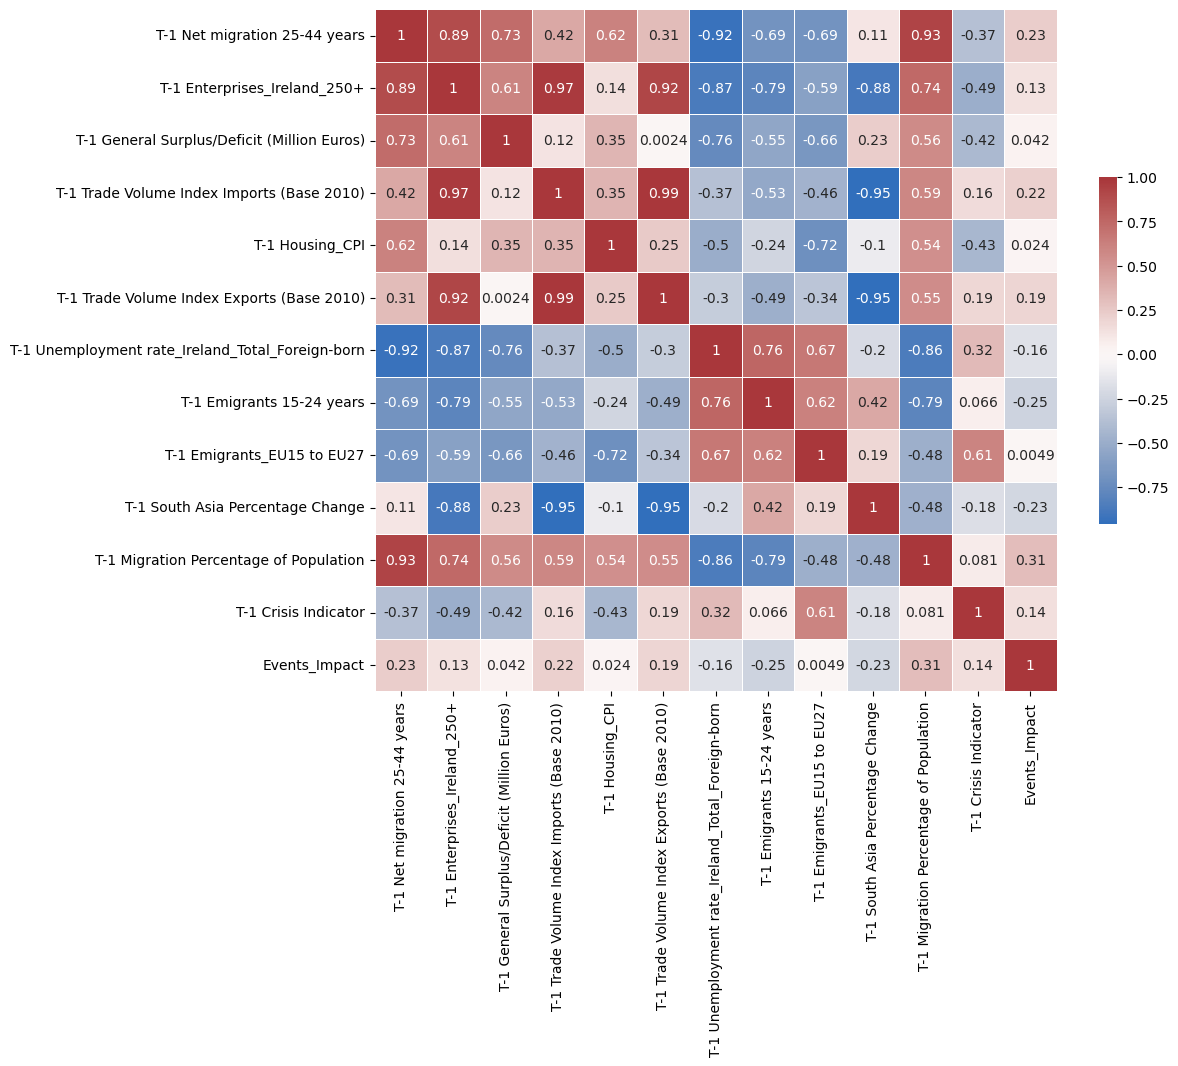

In [10]:
X = Net_Migration[['T-1 Net migration 25-44 years', 
                   'T-1 Enterprises_Ireland_250+',
                   'T-1 General Surplus/Deficit (Million Euros)',
                   'T-1 Trade Volume Index Imports (Base 2010)',
                   'T-1 Housing_CPI',
                   'T-1 Trade Volume Index Exports (Base 2010)',
                   'T-1 Unemployment rate_Ireland_Total_Foreign-born',
                   'T-1 Emigrants 15-24 years',
                   'T-1 Emigrants_EU15 to EU27',
                   'T-1 South Asia Percentage Change',
                   'T-1 Migration Percentage of Population',
                   'T-1 Crisis Indicator',
                   'Events_Impact'
                   ]]

# correlation matrix 
corr = X.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio and show correlation values
sns.heatmap(corr, cmap='vlag', center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)


plt.show()

# Simple Modelling without Extra Variables

In [11]:
migration_indexed = Net_Migration[['Migration Percentage of Population']]

### ARIMA (1,0,3)

In [12]:
# Calculate the index for splitting
split_index = int(len(migration_indexed['Migration Percentage of Population']) *0.8)

# Split the data into training and testing sets
y_train = migration_indexed['Migration Percentage of Population'][:split_index]
y_test = migration_indexed['Migration Percentage of Population'][split_index:]

In [13]:
model = ARIMA(y_train, order=(1,0,3))
model_fit = model.fit()
model_fit.summary()

c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:     Migration Percentage of Population   No. Observations:                   50
Model:                                 ARIMA(1, 0, 3)   Log Likelihood                 -16.385
Date:                                Sun, 02 Jun 2024   AIC                             44.771
Time:                                        17:43:42   BIC                             56.243
Sample:                                             0   HQIC                            49.139
                                                 - 50                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0436      0.235     -0.185      0.853      -0.505       0.417
ar.L1          0.1874      0.155      1.207      0.228      -0.117       0.492
ma.L1          1.1990      0.264      4.537      0.000       0.681       1.717
ma.L2          1.2672      1.216      1.042      0.297      -1.117       3.651
ma.L3          0.8840      0.967      0.915      0.360      -1.010       2.778
sigma2         0.0971      0.097      1.003      0.316      -0.093       0.287
===================================================================================
Ljung-Box (L1) (Q):                   0.55   Jarque-Bera (JB):                 0.21
Prob(Q):                              0.46   Prob(JB):                         0.90
Heteroskedasticity (H):               1.58   Skew:                            -0.10
Prob(H) (two-sided):                  0.35   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
# Assuming 'migration_indexed' has a datetime index
index = migration_indexed.index

# Predict using the model and specify the index
y_pred = model_fit.predict(start=split_index, end=len(migration_indexed)-1, typ='levels', index=index[split_index:])

# Create a DataFrame for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).dropna()  
print(comparison)

# Extract the filtered y_test and y_pred
y_test_filtered = comparison['Actual']
y_pred_filtered = comparison['Predicted']

# get confidence interval
forecast = model_fit.get_forecast(steps=12)
yhat_conf_int = forecast.conf_int(alpha=0.05)

yhat_conf_int['year'] = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
yhat_conf_int.set_index('year', inplace=True)

lower_bounds = yhat_conf_int[['lower Migration Percentage of Population']]
upper_bounds = yhat_conf_int[['upper Migration Percentage of Population']]

comparison['lower_bounds'] = lower_bounds
comparison['upper_bounds'] = upper_bounds

comparison

        Actual  Predicted
Year                     
2011 -0.598242  -1.040493
2012 -0.558752  -0.546481
2013 -0.404428  -0.104940
2014 -0.182492  -0.055090
2015  0.125480  -0.045750
2016  0.340670  -0.044000
2017  0.815412  -0.043672
2018  0.912207  -0.043610
2019  0.891710  -0.043599
2020  0.896621  -0.043597
2021  0.433127  -0.043596
2022  1.008354  -0.043596


c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,Actual,Predicted,lower_bounds,upper_bounds
Year,,,,
2011,-0.598242,-1.040493,-1.660476,-0.420510
2012,-0.558752,-0.546481,-1.603994,0.511033
2013,-0.404428,-0.104940,-1.509667,1.299788
2014,-0.182492,-0.055090,-1.626618,1.516439
2015,0.125480,-0.045750,-1.622813,1.531314
2016,0.340670,-0.044000,-1.621257,1.533258
2017,0.815412,-0.043672,-1.620936,1.533593
2018,0.912207,-0.043610,-1.620875,1.533654
2019,0.891710,-0.043599,-1.620864,1.533666


In [15]:
print('MAE:', metrics.mean_absolute_error(y_test_filtered, y_pred_filtered))
print('MSE:', metrics.mean_squared_error(y_test_filtered, y_pred_filtered))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_filtered, y_pred_filtered)))

MAE: 0.5547010017556254
MSE: 0.4352697886410959
RMSE: 0.6597497924524841


In [16]:
# fitted values for model_fit with year in dataframe
migration_indexed['fitted_values'] = model_fit.fittedvalues
migration_indexed['predicted_values']  = model_fit.predict(start=split_index, end=len(migration_indexed)-1, typ='levels', index=index[split_index:])

C:\Users\joosl\AppData\Local\Temp\ipykernel_36212\3203500162.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  migration_indexed['fitted_values'] = model_fit.fittedvalues
c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\joosl\AppData\Local\Temp\ipykernel_36212\3203500162.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

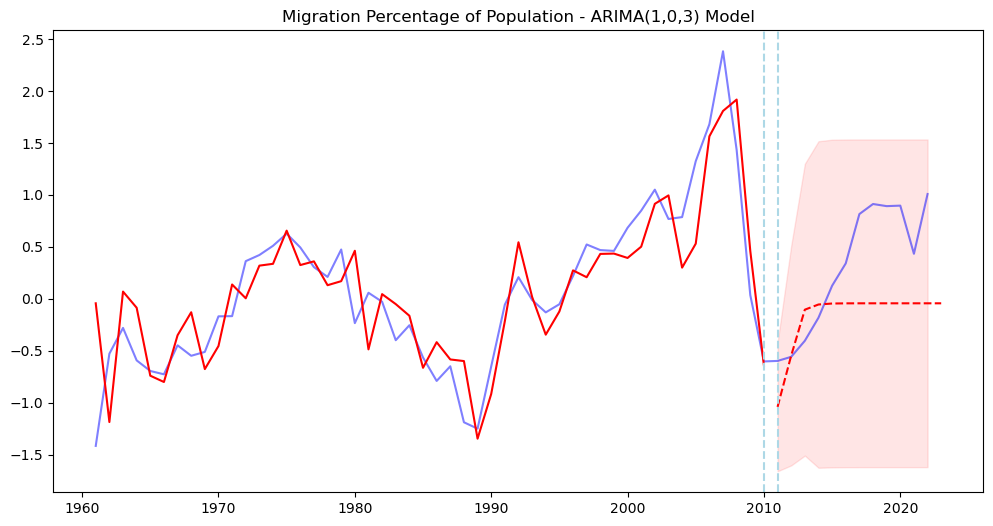

In [17]:
# plot data
plt.figure(figsize=(12,6))
plt.plot(migration_indexed['Migration Percentage of Population'], color='blue', alpha=0.5)
plt.plot(migration_indexed['fitted_values'], color='red')
plt.plot(migration_indexed['predicted_values'], color='red', linestyle='dashed')

# add confidence interval
plt.fill_between(comparison.index, comparison['lower_bounds'], comparison['upper_bounds'], color='red', alpha=0.1, label='95% CI')

# line at split_index
plt.axvline(x=2010, color='lightblue', linestyle='--')
plt.axvline(x=2011, color='lightblue', linestyle='--')


plt.title('Migration Percentage of Population - ARIMA(1,0,3) Model')
plt.show()

### ARIMA (1,1,3)

In [18]:
# Calculate the index for splitting
split_index = int(len(migration_indexed['Migration Percentage of Population']) *0.8)

# Split the data into training and testing sets
y_train = migration_indexed['Migration Percentage of Population'][:split_index]
y_test = migration_indexed['Migration Percentage of Population'][split_index:]

In [19]:
model = ARIMA(y_train, order=(1,1,3))
model_fit = model.fit()
model_fit.summary()

c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:     Migration Percentage of Population   No. Observations:                   50
Model:                                 ARIMA(1, 1, 3)   Log Likelihood                 -21.739
Date:                                Sun, 02 Jun 2024   AIC                             53.479
Time:                                        17:43:43   BIC                             62.938
Sample:                                             0   HQIC                            57.067
                                                 - 50                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8277      0.339      2.442      0.015       0.163       1.492
ma.L1         -0.5306      0.419     -1.267      0.205      -1.352       0.290
ma.L2         -0.5023      0.176     -2.853      0.004      -0.847      -0.157
ma.L3          0.0589      0.260      0.226      0.821      -0.451       0.569
sigma2         0.1388      0.032      4.300      0.000       0.076       0.202
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 2.66
Prob(Q):                              0.73   Prob(JB):                         0.26
Heteroskedasticity (H):               2.15   Skew:                            -0.48
Prob(H) (two-sided):                  0.14   Kurtosis:                         3.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
# Assuming 'migration_indexed' has a datetime index
index = migration_indexed.index

# Predict using the model and specify the index
y_pred = model_fit.predict(start=split_index, end=len(migration_indexed)-1, typ='levels', index=index[split_index:])

# Create a DataFrame for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).dropna()  
print(comparison)

# Extract the filtered y_test and y_pred
y_test_filtered = comparison['Actual']
y_pred_filtered = comparison['Predicted']


# get confidence interval
forecast = model_fit.get_forecast(steps=12)
yhat_conf_int = forecast.conf_int(alpha=0.05)

yhat_conf_int['year'] = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
yhat_conf_int.set_index('year', inplace=True)

lower_bounds = yhat_conf_int[['lower Migration Percentage of Population']]
upper_bounds = yhat_conf_int[['upper Migration Percentage of Population']]

comparison['lower_bounds'] = lower_bounds
comparison['upper_bounds'] = upper_bounds

comparison


        Actual  Predicted
Year                     
2011 -0.598242  -0.638572
2012 -0.558752  -0.522370
2013 -0.404428  -0.448071
2014 -0.182492  -0.386575
2015  0.125480  -0.335678
2016  0.340670  -0.293551
2017  0.815412  -0.258684
2018  0.912207  -0.229826
2019  0.891710  -0.205941
2020  0.896621  -0.186173
2021  0.433127  -0.169811
2022  1.008354  -0.156268


c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,Actual,Predicted,lower_bounds,upper_bounds
Year,,,,
2011,-0.598242,-0.638572,-1.370283,0.093140
2012,-0.558752,-0.522370,-1.723132,0.678391
2013,-0.404428,-0.448071,-1.873477,0.977336
2014,-0.182492,-0.386575,-1.956724,1.183574
2015,0.125480,-0.335678,-2.005232,1.333877
2016,0.340670,-0.293551,-2.034067,1.446965
2017,0.815412,-0.258684,-2.051309,1.533941
2018,0.912207,-0.229826,-2.061619,1.601966
2019,0.891710,-0.205941,-2.067789,1.655907


In [21]:
print('MAE:', metrics.mean_absolute_error(y_test_filtered, y_pred_filtered))
print('MSE:', metrics.mean_squared_error(y_test_filtered, y_pred_filtered))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_filtered, y_pred_filtered)))

MAE: 0.6319958023998683
MSE: 0.6013740058036164
RMSE: 0.7754830789924538


In [22]:
# fitted values for model_fit with year in dataframe
migration_indexed['fitted_values'] = model_fit.fittedvalues
migration_indexed['predicted_values']  = model_fit.predict(start=split_index, end=len(migration_indexed)-1, typ='levels', index=index[split_index:])

C:\Users\joosl\AppData\Local\Temp\ipykernel_36212\3203500162.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  migration_indexed['fitted_values'] = model_fit.fittedvalues
c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\joosl\AppData\Local\Temp\ipykernel_36212\3203500162.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

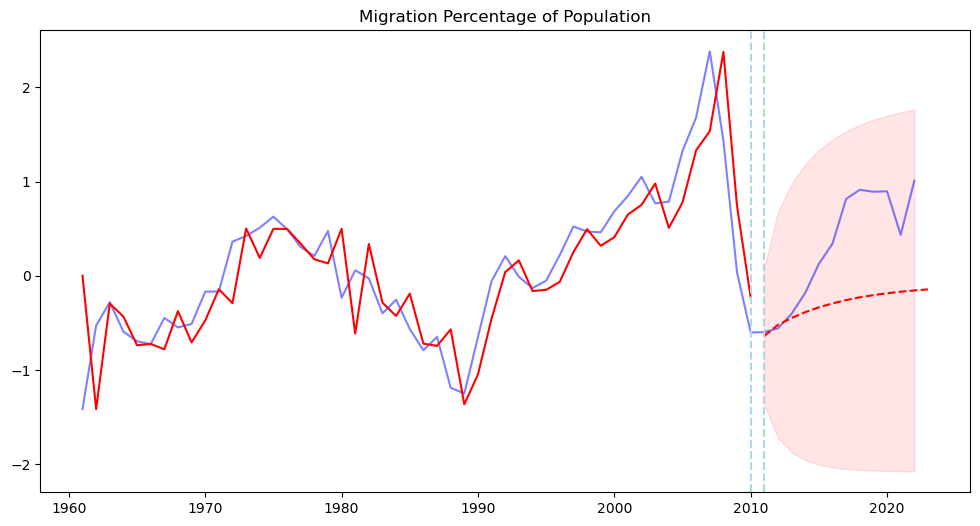

In [23]:
# plot data
plt.figure(figsize=(12,6))
plt.plot(migration_indexed['Migration Percentage of Population'], color='blue', alpha=0.5)
plt.plot(migration_indexed['fitted_values'], color='red')
plt.plot(migration_indexed['predicted_values'], color='red', linestyle='dashed')

# add confidence interval
plt.fill_between(comparison.index, comparison['lower_bounds'], comparison['upper_bounds'], color='red', alpha=0.1, label='95% CI')


# line at split_index
plt.axvline(x=2010, color='lightblue', linestyle='--')
plt.axvline(x=2011, color='lightblue', linestyle='--')


plt.title('Migration Percentage of Population')
plt.show()

### SES

In [24]:
Net_Migration.columns

Index(['Unnamed: 0', 'Migration Percentage of Population',
       'T-1 Net migration 25-44 years', 'T-1 Enterprises_Ireland_250+',
       'T-1 General Surplus/Deficit (Million Euros)',
       'T-1 Trade Volume Index Imports (Base 2010)', 'T-1 Housing_CPI',
       'T-1 Trade Volume Index Exports (Base 2010)',
       'T-1 Unemployment rate_Ireland_Total_Foreign-born',
       'T-1 Emigrants 15-24 years', 'T-1 Emigrants_EU15 to EU27',
       'T-1 South Asia Percentage Change',
       'T-1 Migration Percentage of Population', 'T-1 Crisis Indicator',
       'Events_Positive_Impact', 'Events_Negative_Impact', 'Events_Impact'],
      dtype='object')

In [25]:
# ses model
Net_Migration_na = Net_Migration[['Migration Percentage of Population']].dropna()
y = Net_Migration_na['Migration Percentage of Population']

# Split the data into training and testing sets
split_index = int(len(X) * 0.8)
y_train = y[:split_index]
y_test = y[split_index:]

# arima model including exogenous variables
model = SimpleExpSmoothing(y_train)
model_fit = model.fit()

model_fit.summary()

c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Dep. Variable:,Migration Percentage of Population,No. Observations:,50
Model:,SimpleExpSmoothing,SSE,8.205
Optimized:,True,AIC,-86.361
Trend:,None,BIC,-82.537
Seasonal:,None,AICC,-85.472
Seasonal Periods:,None,Date:,"Sun, 02 Jun 2024"
Box-Cox:,False,Time:,17:43:43
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
initial_level,-1.4162300,l.0,False


In [26]:
# Predict using the model and specify the index
y_pred = model_fit.forecast(len(y_test))
y_pred

# fix index y_pred
y_pred.index = y_test.index
y_pred

# Create a DataFrame for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).dropna()  
print(comparison)

# Extract the filtered y_test and y_pred
y_test_filtered = comparison['Actual']
y_pred_filtered = comparison['Predicted']


        Actual  Predicted
Year                     
2011 -0.598242   -0.60305
2012 -0.558752   -0.60305
2013 -0.404428   -0.60305
2014 -0.182492   -0.60305
2015  0.125480   -0.60305
2016  0.340670   -0.60305
2017  0.815412   -0.60305
2018  0.912207   -0.60305
2019  0.891710   -0.60305
2020  0.896621   -0.60305
2021  0.433127   -0.60305
2022  1.008354   -0.60305


c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [27]:
print('MAE:', metrics.mean_absolute_error(y_test_filtered, y_pred_filtered))
print('MSE:', metrics.mean_squared_error(y_test_filtered, y_pred_filtered))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_filtered, y_pred_filtered)))

MAE: 0.9096884885235523
MSE: 1.175108674893138
RMSE: 1.0840242962651427


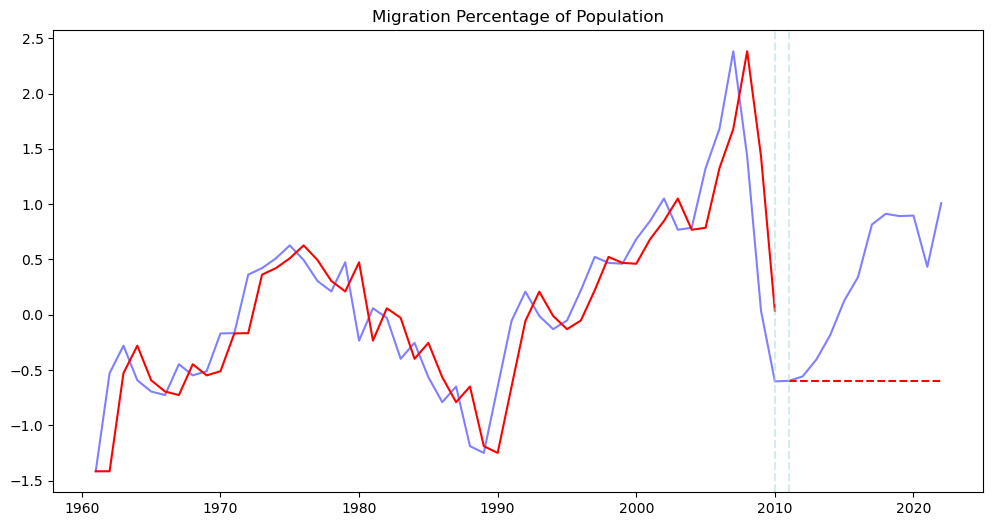

In [28]:
# plot data
Net_Migration_na['predicted_values'] = comparison['Predicted']
Net_Migration_na['fitted_values'] = model_fit.fittedvalues
plt.figure(figsize=(12,6))
plt.plot(Net_Migration_na['Migration Percentage of Population'], color='blue', alpha=0.5)
plt.plot(Net_Migration_na['predicted_values'], color='red', linestyle='dashed')
plt.plot(Net_Migration_na['fitted_values'], color='red')


# add line at 2016.5
plt.axvline(x=2010, color='lightblue', linestyle='--', alpha=0.5)
plt.axvline(x=2011, color='lightblue', linestyle='--', alpha=0.5)


plt.title('Migration Percentage of Population')
plt.show()

### HWES (add additive trend, because seen from test increasing trend in data)

In [29]:
Net_Migration.columns

Index(['Unnamed: 0', 'Migration Percentage of Population',
       'T-1 Net migration 25-44 years', 'T-1 Enterprises_Ireland_250+',
       'T-1 General Surplus/Deficit (Million Euros)',
       'T-1 Trade Volume Index Imports (Base 2010)', 'T-1 Housing_CPI',
       'T-1 Trade Volume Index Exports (Base 2010)',
       'T-1 Unemployment rate_Ireland_Total_Foreign-born',
       'T-1 Emigrants 15-24 years', 'T-1 Emigrants_EU15 to EU27',
       'T-1 South Asia Percentage Change',
       'T-1 Migration Percentage of Population', 'T-1 Crisis Indicator',
       'Events_Positive_Impact', 'Events_Negative_Impact', 'Events_Impact'],
      dtype='object')

In [30]:
# hwes model
Net_Migration_na = Net_Migration[['Migration Percentage of Population']].dropna()
y = Net_Migration_na['Migration Percentage of Population']

# Split the data into training and testing sets
split_index = int(len(X) * 0.8)
y_train = y[:split_index]
y_test = y[split_index:]

model = ExponentialSmoothing(y_train, trend='additive', seasonal=None)
model_fit = model.fit()

model_fit.summary()

c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Dep. Variable:,Migration Percentage of Population,No. Observations:,50
Model:,ExponentialSmoothing,SSE,8.192
Optimized:,True,AIC,-82.444
Trend:,Additive,BIC,-74.796
Seasonal:,None,AICC,-80.490
Seasonal Periods:,None,Date:,"Sun, 02 Jun 2024"
Box-Cox:,False,Time:,17:43:43
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_trend,0.000000,beta,True


In [31]:
# Predict using the model and specify the index
y_pred = model_fit.forecast(len(y_test))
y_pred

# fix index y_pred
y_pred.index = y_test.index
y_pred

# Create a DataFrame for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).dropna()  
print(comparison)

# Extract the filtered y_test and y_pred
y_test_filtered = comparison['Actual']
y_pred_filtered = comparison['Predicted']


        Actual  Predicted
Year                     
2011 -0.598242  -0.586412
2012 -0.558752  -0.569774
2013 -0.404428  -0.553136
2014 -0.182492  -0.536498
2015  0.125480  -0.519860
2016  0.340670  -0.503222
2017  0.815412  -0.486584
2018  0.912207  -0.469946
2019  0.891710  -0.453308
2020  0.896621  -0.436670
2021  0.433127  -0.420032
2022  1.008354  -0.403394


c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [32]:
print('MAE:', metrics.mean_absolute_error(y_test_filtered, y_pred_filtered))
print('MSE:', metrics.mean_squared_error(y_test_filtered, y_pred_filtered))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_filtered, y_pred_filtered)))

MAE: 0.8035135297149575
MSE: 0.9324586502073005
RMSE: 0.9656389854429556


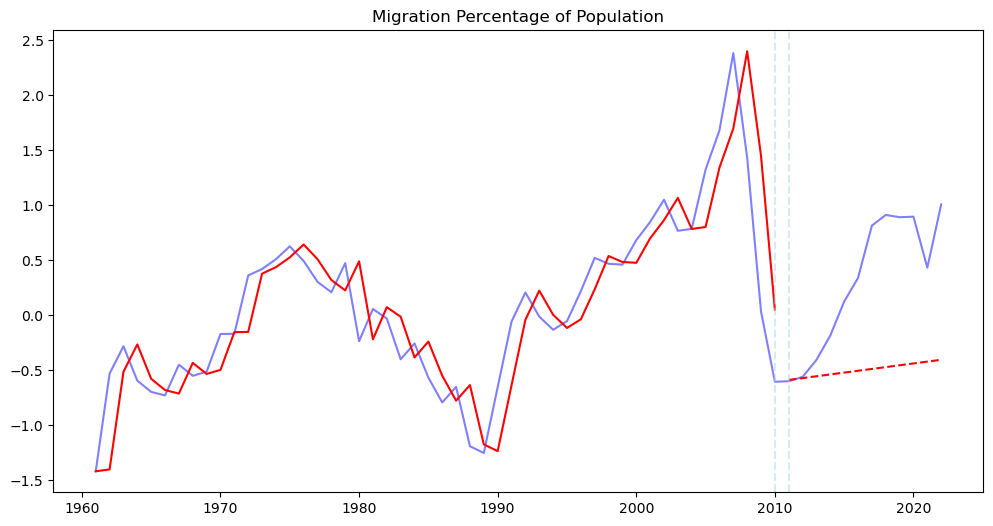

In [33]:
# plot data
Net_Migration_na['predicted_values'] = comparison['Predicted']
Net_Migration_na['fitted_values'] = model_fit.fittedvalues
plt.figure(figsize=(12,6))
plt.plot(Net_Migration_na['Migration Percentage of Population'], color='blue', alpha=0.5)
plt.plot(Net_Migration_na['predicted_values'], color='red', linestyle='dashed')
plt.plot(Net_Migration_na['fitted_values'], color='red')


# add line at 2016.5
plt.axvline(x=2010, color='lightblue', linestyle='--', alpha=0.5)
plt.axvline(x=2011, color='lightblue', linestyle='--', alpha=0.5)


plt.title('Migration Percentage of Population')
plt.show()

# Simple OLS t-1 migratiob 25-44 years

In [34]:
# t-1 migratiob 25-44 years
Net_Migration_na = Net_Migration[['Migration Percentage of Population', 'T-1 Net migration 25-44 years']].dropna()
X = Net_Migration_na['T-1 Net migration 25-44 years']
y = Net_Migration_na['Migration Percentage of Population']

# Split the data into training and testing sets
split_index = int(len(X) * 0.8)
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

model.summary()

c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Migration Percentage of Population   R-squared:                       0.837
Model:                                            OLS   Adj. R-squared:                  0.826
Method:                                 Least Squares   F-statistic:                     72.01
Date:                                Sun, 02 Jun 2024   Prob (F-statistic):           6.85e-07
Time:                                        17:43:44   Log-Likelihood:                -5.9538
No. Observations:                                  16   AIC:                             15.91
Df Residuals:                                      14   BIC:                             17.45
Df Model:                                           1                                         
Covariance Type:                            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.0512      0.109      0.471      0.645      -0.182       0.284
T-1 Net migration 25-44 years  6.076e-05   7.16e-06      8.486      0.000    4.54e-05    7.61e-05
==============================================================================
Omnibus:                        0.828   Durbin-Watson:                   1.327
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.772
Skew:                          -0.318   Prob(JB):                        0.680
Kurtosis:                       2.133   Cond. No.                     1.76e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
# Assuming 'migration_indexed' has a datetime index
index = Net_Migration_na.index

# Predict using the model and specify the index
y_pred = model.predict(sm.add_constant(X_test))
# y_pred = model.predict(start=split_index, end=len(Net_Migration_na)-1, typ='levels', index=index[split_index:])

# Create a DataFrame for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).dropna()  
print(comparison)

# Extract the filtered y_test and y_pred
y_test_filtered = comparison['Actual']
y_pred_filtered = comparison['Predicted']


        Actual  Predicted
Year                     
2019  0.891710   0.816720
2020  0.896621   0.982785
2021  0.433127   1.063793
2022  1.008354   0.845073


In [36]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

MAE: 0.23877505125898077
MSE: 0.10936185511249644
RMSE: 0.3306990400840263


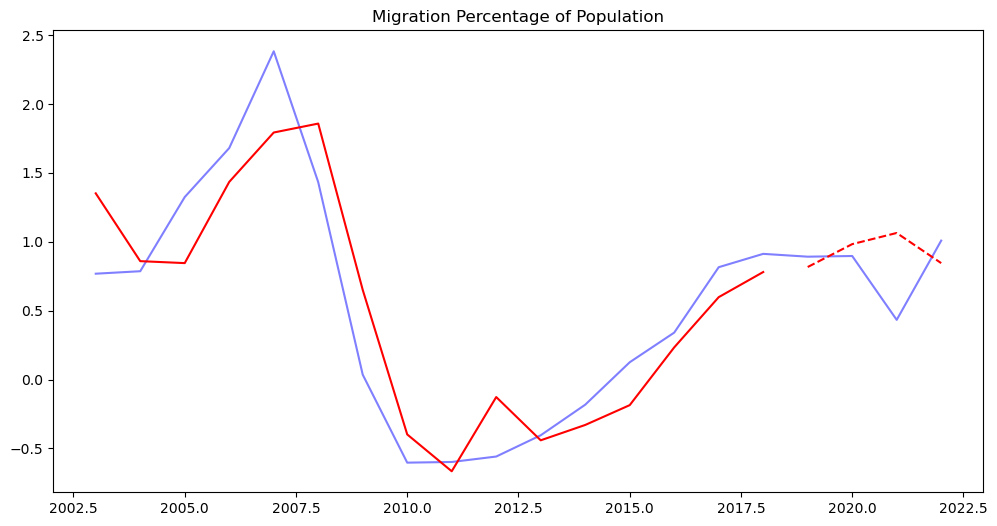

In [37]:
# plot data
Net_Migration_na['fitted_values'] = model.fittedvalues
Net_Migration_na['predicted_values']  = y_pred

plt.figure(figsize=(12,6))
plt.plot(Net_Migration_na['Migration Percentage of Population'], color='blue', alpha=0.5)
plt.plot(Net_Migration_na['fitted_values'], color='red')
plt.plot(Net_Migration_na['predicted_values'], color='red', linestyle='dashed')

plt.title('Migration Percentage of Population')
plt.show()

# Simple OLS t-1 migration 25-44 years & Crisis Indicator

In [38]:
# t-1 migratiob 25-44 years
Net_Migration_na = Net_Migration[['Migration Percentage of Population', 'T-1 Net migration 25-44 years', 'T-1 Crisis Indicator']].dropna()
X = Net_Migration_na[['T-1 Net migration 25-44 years', 'T-1 Crisis Indicator']]
y = Net_Migration_na['Migration Percentage of Population']

# Split the data into training and testing sets
split_index = int(len(X) * 0.8)
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

model.summary()

c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Migration Percentage of Population   R-squared:                       0.883
Model:                                            OLS   Adj. R-squared:                  0.865
Method:                                 Least Squares   F-statistic:                     49.10
Date:                                Sun, 02 Jun 2024   Prob (F-statistic):           8.73e-07
Time:                                        17:43:44   Log-Likelihood:                -3.3059
No. Observations:                                  16   AIC:                             12.61
Df Residuals:                                      13   BIC:                             14.93
Df Model:                                           2                                         
Covariance Type:                            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.3394      0.159      2.129      0.053      -0.005       0.684
T-1 Net migration 25-44 years  5.563e-05   6.69e-06      8.312      0.000    4.12e-05    7.01e-05
T-1 Crisis Indicator             -0.1897      0.084     -2.258      0.042      -0.371      -0.008
==============================================================================
Omnibus:                        0.338   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.844   Jarque-Bera (JB):                0.140
Skew:                           0.201   Prob(JB):                        0.932
Kurtosis:                       2.780   Cond. No.                     3.20e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
# Assuming 'migration_indexed' has a datetime index
index = Net_Migration_na.index

# Predict using the model and specify the index
y_pred = model.predict(sm.add_constant(X_test))
# y_pred = model.predict(start=split_index, end=len(Net_Migration_na)-1, typ='levels', index=index[split_index:])

# Create a DataFrame for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).dropna()  
print(comparison)

# Extract the filtered y_test and y_pred
y_test_filtered = comparison['Actual']
y_pred_filtered = comparison['Predicted']


        Actual  Predicted
Year                     
2019  0.891710   1.040387
2020  0.896621   1.192449
2021  0.433127   0.887159
2022  1.008354   0.876615


In [40]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

MAE: 0.2575686722531061
MSE: 0.08327966620088273
RMSE: 0.28858216542413484


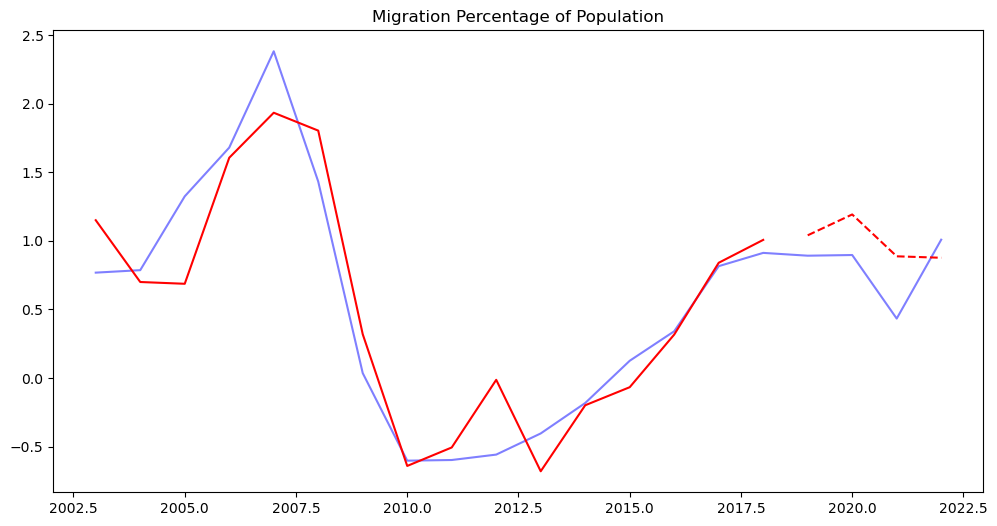

In [41]:
# plot data
Net_Migration_na['fitted_values'] = model.fittedvalues
Net_Migration_na['predicted_values']  = y_pred

plt.figure(figsize=(12,6))
plt.plot(Net_Migration_na['Migration Percentage of Population'], color='blue', alpha=0.5)
plt.plot(Net_Migration_na['fitted_values'], color='red')
plt.plot(Net_Migration_na['predicted_values'], color='red', linestyle='dashed')

plt.title('Migration Percentage of Population')
plt.show()

# Simple OLS t-1 migration 25-44 years & Events Impact

In [42]:
Net_Migration.columns

Index(['Unnamed: 0', 'Migration Percentage of Population',
       'T-1 Net migration 25-44 years', 'T-1 Enterprises_Ireland_250+',
       'T-1 General Surplus/Deficit (Million Euros)',
       'T-1 Trade Volume Index Imports (Base 2010)', 'T-1 Housing_CPI',
       'T-1 Trade Volume Index Exports (Base 2010)',
       'T-1 Unemployment rate_Ireland_Total_Foreign-born',
       'T-1 Emigrants 15-24 years', 'T-1 Emigrants_EU15 to EU27',
       'T-1 South Asia Percentage Change',
       'T-1 Migration Percentage of Population', 'T-1 Crisis Indicator',
       'Events_Positive_Impact', 'Events_Negative_Impact', 'Events_Impact'],
      dtype='object')

In [43]:
# t-1 migratiob 25-44 years
Net_Migration_na = Net_Migration[['Migration Percentage of Population', 'T-1 Net migration 25-44 years', 'Events_Impact']].dropna()
X = Net_Migration_na[['T-1 Net migration 25-44 years', 'Events_Impact']]
y = Net_Migration_na['Migration Percentage of Population']

# Split the data into training and testing sets
split_index = int(len(X) * 0.8)
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

model.summary()

c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Migration Percentage of Population   R-squared:                       0.847
Model:                                            OLS   Adj. R-squared:                  0.823
Method:                                 Least Squares   F-statistic:                     35.88
Date:                                Sun, 02 Jun 2024   Prob (F-statistic):           5.10e-06
Time:                                        17:43:44   Log-Likelihood:                -5.4777
No. Observations:                                  16   AIC:                             16.96
Df Residuals:                                      13   BIC:                             19.27
Df Model:                                           2                                         
Covariance Type:                            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.1040      0.124      0.836      0.418      -0.165       0.373
T-1 Net migration 25-44 years  6.284e-05   7.58e-06      8.289      0.000    4.65e-05    7.92e-05
Events_Impact                    -0.1832      0.205     -0.893      0.388      -0.626       0.260
==============================================================================
Omnibus:                        0.520   Durbin-Watson:                   1.501
Prob(Omnibus):                  0.771   Jarque-Bera (JB):                0.370
Skew:                          -0.330   Prob(JB):                        0.831
Kurtosis:                       2.656   Cond. No.                     3.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
# Assuming 'migration_indexed' has a datetime index
index = Net_Migration_na.index

# Predict using the model and specify the index
y_pred = model.predict(sm.add_constant(X_test))
# y_pred = model.predict(start=split_index, end=len(Net_Migration_na)-1, typ='levels', index=index[split_index:])

# Create a DataFrame for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).dropna()  
print(comparison)

# Extract the filtered y_test and y_pred
y_test_filtered = comparison['Actual']
y_pred_filtered = comparison['Predicted']


        Actual  Predicted
Year                     
2019  0.891710   0.895740
2020  0.896621   0.884305
2021  0.433127   1.151291
2022  1.008354   0.741867


In [45]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

MAE: 0.25024909574862075
MSE: 0.14673546694967313
RMSE: 0.38306065701096625


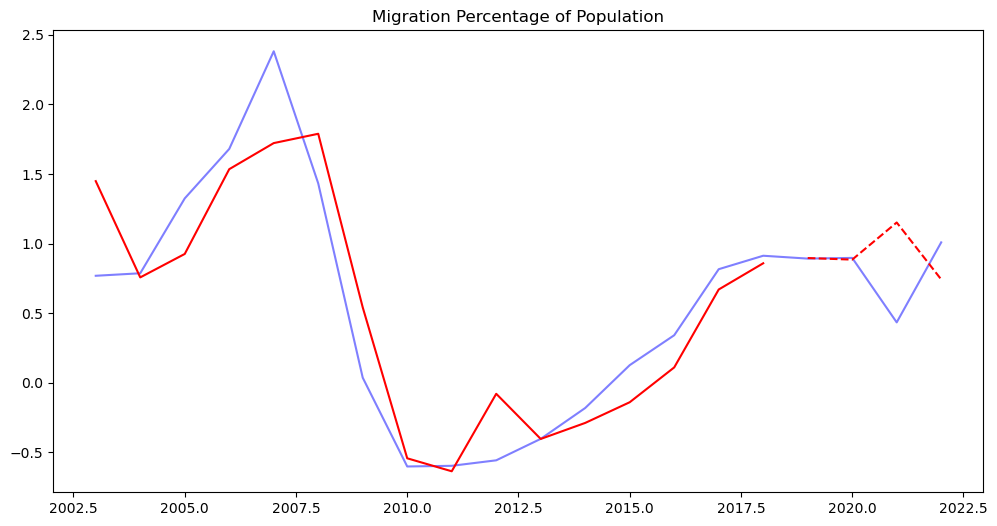

In [46]:
# plot data
Net_Migration_na['fitted_values'] = model.fittedvalues
Net_Migration_na['predicted_values']  = y_pred

plt.figure(figsize=(12,6))
plt.plot(Net_Migration_na['Migration Percentage of Population'], color='blue', alpha=0.5)
plt.plot(Net_Migration_na['fitted_values'], color='red')
plt.plot(Net_Migration_na['predicted_values'], color='red', linestyle='dashed')

plt.title('Migration Percentage of Population')
plt.show()

# Simple OLS T-1 Enterprises_Ireland_250+ 

In [47]:
# T-1 Enterprises_Ireland_250+
Net_Migration_na = Net_Migration[['Migration Percentage of Population', 'T-1 Enterprises_Ireland_250+']].dropna()
X = Net_Migration_na['T-1 Enterprises_Ireland_250+']
y = Net_Migration_na['Migration Percentage of Population']

# Split the data into training and testing sets
split_index = int(len(X) * 0.8)
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

model.summary()

c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Migration Percentage of Population   R-squared:                       0.949
Model:                                            OLS   Adj. R-squared:                  0.942
Method:                                 Least Squares   F-statistic:                     148.1
Date:                                Sun, 02 Jun 2024   Prob (F-statistic):           1.93e-06
Time:                                        17:43:45   Log-Likelihood:                 6.9267
No. Observations:                                  10   AIC:                            -9.853
Df Residuals:                                       8   BIC:                            -9.248
Df Model:                                           1                                         
Covariance Type:                            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -5.7916      0.477    -12.146      0.000      -6.891      -4.692
T-1 Enterprises_Ireland_250+     0.0112      0.001     12.171      0.000       0.009       0.013
==============================================================================
Omnibus:                        4.442   Durbin-Watson:                   1.661
Prob(Omnibus):                  0.109   Jarque-Bera (JB):                1.612
Skew:                          -0.959   Prob(JB):                        0.447
Kurtosis:                       3.439   Cond. No.                     5.78e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
# Assuming 'migration_indexed' has a datetime index
index = Net_Migration_na.index

# Predict using the model and specify the index
y_pred = model.predict(sm.add_constant(X_test))
# y_pred = model.predict(start=split_index, end=len(Net_Migration_na)-1, typ='levels', index=index[split_index:])

# Create a DataFrame for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).dropna()  
print(comparison)

# Extract the filtered y_test and y_pred
y_test_filtered = comparison['Actual']
y_pred_filtered = comparison['Predicted']


        Actual  Predicted
Year                     
2019  0.891710   1.557614
2020  0.896621   2.396569
2021  0.433127   1.658288


In [49]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

MAE: 1.1303373248808377
MSE: 1.3980963755538394
RMSE: 1.1824112548321921


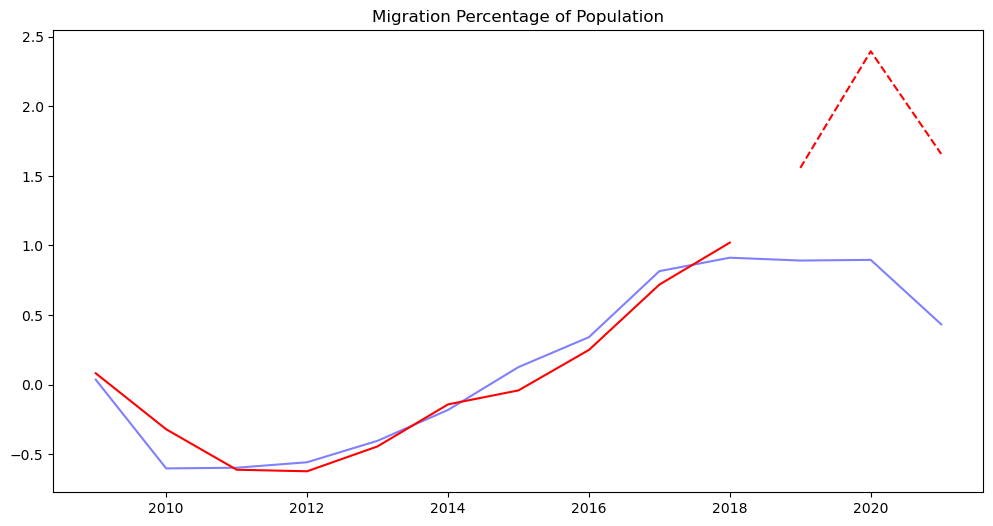

In [50]:
# plot data
Net_Migration_na['fitted_values'] = model.fittedvalues
Net_Migration_na['predicted_values']  = y_pred

plt.figure(figsize=(12,6))
plt.plot(Net_Migration_na['Migration Percentage of Population'], color='blue', alpha=0.5)
plt.plot(Net_Migration_na['fitted_values'], color='red')
plt.plot(Net_Migration_na['predicted_values'], color='red', linestyle='dashed')

plt.title('Migration Percentage of Population')
plt.show()

# Simple OLS T-1 Enterprises_Ireland_250+ & Crisis Indicator

In [51]:
# t-1 enterprises 250+ and crisis indicator
Net_Migration_na = Net_Migration[['Migration Percentage of Population', 'T-1 Enterprises_Ireland_250+', 'T-1 Crisis Indicator']].dropna()
X = Net_Migration_na[['T-1 Enterprises_Ireland_250+', 'T-1 Crisis Indicator']]
y = Net_Migration_na['Migration Percentage of Population']

# Split the data into training and testing sets
split_index = int(len(X) * 0.8)
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

model.summary()

c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Migration Percentage of Population   R-squared:                       0.961
Model:                                            OLS   Adj. R-squared:                  0.950
Method:                                 Least Squares   F-statistic:                     86.51
Date:                                Sun, 02 Jun 2024   Prob (F-statistic):           1.16e-05
Time:                                        17:43:45   Log-Likelihood:                 8.3065
No. Observations:                                  10   AIC:                            -10.61
Df Residuals:                                       7   BIC:                            -9.705
Df Model:                                           2                                         
Covariance Type:                            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -5.2934      0.556     -9.527      0.000      -6.607      -3.980
T-1 Enterprises_Ireland_250+     0.0104      0.001     10.311      0.000       0.008       0.013
T-1 Crisis Indicator            -0.0629      0.042     -1.492      0.179      -0.163       0.037
==============================================================================
Omnibus:                        0.871   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.647   Jarque-Bera (JB):                0.733
Skew:                          -0.479   Prob(JB):                        0.693
Kurtosis:                       2.083   Cond. No.                     7.24e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
# Assuming 'migration_indexed' has a datetime index
index = Net_Migration_na.index

# Predict using the model and specify the index
y_pred = model.predict(sm.add_constant(X_test))
# y_pred = model.predict(start=split_index, end=len(Net_Migration_na)-1, typ='levels', index=index[split_index:])

# Create a DataFrame for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).dropna()  
print(comparison)

# Extract the filtered y_test and y_pred
y_test_filtered = comparison['Actual']
y_pred_filtered = comparison['Predicted']


        Actual  Predicted
Year                     
2019  0.891710   1.534238
2020  0.896621   2.313653
2021  0.433127   1.502048


In [53]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

MAE: 1.0428270548473182
MSE: 1.1878047032730092
RMSE: 1.0898645343679227


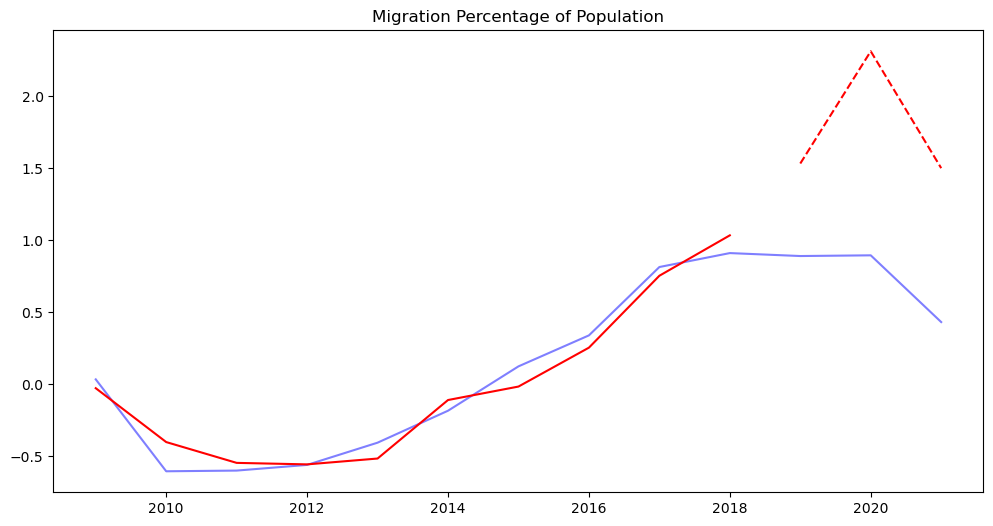

In [54]:
# plot data
Net_Migration_na['fitted_values'] = model.fittedvalues
Net_Migration_na['predicted_values']  = y_pred

plt.figure(figsize=(12,6))
plt.plot(Net_Migration_na['Migration Percentage of Population'], color='blue', alpha=0.5)
plt.plot(Net_Migration_na['fitted_values'], color='red')
plt.plot(Net_Migration_na['predicted_values'], color='red', linestyle='dashed')

plt.title('Migration Percentage of Population')
plt.show()

# Simple OLS T-1 Enterprises_Ireland_250+ & Events Impact

In [55]:
Net_Migration.columns

Index(['Unnamed: 0', 'Migration Percentage of Population',
       'T-1 Net migration 25-44 years', 'T-1 Enterprises_Ireland_250+',
       'T-1 General Surplus/Deficit (Million Euros)',
       'T-1 Trade Volume Index Imports (Base 2010)', 'T-1 Housing_CPI',
       'T-1 Trade Volume Index Exports (Base 2010)',
       'T-1 Unemployment rate_Ireland_Total_Foreign-born',
       'T-1 Emigrants 15-24 years', 'T-1 Emigrants_EU15 to EU27',
       'T-1 South Asia Percentage Change',
       'T-1 Migration Percentage of Population', 'T-1 Crisis Indicator',
       'Events_Positive_Impact', 'Events_Negative_Impact', 'Events_Impact'],
      dtype='object')

In [56]:
# T-1 Enterprises_Ireland_250+
Net_Migration_na = Net_Migration[['Migration Percentage of Population', 'T-1 Enterprises_Ireland_250+', 'Events_Impact']].dropna()
X = Net_Migration_na[['T-1 Enterprises_Ireland_250+', 'Events_Impact']]
y = Net_Migration_na['Migration Percentage of Population']

# Split the data into training and testing sets
split_index = int(len(X) * 0.8)
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

model.summary()

c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Migration Percentage of Population   R-squared:                       0.958
Model:                                            OLS   Adj. R-squared:                  0.946
Method:                                 Least Squares   F-statistic:                     79.81
Date:                                Sun, 02 Jun 2024   Prob (F-statistic):           1.52e-05
Time:                                        17:43:45   Log-Likelihood:                 7.9194
No. Observations:                                  10   AIC:                            -9.839
Df Residuals:                                       7   BIC:                            -8.931
Df Model:                                           2                                         
Covariance Type:                            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -5.7684      0.462    -12.487      0.000      -6.861      -4.676
T-1 Enterprises_Ireland_250+     0.0112      0.001     12.593      0.000       0.009       0.013
Events_Impact                   -0.1121      0.090     -1.240      0.255      -0.326       0.102
==============================================================================
Omnibus:                        0.305   Durbin-Watson:                   1.640
Prob(Omnibus):                  0.859   Jarque-Bera (JB):                0.369
Skew:                          -0.309   Prob(JB):                        0.832
Kurtosis:                       2.291   Cond. No.                     5.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
# Assuming 'migration_indexed' has a datetime index
index = Net_Migration_na.index

# Predict using the model and specify the index
y_pred = model.predict(sm.add_constant(X_test))
# y_pred = model.predict(start=split_index, end=len(Net_Migration_na)-1, typ='levels', index=index[split_index:])

# Create a DataFrame for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).dropna()  
print(comparison)

# Extract the filtered y_test and y_pred
y_test_filtered = comparison['Actual']
y_pred_filtered = comparison['Predicted']


        Actual  Predicted
Year                     
2019  0.891710   1.594076
2020  0.896621   2.322434
2021  0.433127   1.694932


In [58]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

MAE: 1.129994481594822
MSE: 1.3728036546610216
RMSE: 1.1716670408699827


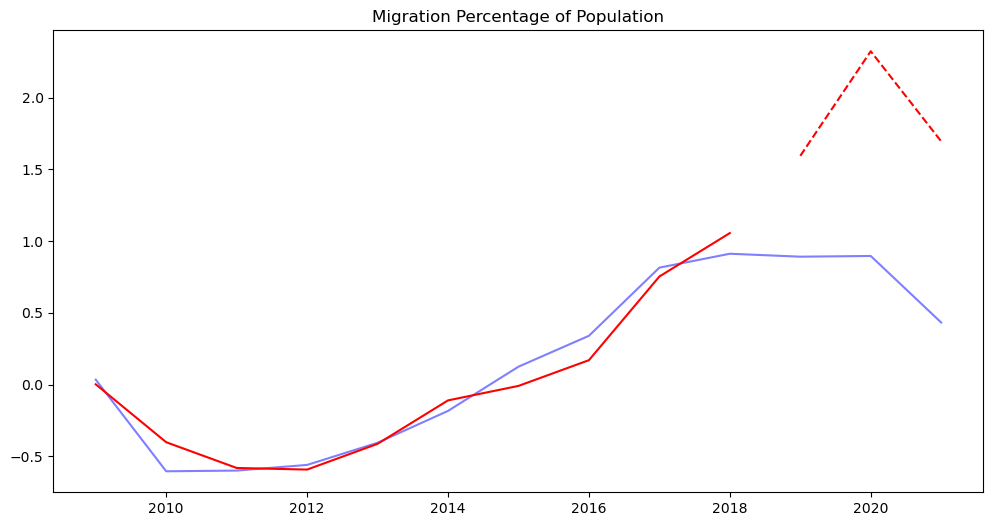

In [59]:
# plot data
Net_Migration_na['fitted_values'] = model.fittedvalues
Net_Migration_na['predicted_values']  = y_pred

plt.figure(figsize=(12,6))
plt.plot(Net_Migration_na['Migration Percentage of Population'], color='blue', alpha=0.5)
plt.plot(Net_Migration_na['fitted_values'], color='red')
plt.plot(Net_Migration_na['predicted_values'], color='red', linestyle='dashed')

plt.title('Migration Percentage of Population')
plt.show()

# Simple OLS T-1 Migration Percentage of Population 

In [60]:
# T-1 Migration Percentage of Population
Net_Migration_na = Net_Migration[['Migration Percentage of Population', 'T-1 Migration Percentage of Population']].dropna()
X = Net_Migration_na['T-1 Migration Percentage of Population']
y = Net_Migration_na['Migration Percentage of Population']

# Split the data into training and testing sets
split_index = int(len(X) * 0.8)
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Migration Percentage of Population   R-squared:                       0.749
Model:                                            OLS   Adj. R-squared:                  0.743
Method:                                 Least Squares   F-statistic:                     139.9
Date:                                Sun, 02 Jun 2024   Prob (F-statistic):           1.08e-15
Time:                                        17:43:46   Log-Likelihood:                -21.521
No. Observations:                                  49   AIC:                             47.04
Df Residuals:                                      47   BIC:                             50.83
Df Model:                                           1                                         
Covariance Type:                            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.0389      0.055      0.709      0.482      -0.071       0.149
T-1 Migration Percentage of Population     0.8312      0.070     11.829      0.000       0.690       0.973
==============================================================================
Omnibus:                        4.517   Durbin-Watson:                   1.382
Prob(Omnibus):                  0.105   Jarque-Bera (JB):                3.803
Skew:                          -0.383   Prob(JB):                        0.149
Kurtosis:                       4.130   Cond. No.                         1.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
# Assuming 'migration_indexed' has a datetime index
index = Net_Migration_na.index

# Predict using the model and specify the index
y_pred = model.predict(sm.add_constant(X_test))
# y_pred = model.predict(start=split_index, end=len(Net_Migration_na)-1, typ='levels', index=index[split_index:])

# Create a DataFrame for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).dropna()  
print(comparison)

# Extract the filtered y_test and y_pred
y_test_filtered = comparison['Actual']
y_pred_filtered = comparison['Predicted']


        Actual  Predicted
Year                     
2010 -0.603050   0.068230
2011 -0.598242  -0.462322
2012 -0.558752  -0.458326
2013 -0.404428  -0.425504
2014 -0.182492  -0.297236
2015  0.125480  -0.112771
2016  0.340670   0.143202
2017  0.815412   0.322060
2018  0.912207   0.716646
2019  0.891710   0.797098
2020  0.896621   0.780062
2021  0.433127   0.784144
2022  1.008354   0.398906


In [62]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

MAE: 0.2569009776893158
MSE: 0.10672002400428753
RMSE: 0.3266803085652509


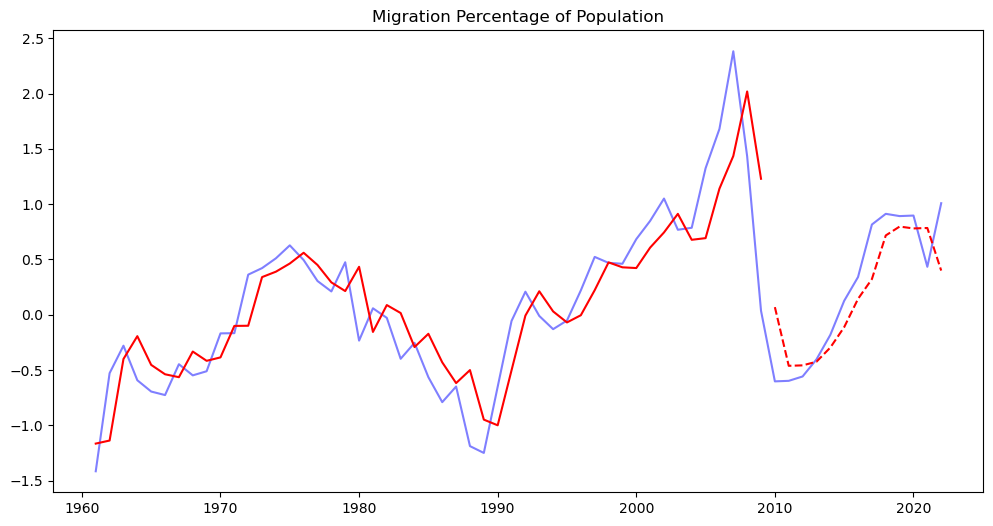

In [63]:
# plot data
Net_Migration_na['fitted_values'] = model.fittedvalues
Net_Migration_na['predicted_values']  = y_pred

plt.figure(figsize=(12,6))
plt.plot(Net_Migration_na['Migration Percentage of Population'], color='blue', alpha=0.5)
plt.plot(Net_Migration_na['fitted_values'], color='red')
plt.plot(Net_Migration_na['predicted_values'], color='red', linestyle='dashed')

plt.title('Migration Percentage of Population')
plt.show()

# Simple OLS T-1 Migration Percentage of Population & Crisis Indicator

In [64]:
# T-1 Migration Percentage of Population
Net_Migration_na = Net_Migration[['Migration Percentage of Population', 'T-1 Migration Percentage of Population', 'T-1 Crisis Indicator']].dropna()
X = Net_Migration_na[['T-1 Migration Percentage of Population', 'T-1 Crisis Indicator']]
y = Net_Migration_na['Migration Percentage of Population']

# Split the data into training and testing sets
split_index = int(len(X) * 0.8)
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Migration Percentage of Population   R-squared:                       0.776
Model:                                            OLS   Adj. R-squared:                  0.766
Method:                                 Least Squares   F-statistic:                     79.72
Date:                                Sun, 02 Jun 2024   Prob (F-statistic):           1.13e-15
Time:                                        17:43:46   Log-Likelihood:                -18.681
No. Observations:                                  49   AIC:                             43.36
Df Residuals:                                      46   BIC:                             49.04
Df Model:                                           2                                         
Covariance Type:                            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.1576      0.072      2.179      0.034       0.012       0.303
T-1 Migration Percentage of Population     0.8694      0.069     12.614      0.000       0.731       1.008
T-1 Crisis Indicator                      -0.1690      0.071     -2.378      0.022      -0.312      -0.026
==============================================================================
Omnibus:                        0.592   Durbin-Watson:                   1.662
Prob(Omnibus):                  0.744   Jarque-Bera (JB):                0.191
Skew:                          -0.138   Prob(JB):                        0.909
Kurtosis:                       3.132   Cond. No.                         2.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
# Assuming 'migration_indexed' has a datetime index
index = Net_Migration_na.index

# Predict using the model and specify the index
y_pred = model.predict(sm.add_constant(X_test))
# y_pred = model.predict(start=split_index, end=len(Net_Migration_na)-1, typ='levels', index=index[split_index:])

# Create a DataFrame for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).dropna()  
print(comparison)

# Extract the filtered y_test and y_pred
y_test_filtered = comparison['Actual']
y_pred_filtered = comparison['Predicted']


        Actual  Predicted
Year                     
2010 -0.603050  -0.318576
2011 -0.598242  -0.535625
2012 -0.558752  -0.531446
2013 -0.404428  -0.835042
2014 -0.182492  -0.362938
2015  0.125480  -0.169981
2016  0.340670   0.097777
2017  0.815412   0.453835
2018  0.912207   0.866587
2019  0.891710   0.950744
2020  0.896621   0.932923
2021  0.433127   0.599263
2022  1.008354   0.365254


In [66]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

MAE: 0.21812148514826168
MSE: 0.07912885537508463
RMSE: 0.2812985164821966


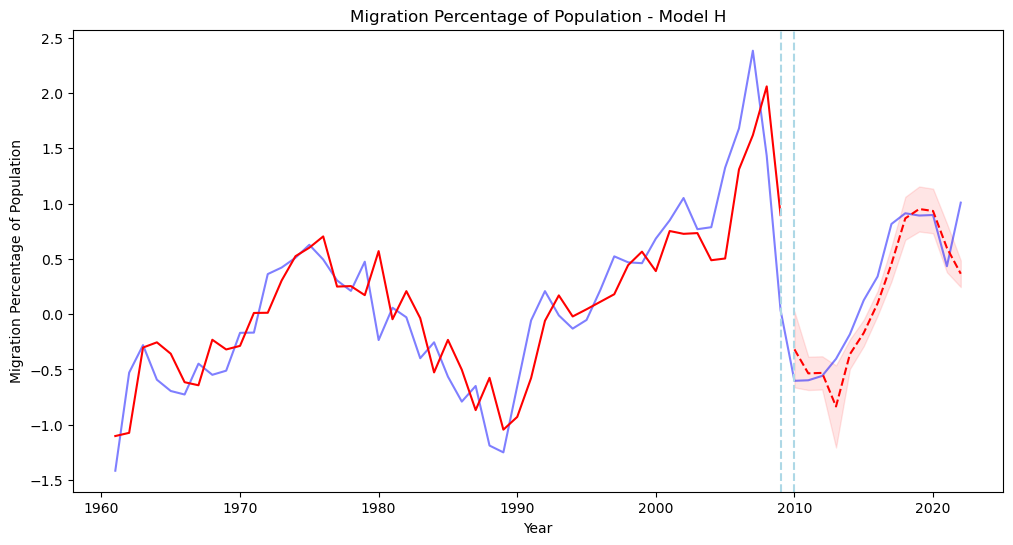

In [67]:
# plot data with 95% confidence interval
Net_Migration_na['fitted_values'] = model.fittedvalues
Net_Migration_na['predicted_values']  = y_pred


# calculate the confidence intervals
X_test_with_const = sm.add_constant(X_test)
predictions = model.get_prediction(X_test_with_const)
confidence_intervals = predictions.conf_int(alpha=0.05)
lower_bounds = confidence_intervals[:, 0]
upper_bounds = confidence_intervals[:, 1]

# plot
plt.figure(figsize=(12,6))
plt.plot(Net_Migration_na['Migration Percentage of Population'], color='blue', alpha=0.5)
plt.plot(Net_Migration_na['fitted_values'], color='red')
plt.plot(Net_Migration_na['predicted_values'], color='red', linestyle='dashed')

# Plotting the predicted values and confidence intervals for the test set
plt.fill_between(X_test_with_const.index, lower_bounds, upper_bounds, color='red', alpha=0.1, label='95% CI')


# line at split_index
plt.axvline(x=2009, color='lightblue', linestyle='--')
plt.axvline(x=2010, color='lightblue', linestyle='--')



plt.title('Migration Percentage of Population - Model H')
plt.xlabel('Year')
plt.ylabel('Migration Percentage of Population')
plt.show()

# Simple OLS T-1 Migration Percentage of Population & Events Impact

In [68]:
Net_Migration.columns

Index(['Unnamed: 0', 'Migration Percentage of Population',
       'T-1 Net migration 25-44 years', 'T-1 Enterprises_Ireland_250+',
       'T-1 General Surplus/Deficit (Million Euros)',
       'T-1 Trade Volume Index Imports (Base 2010)', 'T-1 Housing_CPI',
       'T-1 Trade Volume Index Exports (Base 2010)',
       'T-1 Unemployment rate_Ireland_Total_Foreign-born',
       'T-1 Emigrants 15-24 years', 'T-1 Emigrants_EU15 to EU27',
       'T-1 South Asia Percentage Change',
       'T-1 Migration Percentage of Population', 'T-1 Crisis Indicator',
       'Events_Positive_Impact', 'Events_Negative_Impact', 'Events_Impact'],
      dtype='object')

In [69]:
# T-1 Migration Percentage of Population
Net_Migration_na = Net_Migration[['Migration Percentage of Population', 'T-1 Migration Percentage of Population', 'Events_Impact']].dropna()
X = Net_Migration_na[['T-1 Migration Percentage of Population', 'Events_Impact']]
y = Net_Migration_na['Migration Percentage of Population']

# Split the data into training and testing sets
split_index = int(len(X) * 0.8)
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Migration Percentage of Population   R-squared:                       0.750
Model:                                            OLS   Adj. R-squared:                  0.739
Method:                                 Least Squares   F-statistic:                     69.08
Date:                                Sun, 02 Jun 2024   Prob (F-statistic):           1.39e-14
Time:                                        17:43:47   Log-Likelihood:                -21.360
No. Observations:                                  49   AIC:                             48.72
Df Residuals:                                      46   BIC:                             54.40
Df Model:                                           2                                         
Covariance Type:                            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.0546      0.062      0.877      0.385      -0.071       0.180
T-1 Migration Percentage of Population     0.8455      0.075     11.210      0.000       0.694       0.997
Events_Impact                             -0.0802      0.146     -0.550      0.585      -0.374       0.213
==============================================================================
Omnibus:                        3.235   Durbin-Watson:                   1.458
Prob(Omnibus):                  0.198   Jarque-Bera (JB):                2.440
Skew:                          -0.248   Prob(JB):                        0.295
Kurtosis:                       3.974   Cond. No.                         2.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
# Assuming 'migration_indexed' has a datetime index
index = Net_Migration_na.index

# Predict using the model and specify the index
y_pred = model.predict(sm.add_constant(X_test))
# y_pred = model.predict(start=split_index, end=len(Net_Migration_na)-1, typ='levels', index=index[split_index:])

# Create a DataFrame for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).dropna()  
print(comparison)

# Extract the filtered y_test and y_pred
y_test_filtered = comparison['Actual']
y_pred_filtered = comparison['Predicted']


        Actual  Predicted
Year                     
2010 -0.603050   0.004151
2011 -0.598242  -0.455315
2012 -0.558752  -0.451251
2013 -0.404428  -0.417863
2014 -0.182492  -0.287384
2015  0.125480  -0.099742
2016  0.340670   0.080414
2017  0.815412   0.342581
2018  0.912207   0.743966
2019  0.891710   0.825805
2020  0.896621   0.728247
2021  0.433127   0.812627
2022  1.008354   0.340524


In [71]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

MAE: 0.26031642193769755
MSE: 0.10806929569971976
RMSE: 0.3287389476464871


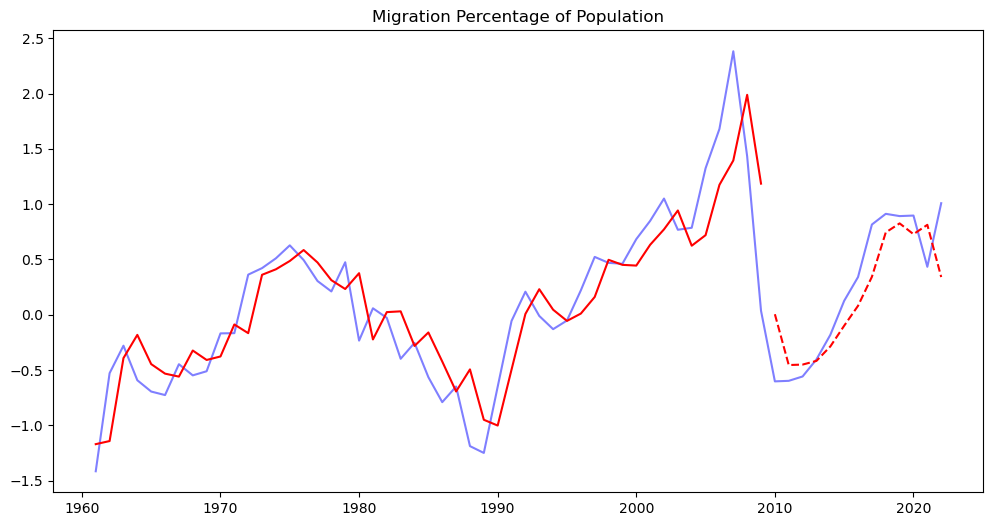

In [72]:
# plot data
Net_Migration_na['fitted_values'] = model.fittedvalues
Net_Migration_na['predicted_values']  = y_pred

plt.figure(figsize=(12,6))
plt.plot(Net_Migration_na['Migration Percentage of Population'], color='blue', alpha=0.5)
plt.plot(Net_Migration_na['fitted_values'], color='red')
plt.plot(Net_Migration_na['predicted_values'], color='red', linestyle='dashed')

plt.title('Migration Percentage of Population')
plt.show()

# Simple OLS T-1 Net migration 25-44 years, T-1 Enterprises_Ireland_250+ 

In [73]:
# T-1 Enterprises_Ireland_250+
Net_Migration_na = Net_Migration[['Migration Percentage of Population', 'T-1 Net migration 25-44 years', 'T-1 Enterprises_Ireland_250+']].dropna()
X = Net_Migration_na[['T-1 Net migration 25-44 years', 'T-1 Enterprises_Ireland_250+']]
y = Net_Migration_na['Migration Percentage of Population']

# Split the data into training and testing sets
split_index = int(len(X) * 0.8)
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

model.summary()

c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Migration Percentage of Population   R-squared:                       0.949
Model:                                            OLS   Adj. R-squared:                  0.935
Method:                                 Least Squares   F-statistic:                     65.23
Date:                                Sun, 02 Jun 2024   Prob (F-statistic):           2.98e-05
Time:                                        17:43:47   Log-Likelihood:                 6.9578
No. Observations:                                  10   AIC:                            -7.916
Df Residuals:                                       7   BIC:                            -7.008
Df Model:                                           2                                         
Covariance Type:                            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -5.6082      1.013     -5.535      0.001      -8.004      -3.212
T-1 Net migration 25-44 years  2.353e-06   1.12e-05      0.209      0.840   -2.42e-05    2.89e-05
T-1 Enterprises_Ireland_250+      0.0108      0.002      5.566      0.001       0.006       0.015
==============================================================================
Omnibus:                        3.622   Durbin-Watson:                   1.564
Prob(Omnibus):                  0.164   Jarque-Bera (JB):                1.282
Skew:                          -0.865   Prob(JB):                        0.527
Kurtosis:                       3.292   Cond. No.                     1.80e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
# Assuming 'migration_indexed' has a datetime index
index = Net_Migration_na.index

# Predict using the model and specify the index
y_pred = model.predict(sm.add_constant(X_test))
# y_pred = model.predict(start=split_index, end=len(Net_Migration_na)-1, typ='levels', index=index[split_index:])

# Create a DataFrame for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).dropna()  
print(comparison)

# Extract the filtered y_test and y_pred
y_test_filtered = comparison['Actual']
y_pred_filtered = comparison['Predicted']


        Actual  Predicted
Year                     
2019  0.891710   1.539411
2020  0.896621   2.358397
2021  0.433127   1.646486


In [75]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

MAE: 1.1076116021691385
MSE: 1.342847606855197
RMSE: 1.1588130163469847


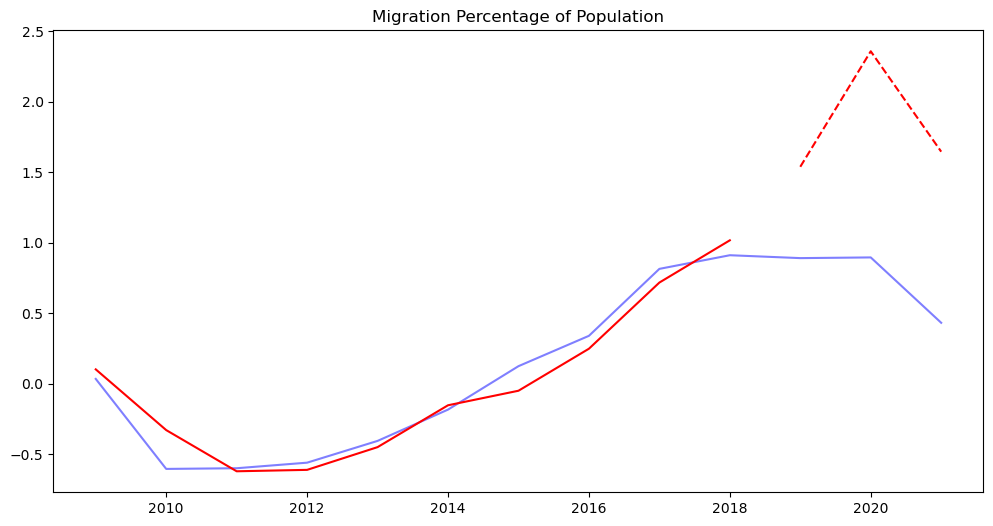

In [76]:
# plot data
Net_Migration_na['fitted_values'] = model.fittedvalues
Net_Migration_na['predicted_values']  = y_pred

plt.figure(figsize=(12,6))
plt.plot(Net_Migration_na['Migration Percentage of Population'], color='blue', alpha=0.5)
plt.plot(Net_Migration_na['fitted_values'], color='red')
plt.plot(Net_Migration_na['predicted_values'], color='red', linestyle='dashed')

plt.title('Migration Percentage of Population')
plt.show()

# Simple OLS T-1 Net migration 25-44 years, T-1 Enterprises_Ireland_250+ & Crisis Indicator

In [77]:
# t-1 enterprises 250+ and crisis indicator
Net_Migration_na = Net_Migration[['Migration Percentage of Population', 'T-1 Net migration 25-44 years', 'T-1 Enterprises_Ireland_250+', 'T-1 Crisis Indicator']].dropna()
X = Net_Migration_na[['T-1 Net migration 25-44 years', 'T-1 Enterprises_Ireland_250+', 'T-1 Crisis Indicator']]
y = Net_Migration_na['Migration Percentage of Population']

# Split the data into training and testing sets
split_index = int(len(X) * 0.8)
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

model.summary()

c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Migration Percentage of Population   R-squared:                       0.964
Model:                                            OLS   Adj. R-squared:                  0.946
Method:                                 Least Squares   F-statistic:                     53.44
Date:                                Sun, 02 Jun 2024   Prob (F-statistic):           0.000101
Time:                                        17:43:47   Log-Likelihood:                 8.6811
No. Observations:                                  10   AIC:                            -9.362
Df Residuals:                                       6   BIC:                            -8.152
Df Model:                                           3                                         
Covariance Type:                            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -4.6504      1.105     -4.210      0.006      -7.353      -1.948
T-1 Net migration 25-44 years  7.309e-06   1.07e-05      0.683      0.520   -1.89e-05    3.35e-05
T-1 Enterprises_Ireland_250+      0.0092      0.002      4.460      0.004       0.004       0.014
T-1 Crisis Indicator             -0.0721      0.046     -1.571      0.167      -0.184       0.040
==============================================================================
Omnibus:                        0.435   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.805   Jarque-Bera (JB):                0.473
Skew:                          -0.014   Prob(JB):                        0.790
Kurtosis:                       1.935   Cond. No.                     2.15e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
# Assuming 'migration_indexed' has a datetime index
index = Net_Migration_na.index

# Predict using the model and specify the index
y_pred = model.predict(sm.add_constant(X_test))
# y_pred = model.predict(start=split_index, end=len(Net_Migration_na)-1, typ='levels', index=index[split_index:])

# Create a DataFrame for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).dropna()  
print(comparison)

# Extract the filtered y_test and y_pred
y_test_filtered = comparison['Actual']
y_pred_filtered = comparison['Predicted']


        Actual  Predicted
Year                     
2019  0.891710   1.474253
2020  0.896621   2.182878
2021  0.433127   1.442406


In [79]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

MAE: 0.9593595615675201
MSE: 1.004152231181971
RMSE: 1.0020739649257289


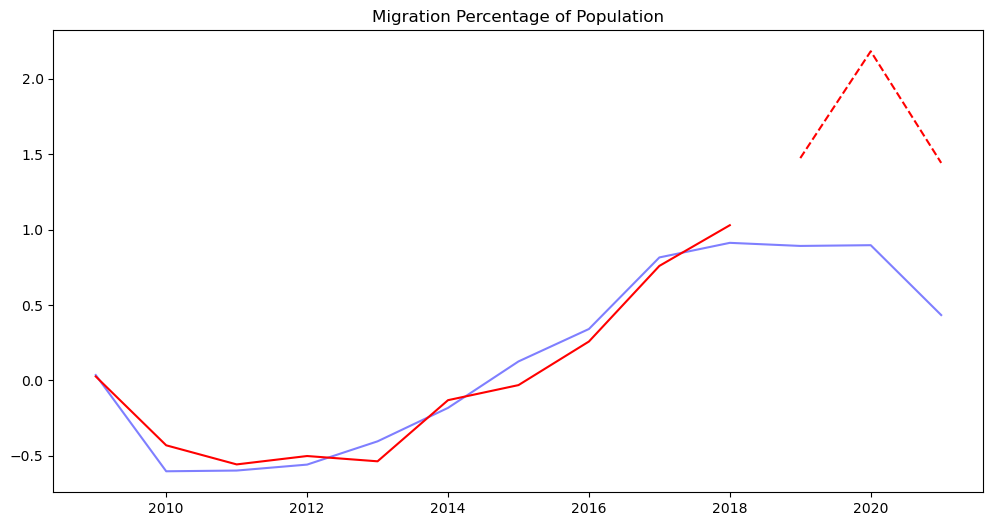

In [80]:
# plot data
Net_Migration_na['fitted_values'] = model.fittedvalues
Net_Migration_na['predicted_values']  = y_pred

plt.figure(figsize=(12,6))
plt.plot(Net_Migration_na['Migration Percentage of Population'], color='blue', alpha=0.5)
plt.plot(Net_Migration_na['fitted_values'], color='red')
plt.plot(Net_Migration_na['predicted_values'], color='red', linestyle='dashed')

plt.title('Migration Percentage of Population')
plt.show()

# Simple OLS T-1 Net migration 25-44 years, T-1 Enterprises_Ireland_250+ & Events Impact

In [81]:
Net_Migration.columns

Index(['Unnamed: 0', 'Migration Percentage of Population',
       'T-1 Net migration 25-44 years', 'T-1 Enterprises_Ireland_250+',
       'T-1 General Surplus/Deficit (Million Euros)',
       'T-1 Trade Volume Index Imports (Base 2010)', 'T-1 Housing_CPI',
       'T-1 Trade Volume Index Exports (Base 2010)',
       'T-1 Unemployment rate_Ireland_Total_Foreign-born',
       'T-1 Emigrants 15-24 years', 'T-1 Emigrants_EU15 to EU27',
       'T-1 South Asia Percentage Change',
       'T-1 Migration Percentage of Population', 'T-1 Crisis Indicator',
       'Events_Positive_Impact', 'Events_Negative_Impact', 'Events_Impact'],
      dtype='object')

In [82]:
# T-1 Enterprises_Ireland_250+
Net_Migration_na = Net_Migration[['Migration Percentage of Population', 'T-1 Net migration 25-44 years', 'T-1 Enterprises_Ireland_250+', 'Events_Impact']].dropna()
X = Net_Migration_na[['T-1 Net migration 25-44 years', 'T-1 Enterprises_Ireland_250+', 'Events_Impact']]
y = Net_Migration_na['Migration Percentage of Population']

# Split the data into training and testing sets
split_index = int(len(X) * 0.8)
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

model.summary()

c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Migration Percentage of Population   R-squared:                       0.961
Model:                                            OLS   Adj. R-squared:                  0.942
Method:                                 Least Squares   F-statistic:                     49.63
Date:                                Sun, 02 Jun 2024   Prob (F-statistic):           0.000125
Time:                                        17:43:47   Log-Likelihood:                 8.3254
No. Observations:                                  10   AIC:                            -8.651
Df Residuals:                                       6   BIC:                            -7.441
Df Model:                                           3                                         
Covariance Type:                            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -5.1302      1.016     -5.050      0.002      -7.616      -2.644
T-1 Net migration 25-44 years  8.116e-06   1.14e-05      0.712      0.503   -1.98e-05     3.6e-05
T-1 Enterprises_Ireland_250+      0.0100      0.002      5.173      0.002       0.005       0.015
Events_Impact                    -0.1386      0.101     -1.374      0.219      -0.385       0.108
==============================================================================
Omnibus:                        0.163   Durbin-Watson:                   1.341
Prob(Omnibus):                  0.922   Jarque-Bera (JB):                0.278
Skew:                           0.226   Prob(JB):                        0.870
Kurtosis:                       2.319   Cond. No.                     1.91e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
# Assuming 'migration_indexed' has a datetime index
index = Net_Migration_na.index

# Predict using the model and specify the index
y_pred = model.predict(sm.add_constant(X_test))
# y_pred = model.predict(start=split_index, end=len(Net_Migration_na)-1, typ='levels', index=index[split_index:])

# Create a DataFrame for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).dropna()  
print(comparison)

# Extract the filtered y_test and y_pred
y_test_filtered = comparison['Actual']
y_pred_filtered = comparison['Predicted']


        Actual  Predicted
Year                     
2019  0.891710   1.539888
2020  0.896621   2.173261
2021  0.433127   1.662865


In [84]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

MAE: 1.0515184636317425
MSE: 1.187399396336197
RMSE: 1.0896785747807456


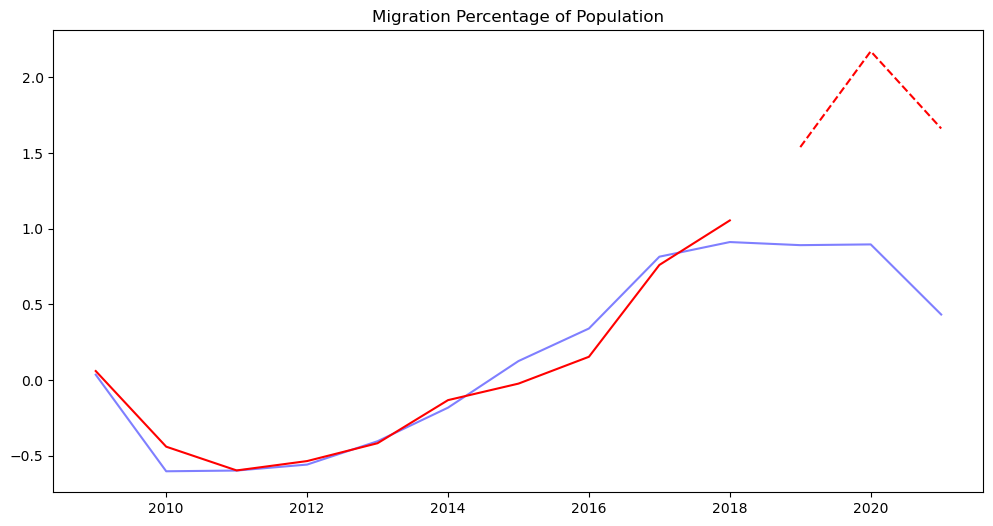

In [85]:
# plot data
Net_Migration_na['fitted_values'] = model.fittedvalues
Net_Migration_na['predicted_values']  = y_pred

plt.figure(figsize=(12,6))
plt.plot(Net_Migration_na['Migration Percentage of Population'], color='blue', alpha=0.5)
plt.plot(Net_Migration_na['fitted_values'], color='red')
plt.plot(Net_Migration_na['predicted_values'], color='red', linestyle='dashed')

plt.title('Migration Percentage of Population')
plt.show()

# Simple OLS with Unemployment foreigners in Ireland and migration 25-44 years, including Crisis indicator

In [86]:
Net_Migration.columns

Index(['Unnamed: 0', 'Migration Percentage of Population',
       'T-1 Net migration 25-44 years', 'T-1 Enterprises_Ireland_250+',
       'T-1 General Surplus/Deficit (Million Euros)',
       'T-1 Trade Volume Index Imports (Base 2010)', 'T-1 Housing_CPI',
       'T-1 Trade Volume Index Exports (Base 2010)',
       'T-1 Unemployment rate_Ireland_Total_Foreign-born',
       'T-1 Emigrants 15-24 years', 'T-1 Emigrants_EU15 to EU27',
       'T-1 South Asia Percentage Change',
       'T-1 Migration Percentage of Population', 'T-1 Crisis Indicator',
       'Events_Positive_Impact', 'Events_Negative_Impact', 'Events_Impact'],
      dtype='object')

In [87]:
# Drop rows with missing values
X = Net_Migration[['T-1 Net migration 25-44 years', 'T-1 Unemployment rate_Ireland_Total_Foreign-born', 'T-1 Crisis Indicator']]
X = X.dropna()

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

                                            feature       VIF
0                     T-1 Net migration 25-44 years  1.086514
1  T-1 Unemployment rate_Ireland_Total_Foreign-born  2.354119
2                              T-1 Crisis Indicator  2.358763


In [88]:
Net_Migration_na = Net_Migration[['Migration Percentage of Population', 'T-1 Net migration 25-44 years', 'T-1 Unemployment rate_Ireland_Total_Foreign-born', 'T-1 Crisis Indicator']].dropna()
X = Net_Migration_na[['T-1 Net migration 25-44 years', 'T-1 Unemployment rate_Ireland_Total_Foreign-born', 'T-1 Crisis Indicator']]
y = Net_Migration_na['Migration Percentage of Population']

# Split the data into training and testing sets
split_index = int(len(X) * 0.8)
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

model.summary()

c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Migration Percentage of Population   R-squared:                       0.889
Model:                                            OLS   Adj. R-squared:                  0.862
Method:                                 Least Squares   F-statistic:                     32.18
Date:                                Sun, 02 Jun 2024   Prob (F-statistic):           5.10e-06
Time:                                        17:43:48   Log-Likelihood:                -2.8601
No. Observations:                                  16   AIC:                             13.72
Df Residuals:                                      12   BIC:                             16.81
Df Model:                                           3                                         
Covariance Type:                            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                0.9039      0.700      1.292      0.221      -0.620       2.428
T-1 Net migration 25-44 years                     4.169e-05   1.81e-05      2.300      0.040    2.19e-06    8.12e-05
T-1 Unemployment rate_Ireland_Total_Foreign-born    -0.0407      0.049     -0.829      0.423      -0.148       0.066
T-1 Crisis Indicator                                -0.2138      0.090     -2.379      0.035      -0.409      -0.018
==============================================================================
Omnibus:                        0.786   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.675   Jarque-Bera (JB):                0.714
Skew:                           0.430   Prob(JB):                        0.700
Kurtosis:                       2.424   Cond. No.                     1.28e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [89]:
# Assuming 'migration_indexed' has a datetime index
index = Net_Migration_na.index

# Predict using the model and specify the index
y_pred = model.predict(sm.add_constant(X_test))
# y_pred = model.predict(start=split_index, end=len(Net_Migration_na)-1, typ='levels', index=index[split_index:])

# Create a DataFrame for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).dropna()  
print(comparison)

# Extract the filtered y_test and y_pred
y_test_filtered = comparison['Actual']
y_pred_filtered = comparison['Predicted']


        Actual  Predicted
Year                     
2019  0.891710   1.136175
2020  0.896621   1.303031
2021  0.433127   0.865995
2022  1.008354   0.929668


In [90]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

MAE: 0.29060720051254996
MSE: 0.1046245975277757
RMSE: 0.32345725765203615


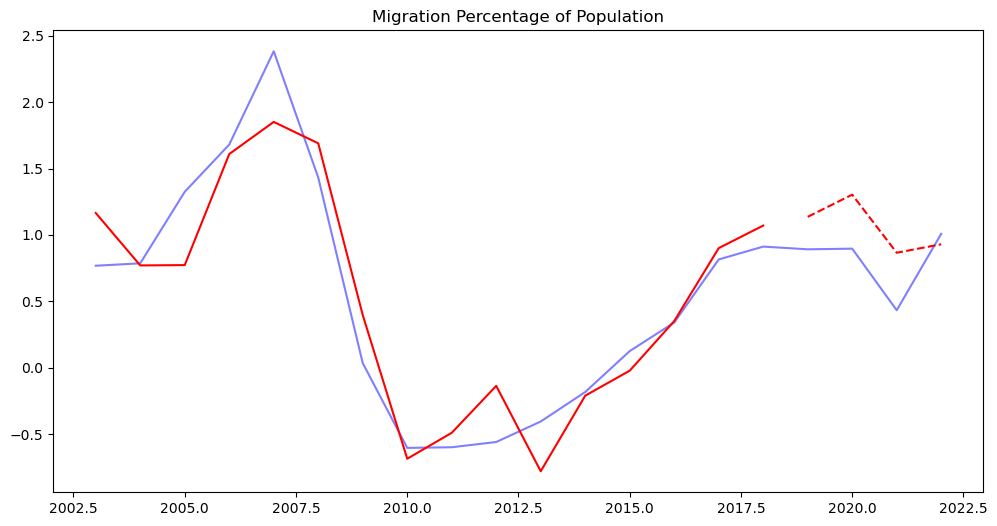

In [91]:
# plot data
Net_Migration_na['fitted_values'] = model.fittedvalues
Net_Migration_na['predicted_values']  = y_pred

plt.figure(figsize=(12,6))
plt.plot(Net_Migration_na['Migration Percentage of Population'], color='blue', alpha=0.5)
plt.plot(Net_Migration_na['fitted_values'], color='red')
plt.plot(Net_Migration_na['predicted_values'], color='red', linestyle='dashed')

plt.title('Migration Percentage of Population')
plt.show()

# Simple OLS with Unemployment foreigners in Ireland and migration, including Crisis indicator

In [92]:
Net_Migration.columns

Index(['Unnamed: 0', 'Migration Percentage of Population',
       'T-1 Net migration 25-44 years', 'T-1 Enterprises_Ireland_250+',
       'T-1 General Surplus/Deficit (Million Euros)',
       'T-1 Trade Volume Index Imports (Base 2010)', 'T-1 Housing_CPI',
       'T-1 Trade Volume Index Exports (Base 2010)',
       'T-1 Unemployment rate_Ireland_Total_Foreign-born',
       'T-1 Emigrants 15-24 years', 'T-1 Emigrants_EU15 to EU27',
       'T-1 South Asia Percentage Change',
       'T-1 Migration Percentage of Population', 'T-1 Crisis Indicator',
       'Events_Positive_Impact', 'Events_Negative_Impact', 'Events_Impact'],
      dtype='object')

In [93]:
# Drop rows with missing values
X = Net_Migration[['T-1 Migration Percentage of Population', 'T-1 Unemployment rate_Ireland_Total_Foreign-born', 'T-1 Crisis Indicator']]
X = X.dropna()

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

                                            feature       VIF
0            T-1 Migration Percentage of Population  1.144760
1  T-1 Unemployment rate_Ireland_Total_Foreign-born  2.313870
2                              T-1 Crisis Indicator  2.431026


In [94]:
Net_Migration_na = Net_Migration[['Migration Percentage of Population', 'T-1 Migration Percentage of Population', 'T-1 Unemployment rate_Ireland_Total_Foreign-born', 'T-1 Crisis Indicator']].dropna()
X = Net_Migration_na[['T-1 Migration Percentage of Population', 'T-1 Unemployment rate_Ireland_Total_Foreign-born', 'T-1 Crisis Indicator']]
y = Net_Migration_na['Migration Percentage of Population']

# Split the data into training and testing sets
split_index = int(len(X) * 0.8)
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

model.summary()

c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Migration Percentage of Population   R-squared:                       0.842
Model:                                            OLS   Adj. R-squared:                  0.806
Method:                                 Least Squares   F-statistic:                     23.12
Date:                                Sun, 02 Jun 2024   Prob (F-statistic):           1.73e-05
Time:                                        17:43:48   Log-Likelihood:                -5.7061
No. Observations:                                  17   AIC:                             19.41
Df Residuals:                                      13   BIC:                             22.75
Df Model:                                           3                                         
Covariance Type:                            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                1.4311      0.506      2.826      0.014       0.337       2.525
T-1 Migration Percentage of Population               0.4009      0.222      1.805      0.094      -0.079       0.881
T-1 Unemployment rate_Ireland_Total_Foreign-born    -0.0723      0.040     -1.803      0.095      -0.159       0.014
T-1 Crisis Indicator                                -0.2936      0.096     -3.062      0.009      -0.501      -0.086
==============================================================================
Omnibus:                        1.822   Durbin-Watson:                   1.658
Prob(Omnibus):                  0.402   Jarque-Bera (JB):                1.005
Skew:                           0.594   Prob(JB):                        0.605
Kurtosis:                       2.926   Cond. No.                         65.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
# Assuming 'migration_indexed' has a datetime index
index = Net_Migration_na.index

# Predict using the model and specify the index
y_pred = model.predict(sm.add_constant(X_test))
# y_pred = model.predict(start=split_index, end=len(Net_Migration_na)-1, typ='levels', index=index[split_index:])

# Create a DataFrame for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).dropna()  
print(comparison)

# Extract the filtered y_test and y_pred
y_test_filtered = comparison['Actual']
y_pred_filtered = comparison['Predicted']


        Actual  Predicted
Year                     
2018  0.912207   1.165300
2019  0.891710   1.276387
2020  0.896621   1.362138
2021  0.433127   0.661335
2022  1.008354   0.769090


In [96]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

MAE: 0.31415163428928233
MSE: 0.10761284506991256
RMSE: 0.3280439681962047


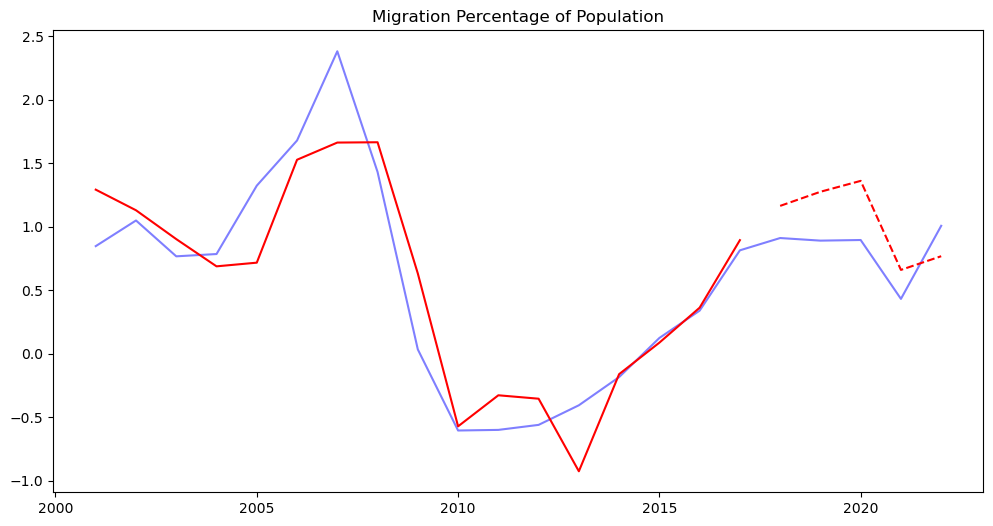

In [97]:
# plot data
Net_Migration_na['fitted_values'] = model.fittedvalues
Net_Migration_na['predicted_values']  = y_pred

plt.figure(figsize=(12,6))
plt.plot(Net_Migration_na['Migration Percentage of Population'], color='blue', alpha=0.5)
plt.plot(Net_Migration_na['fitted_values'], color='red')
plt.plot(Net_Migration_na['predicted_values'], color='red', linestyle='dashed')

plt.title('Migration Percentage of Population')
plt.show()

# Simple OLS with Unemployment foreigners in Ireland and t-1 migration and emigration EU15 to EU27, including Crisis indicator

T-1 Emigrants 15-24 years is correlated with the unemployment rate for foreign-born people in ireland, so cannot be included in the model

In [98]:
Net_Migration.columns

Index(['Unnamed: 0', 'Migration Percentage of Population',
       'T-1 Net migration 25-44 years', 'T-1 Enterprises_Ireland_250+',
       'T-1 General Surplus/Deficit (Million Euros)',
       'T-1 Trade Volume Index Imports (Base 2010)', 'T-1 Housing_CPI',
       'T-1 Trade Volume Index Exports (Base 2010)',
       'T-1 Unemployment rate_Ireland_Total_Foreign-born',
       'T-1 Emigrants 15-24 years', 'T-1 Emigrants_EU15 to EU27',
       'T-1 South Asia Percentage Change',
       'T-1 Migration Percentage of Population', 'T-1 Crisis Indicator',
       'Events_Positive_Impact', 'Events_Negative_Impact', 'Events_Impact'],
      dtype='object')

In [99]:
# Drop rows with missing values
X = Net_Migration[['T-1 Migration Percentage of Population', 'T-1 Unemployment rate_Ireland_Total_Foreign-born', 'T-1 Emigrants 15-24 years', 'T-1 Crisis Indicator']]
X = X.dropna()

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

                                            feature        VIF
0            T-1 Migration Percentage of Population   2.369609
1  T-1 Unemployment rate_Ireland_Total_Foreign-born  21.763389
2                         T-1 Emigrants 15-24 years  24.830206
3                              T-1 Crisis Indicator   2.433481


In [100]:
# Drop rows with missing values
X = Net_Migration[['T-1 Migration Percentage of Population', 'T-1 Unemployment rate_Ireland_Total_Foreign-born', 'T-1 Emigrants_EU15 to EU27', 'T-1 Crisis Indicator']]
X = X.dropna()

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

                                            feature       VIF
0            T-1 Migration Percentage of Population  1.072956
1  T-1 Unemployment rate_Ireland_Total_Foreign-born  6.448209
2                        T-1 Emigrants_EU15 to EU27  8.152323
3                              T-1 Crisis Indicator  3.036421


In [101]:
Net_Migration_na = Net_Migration[['Migration Percentage of Population', 'T-1 Migration Percentage of Population', 'T-1 Unemployment rate_Ireland_Total_Foreign-born', 'T-1 Emigrants_EU15 to EU27', 'T-1 Crisis Indicator']].dropna()
X = Net_Migration_na[['T-1 Migration Percentage of Population', 'T-1 Unemployment rate_Ireland_Total_Foreign-born', 'T-1 Emigrants_EU15 to EU27', 'T-1 Crisis Indicator']]
y = Net_Migration_na['Migration Percentage of Population']

# Split the data into training and testing sets
split_index = int(len(X) * 0.8)
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

model.summary()

c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Migration Percentage of Population   R-squared:                       0.905
Model:                                            OLS   Adj. R-squared:                  0.858
Method:                                 Least Squares   F-statistic:                     19.14
Date:                                Sun, 02 Jun 2024   Prob (F-statistic):           0.000370
Time:                                        17:43:49   Log-Likelihood:                -2.1430
No. Observations:                                  13   AIC:                             14.29
Df Residuals:                                       8   BIC:                             17.11
Df Model:                                           4                                         
Covariance Type:                            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                0.8192      0.967      0.847      0.422      -1.412       3.050
T-1 Migration Percentage of Population               0.6153      0.342      1.801      0.109      -0.172       1.403
T-1 Unemployment rate_Ireland_Total_Foreign-born     0.0030      0.081      0.037      0.971      -0.183       0.189
T-1 Emigrants_EU15 to EU27                       -3.747e-05   2.56e-05     -1.465      0.181   -9.65e-05    2.15e-05
T-1 Crisis Indicator                                -0.3070      0.122     -2.506      0.037      -0.589      -0.025
==============================================================================
Omnibus:                        1.030   Durbin-Watson:                   2.574
Prob(Omnibus):                  0.597   Jarque-Bera (JB):                0.794
Skew:                           0.533   Prob(JB):                        0.672
Kurtosis:                       2.424   Cond. No.                     1.14e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [102]:
# Assuming 'migration_indexed' has a datetime index
index = Net_Migration_na.index

# Predict using the model and specify the index
y_pred = model.predict(sm.add_constant(X_test))
# y_pred = model.predict(start=split_index, end=len(Net_Migration_na)-1, typ='levels', index=index[split_index:])

# Create a DataFrame for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).dropna()  
print(comparison)

# Extract the filtered y_test and y_pred
y_test_filtered = comparison['Actual']
y_pred_filtered = comparison['Predicted']


        Actual  Predicted
Year                     
2019  0.891710   1.177255
2020  0.896621   1.246932
2021  0.433127   0.483455
2022  1.008354   0.636348


In [103]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

MAE: 0.26454732355752186
MSE: 0.08629366453614987
RMSE: 0.2937578331485815


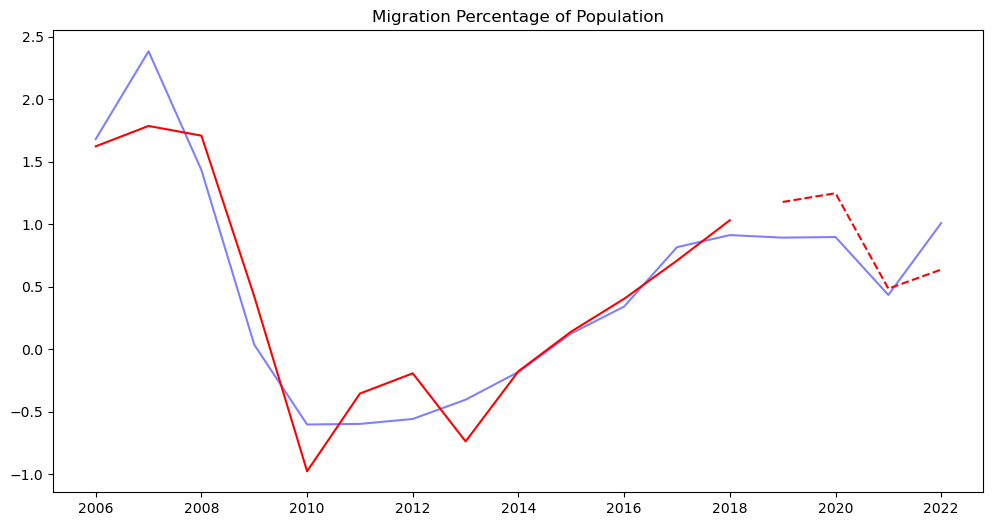

In [104]:
# plot data
Net_Migration_na['fitted_values'] = model.fittedvalues
Net_Migration_na['predicted_values']  = y_pred

plt.figure(figsize=(12,6))
plt.plot(Net_Migration_na['Migration Percentage of Population'], color='blue', alpha=0.5)
plt.plot(Net_Migration_na['fitted_values'], color='red')
plt.plot(Net_Migration_na['predicted_values'], color='red', linestyle='dashed')

plt.title('Migration Percentage of Population')
plt.show()

# Simple OLS with Unemployment foreigners in Ireland and t-1 migration and surplus/deficit, including Crisis indicator

In [105]:
Net_Migration.columns

Index(['Unnamed: 0', 'Migration Percentage of Population',
       'T-1 Net migration 25-44 years', 'T-1 Enterprises_Ireland_250+',
       'T-1 General Surplus/Deficit (Million Euros)',
       'T-1 Trade Volume Index Imports (Base 2010)', 'T-1 Housing_CPI',
       'T-1 Trade Volume Index Exports (Base 2010)',
       'T-1 Unemployment rate_Ireland_Total_Foreign-born',
       'T-1 Emigrants 15-24 years', 'T-1 Emigrants_EU15 to EU27',
       'T-1 South Asia Percentage Change',
       'T-1 Migration Percentage of Population', 'T-1 Crisis Indicator',
       'Events_Positive_Impact', 'Events_Negative_Impact', 'Events_Impact'],
      dtype='object')

In [106]:
# Drop rows with missing values
X = Net_Migration[['T-1 Migration Percentage of Population', 'T-1 Unemployment rate_Ireland_Total_Foreign-born', 'T-1 General Surplus/Deficit (Million Euros)', 'T-1 Crisis Indicator']]
X = X.dropna()

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

                                            feature       VIF
0            T-1 Migration Percentage of Population  1.622152
1  T-1 Unemployment rate_Ireland_Total_Foreign-born  3.382470
2       T-1 General Surplus/Deficit (Million Euros)  2.768727
3                              T-1 Crisis Indicator  2.609887


In [107]:
Net_Migration_na = Net_Migration[['Migration Percentage of Population', 'T-1 Migration Percentage of Population', 'T-1 Unemployment rate_Ireland_Total_Foreign-born', 'T-1 General Surplus/Deficit (Million Euros)', 'T-1 Crisis Indicator']].dropna()
X = Net_Migration_na[['T-1 Migration Percentage of Population', 'T-1 Unemployment rate_Ireland_Total_Foreign-born', 'T-1 General Surplus/Deficit (Million Euros)', 'T-1 Crisis Indicator']]
y = Net_Migration_na['Migration Percentage of Population']

# Split the data into training and testing sets
split_index = int(len(X) * 0.8)
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

model.summary()

c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Migration Percentage of Population   R-squared:                       0.874
Model:                                            OLS   Adj. R-squared:                  0.833
Method:                                 Least Squares   F-statistic:                     20.90
Date:                                Sun, 02 Jun 2024   Prob (F-statistic):           2.44e-05
Time:                                        17:43:49   Log-Likelihood:                -3.7593
No. Observations:                                  17   AIC:                             17.52
Df Residuals:                                      12   BIC:                             21.68
Df Model:                                           4                                         
Covariance Type:                            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                1.0976      0.507      2.165      0.051      -0.007       2.202
T-1 Migration Percentage of Population               0.4297      0.207      2.078      0.060      -0.021       0.880
T-1 Unemployment rate_Ireland_Total_Foreign-born    -0.0299      0.044     -0.674      0.513      -0.127       0.067
T-1 General Surplus/Deficit (Million Euros)       1.691e-05   9.62e-06      1.757      0.104   -4.05e-06    3.79e-05
T-1 Crisis Indicator                                -0.2691      0.090     -2.988      0.011      -0.465      -0.073
==============================================================================
Omnibus:                        1.998   Durbin-Watson:                   1.789
Prob(Omnibus):                  0.368   Jarque-Bera (JB):                1.202
Skew:                           0.647   Prob(JB):                        0.548
Kurtosis:                       2.859   Cond. No.                     1.03e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
# Assuming 'migration_indexed' has a datetime index
index = Net_Migration_na.index

# Predict using the model and specify the index
y_pred = model.predict(sm.add_constant(X_test))
# y_pred = model.predict(start=split_index, end=len(Net_Migration_na)-1, typ='levels', index=index[split_index:])

# Create a DataFrame for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).dropna()  
print(comparison)

# Extract the filtered y_test and y_pred
y_test_filtered = comparison['Actual']
y_pred_filtered = comparison['Predicted']


        Actual  Predicted
Year                     
2018  0.912207   1.188308
2019  0.891710   1.281779
2020  0.896621   1.333101
2021  0.433127   0.404272
2022  1.008354   0.679441


In [109]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

MAE: 0.29208336801296647
MSE: 0.10558313595891682
RMSE: 0.3249355873998981


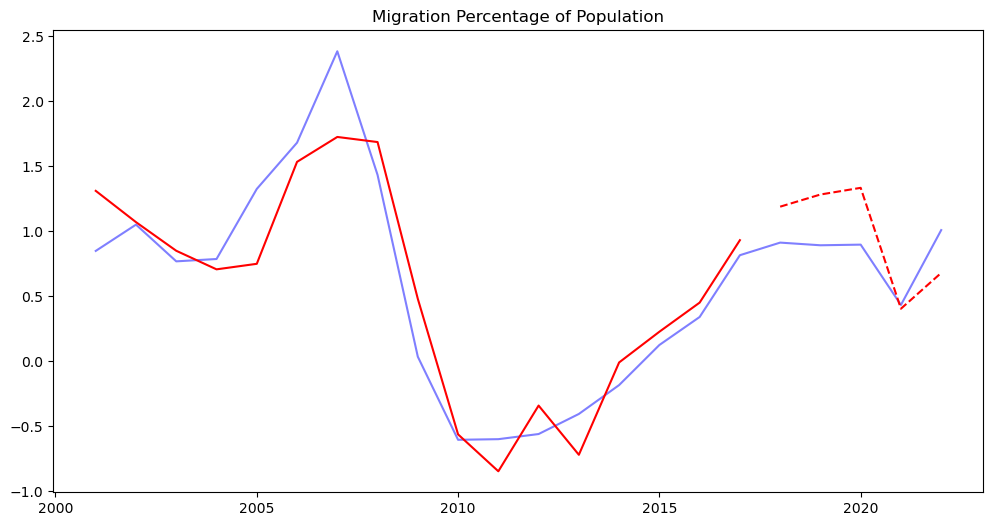

In [110]:
# plot data
Net_Migration_na['fitted_values'] = model.fittedvalues
Net_Migration_na['predicted_values']  = y_pred

plt.figure(figsize=(12,6))
plt.plot(Net_Migration_na['Migration Percentage of Population'], color='blue', alpha=0.5)
plt.plot(Net_Migration_na['fitted_values'], color='red')
plt.plot(Net_Migration_na['predicted_values'], color='red', linestyle='dashed')

plt.title('Migration Percentage of Population')
plt.show()

# Simple OLS with Unemployment foreigners in Ireland and t-1 migration and and emigration EU15-27 and surplus/deficit, including Crisis indicator

In [111]:
Net_Migration.columns

Index(['Unnamed: 0', 'Migration Percentage of Population',
       'T-1 Net migration 25-44 years', 'T-1 Enterprises_Ireland_250+',
       'T-1 General Surplus/Deficit (Million Euros)',
       'T-1 Trade Volume Index Imports (Base 2010)', 'T-1 Housing_CPI',
       'T-1 Trade Volume Index Exports (Base 2010)',
       'T-1 Unemployment rate_Ireland_Total_Foreign-born',
       'T-1 Emigrants 15-24 years', 'T-1 Emigrants_EU15 to EU27',
       'T-1 South Asia Percentage Change',
       'T-1 Migration Percentage of Population', 'T-1 Crisis Indicator',
       'Events_Positive_Impact', 'Events_Negative_Impact', 'Events_Impact'],
      dtype='object')

In [112]:
# Drop rows with missing values
X = Net_Migration[['T-1 Migration Percentage of Population', 'T-1 Unemployment rate_Ireland_Total_Foreign-born', 'T-1 General Surplus/Deficit (Million Euros)', 'T-1 Emigrants_EU15 to EU27', 'T-1 Crisis Indicator']]
X = X.dropna()

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

                                            feature       VIF
0            T-1 Migration Percentage of Population  1.484442
1  T-1 Unemployment rate_Ireland_Total_Foreign-born  6.631578
2       T-1 General Surplus/Deficit (Million Euros)  3.344478
3                        T-1 Emigrants_EU15 to EU27  8.844020
4                              T-1 Crisis Indicator  3.175554


In [113]:
Net_Migration_na = Net_Migration[['Migration Percentage of Population', 'T-1 Migration Percentage of Population', 'T-1 Unemployment rate_Ireland_Total_Foreign-born', 'T-1 General Surplus/Deficit (Million Euros)', 'T-1 Emigrants_EU15 to EU27', 'T-1 Crisis Indicator']].dropna()
X = Net_Migration_na[['T-1 Migration Percentage of Population', 'T-1 Unemployment rate_Ireland_Total_Foreign-born', 'T-1 General Surplus/Deficit (Million Euros)', 'T-1 Emigrants_EU15 to EU27', 'T-1 Crisis Indicator']]
y = Net_Migration_na['Migration Percentage of Population']

# Split the data into training and testing sets
split_index = int(len(X) * 0.8)
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

model.summary()

c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Migration Percentage of Population   R-squared:                       0.925
Model:                                            OLS   Adj. R-squared:                  0.871
Method:                                 Least Squares   F-statistic:                     17.25
Date:                                Sun, 02 Jun 2024   Prob (F-statistic):           0.000822
Time:                                        17:43:49   Log-Likelihood:               -0.63925
No. Observations:                                  13   AIC:                             13.28
Df Residuals:                                       7   BIC:                             16.67
Df Model:                                           5                                         
Covariance Type:                            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                0.5033      0.950      0.530      0.613      -1.744       2.751
T-1 Migration Percentage of Population               0.6471      0.326      1.984      0.088      -0.124       1.418
T-1 Unemployment rate_Ireland_Total_Foreign-born     0.0341      0.080      0.424      0.684      -0.156       0.224
T-1 General Surplus/Deficit (Million Euros)       1.337e-05    9.9e-06      1.350      0.219   -1.01e-05    3.68e-05
T-1 Emigrants_EU15 to EU27                       -2.676e-05   2.56e-05     -1.044      0.331   -8.73e-05    3.38e-05
T-1 Crisis Indicator                                -0.3144      0.117     -2.693      0.031      -0.591      -0.038
==============================================================================
Omnibus:                        1.666   Durbin-Watson:                   2.522
Prob(Omnibus):                  0.435   Jarque-Bera (JB):                0.905
Skew:                           0.635   Prob(JB):                        0.636
Kurtosis:                       2.763   Cond. No.                     2.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [114]:
# Assuming 'migration_indexed' has a datetime index
index = Net_Migration_na.index

# Predict using the model and specify the index
y_pred = model.predict(sm.add_constant(X_test))
# y_pred = model.predict(start=split_index, end=len(Net_Migration_na)-1, typ='levels', index=index[split_index:])

# Create a DataFrame for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).dropna()  
print(comparison)

# Extract the filtered y_test and y_pred
y_test_filtered = comparison['Actual']
y_pred_filtered = comparison['Predicted']


        Actual  Predicted
Year                     
2019  0.891710   1.184148
2020  0.896621   1.204961
2021  0.433127   0.248661
2022  1.008354   0.519131


In [115]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

MAE: 0.3186165862163277
MSE: 0.11348994366390609
RMSE: 0.33688268531330917


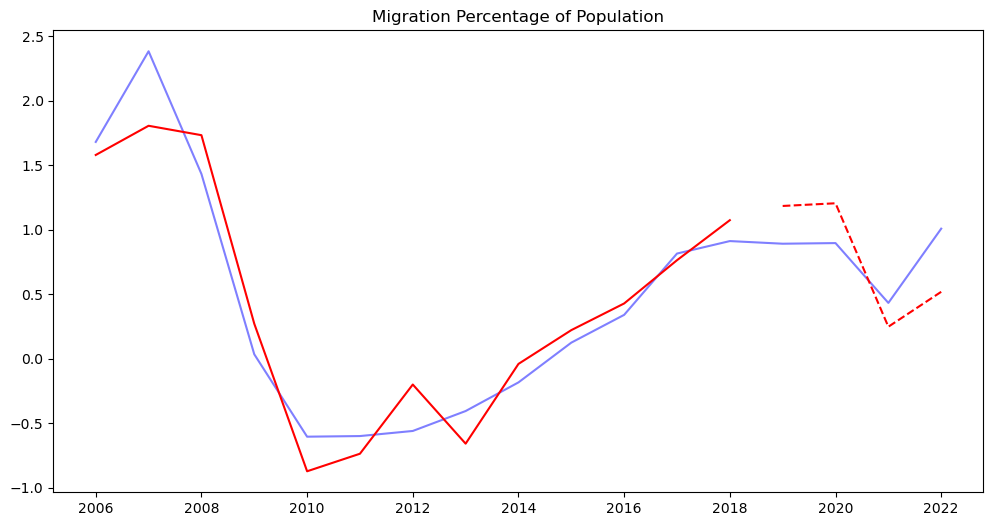

In [116]:
# plot data
Net_Migration_na['fitted_values'] = model.fittedvalues
Net_Migration_na['predicted_values']  = y_pred

plt.figure(figsize=(12,6))
plt.plot(Net_Migration_na['Migration Percentage of Population'], color='blue', alpha=0.5)
plt.plot(Net_Migration_na['fitted_values'], color='red')
plt.plot(Net_Migration_na['predicted_values'], color='red', linestyle='dashed')

plt.title('Migration Percentage of Population')
plt.show()

# NEW

# Simple OLS with Unemployment foreigners in Ireland

In [117]:
Net_Migration.columns

Index(['Unnamed: 0', 'Migration Percentage of Population',
       'T-1 Net migration 25-44 years', 'T-1 Enterprises_Ireland_250+',
       'T-1 General Surplus/Deficit (Million Euros)',
       'T-1 Trade Volume Index Imports (Base 2010)', 'T-1 Housing_CPI',
       'T-1 Trade Volume Index Exports (Base 2010)',
       'T-1 Unemployment rate_Ireland_Total_Foreign-born',
       'T-1 Emigrants 15-24 years', 'T-1 Emigrants_EU15 to EU27',
       'T-1 South Asia Percentage Change',
       'T-1 Migration Percentage of Population', 'T-1 Crisis Indicator',
       'Events_Positive_Impact', 'Events_Negative_Impact', 'Events_Impact'],
      dtype='object')

In [118]:
Net_Migration_na = Net_Migration[['Migration Percentage of Population', 'T-1 Unemployment rate_Ireland_Total_Foreign-born']].dropna()
X = Net_Migration_na[['T-1 Unemployment rate_Ireland_Total_Foreign-born']]
y = Net_Migration_na['Migration Percentage of Population']

# Split the data into training and testing sets
split_index = int(len(X) * 0.8)
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

model.summary()

c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Migration Percentage of Population   R-squared:                       0.702
Model:                                            OLS   Adj. R-squared:                  0.682
Method:                                 Least Squares   F-statistic:                     35.32
Date:                                Sun, 02 Jun 2024   Prob (F-statistic):           2.70e-05
Time:                                        17:43:50   Log-Likelihood:                -11.111
No. Observations:                                  17   AIC:                             26.22
Df Residuals:                                      15   BIC:                             27.89
Df Model:                                           1                                         
Covariance Type:                            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                2.0314      0.278      7.316      0.000       1.440       2.623
T-1 Unemployment rate_Ireland_Total_Foreign-born    -0.1489      0.025     -5.943      0.000      -0.202      -0.095
==============================================================================
Omnibus:                        5.237   Durbin-Watson:                   1.121
Prob(Omnibus):                  0.073   Jarque-Bera (JB):                2.740
Skew:                           0.581   Prob(JB):                        0.254
Kurtosis:                       4.587   Cond. No.                         25.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
# Assuming 'migration_indexed' has a datetime index
index = Net_Migration_na.index

# Predict using the model and specify the index
y_pred = model.predict(sm.add_constant(X_test))
# y_pred = model.predict(start=split_index, end=len(Net_Migration_na)-1, typ='levels', index=index[split_index:])

# Create a DataFrame for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).dropna()  
print(comparison)

# Extract the filtered y_test and y_pred
y_test_filtered = comparison['Actual']
y_pred_filtered = comparison['Predicted']


        Actual  Predicted
Year                     
2018  0.912207   0.810739
2019  0.891710   0.959603
2020  0.896621   1.153126
2021  0.433127   0.914944
2022  1.008354   0.914944


In [120]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

MAE: 0.2002184030778646
MSE: 0.06431448311772477
RMSE: 0.2536030029745799


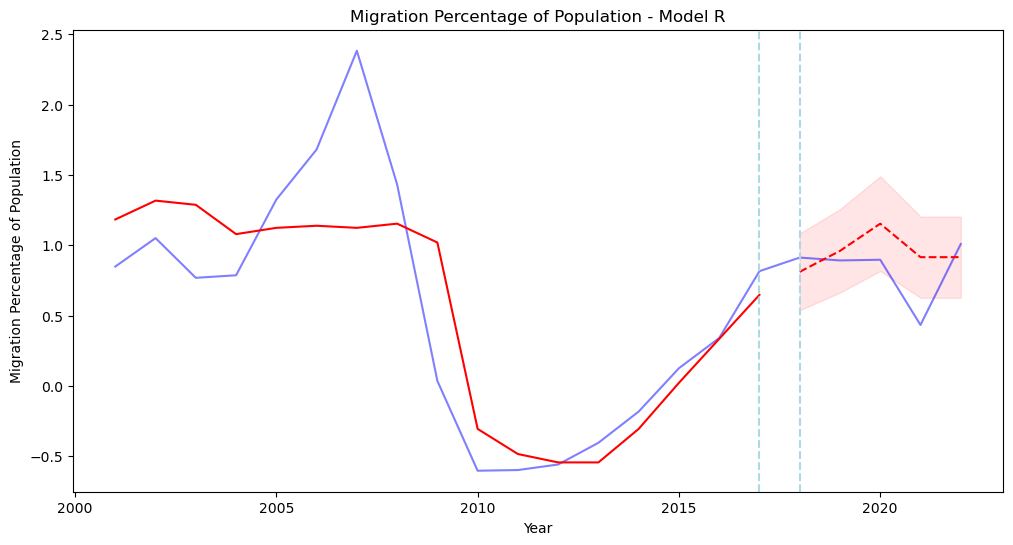

In [121]:
# plot data with 95% confidence interval
Net_Migration_na['fitted_values'] = model.fittedvalues
Net_Migration_na['predicted_values']  = y_pred


# calculate the confidence intervals
X_test_with_const = sm.add_constant(X_test)
predictions = model.get_prediction(X_test_with_const)
confidence_intervals = predictions.conf_int(alpha=0.05)
lower_bounds = confidence_intervals[:, 0]
upper_bounds = confidence_intervals[:, 1]

# plot
plt.figure(figsize=(12,6))
plt.plot(Net_Migration_na['Migration Percentage of Population'], color='blue', alpha=0.5)
plt.plot(Net_Migration_na['fitted_values'], color='red')
plt.plot(Net_Migration_na['predicted_values'], color='red', linestyle='dashed')

# Plotting the predicted values and confidence intervals for the test set
plt.fill_between(X_test_with_const.index, lower_bounds, upper_bounds, color='red', alpha=0.1, label='95% CI')


# lines at split_index
plt.axvline(x=2017, color='lightblue', linestyle='--')
plt.axvline(x=2018, color='lightblue', linestyle='--')

plt.title('Migration Percentage of Population - Model R')
plt.xlabel('Year')
plt.ylabel('Migration Percentage of Population')
plt.show()

# Simple OLS with Unemployment foreigners in Ireland and crisis indicator

In [122]:
Net_Migration.columns

Index(['Unnamed: 0', 'Migration Percentage of Population',
       'T-1 Net migration 25-44 years', 'T-1 Enterprises_Ireland_250+',
       'T-1 General Surplus/Deficit (Million Euros)',
       'T-1 Trade Volume Index Imports (Base 2010)', 'T-1 Housing_CPI',
       'T-1 Trade Volume Index Exports (Base 2010)',
       'T-1 Unemployment rate_Ireland_Total_Foreign-born',
       'T-1 Emigrants 15-24 years', 'T-1 Emigrants_EU15 to EU27',
       'T-1 South Asia Percentage Change',
       'T-1 Migration Percentage of Population', 'T-1 Crisis Indicator',
       'Events_Positive_Impact', 'Events_Negative_Impact', 'Events_Impact'],
      dtype='object')

In [123]:
Net_Migration_na = Net_Migration[['Migration Percentage of Population', 'T-1 Unemployment rate_Ireland_Total_Foreign-born', 'T-1 Crisis Indicator']].dropna()
X = Net_Migration_na[['T-1 Unemployment rate_Ireland_Total_Foreign-born', 'T-1 Crisis Indicator']]
y = Net_Migration_na['Migration Percentage of Population']

# Split the data into training and testing sets
split_index = int(len(X) * 0.8)
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

model.summary()

c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Migration Percentage of Population   R-squared:                       0.803
Model:                                            OLS   Adj. R-squared:                  0.774
Method:                                 Least Squares   F-statistic:                     28.46
Date:                                Sun, 02 Jun 2024   Prob (F-statistic):           1.17e-05
Time:                                        17:43:50   Log-Likelihood:                -7.6068
No. Observations:                                  17   AIC:                             21.21
Df Residuals:                                      14   BIC:                             23.71
Df Model:                                           2                                         
Covariance Type:                            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                2.2460      0.247      9.083      0.000       1.716       2.776
T-1 Unemployment rate_Ireland_Total_Foreign-born    -0.1348      0.022     -6.199      0.000      -0.181      -0.088
T-1 Crisis Indicator                                -0.2744      0.103     -2.672      0.018      -0.495      -0.054
==============================================================================
Omnibus:                        3.515   Durbin-Watson:                   1.340
Prob(Omnibus):                  0.173   Jarque-Bera (JB):                1.755
Skew:                           0.762   Prob(JB):                        0.416
Kurtosis:                       3.393   Cond. No.                         27.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [124]:
# Assuming 'migration_indexed' has a datetime index
index = Net_Migration_na.index

# Predict using the model and specify the index
y_pred = model.predict(sm.add_constant(X_test))
# y_pred = model.predict(start=split_index, end=len(Net_Migration_na)-1, typ='levels', index=index[split_index:])

# Create a DataFrame for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).dropna()  
print(comparison)

# Extract the filtered y_test and y_pred
y_test_filtered = comparison['Actual']
y_pred_filtered = comparison['Predicted']


        Actual  Predicted
Year                     
2018  0.912207   1.140614
2019  0.891710   1.275415
2020  0.896621   1.450657
2021  0.433127   0.686177
2022  1.008354   0.960576


In [125]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

MAE: 0.293395051499592
MSE: 0.11453437644227149
RMSE: 0.33842927834670494


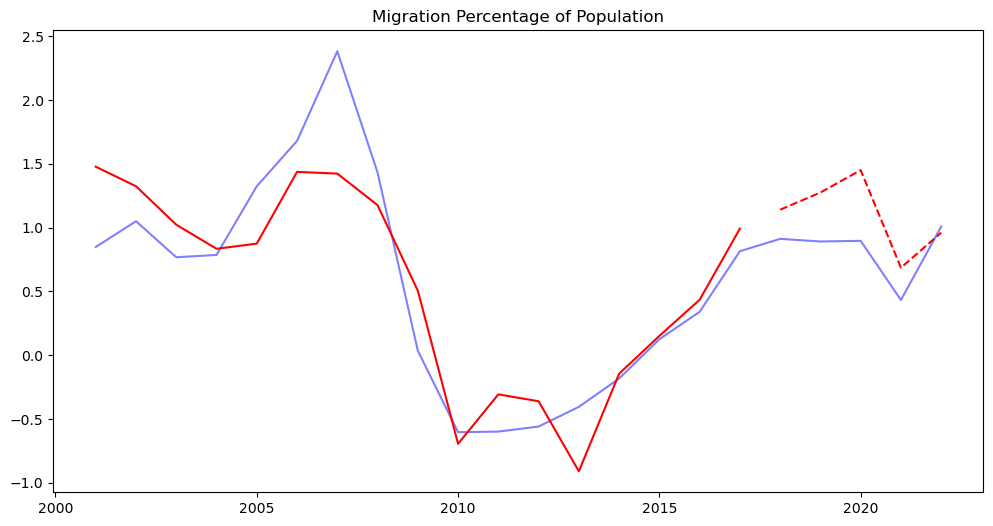

In [126]:
# plot data
Net_Migration_na['fitted_values'] = model.fittedvalues
Net_Migration_na['predicted_values']  = y_pred

plt.figure(figsize=(12,6))
plt.plot(Net_Migration_na['Migration Percentage of Population'], color='blue', alpha=0.5)
plt.plot(Net_Migration_na['fitted_values'], color='red')
plt.plot(Net_Migration_na['predicted_values'], color='red', linestyle='dashed')

plt.title('Migration Percentage of Population')
plt.show()

# Simple OLS with t-1 migration, crisis indicator and events_impact

In [127]:
Net_Migration.columns

Index(['Unnamed: 0', 'Migration Percentage of Population',
       'T-1 Net migration 25-44 years', 'T-1 Enterprises_Ireland_250+',
       'T-1 General Surplus/Deficit (Million Euros)',
       'T-1 Trade Volume Index Imports (Base 2010)', 'T-1 Housing_CPI',
       'T-1 Trade Volume Index Exports (Base 2010)',
       'T-1 Unemployment rate_Ireland_Total_Foreign-born',
       'T-1 Emigrants 15-24 years', 'T-1 Emigrants_EU15 to EU27',
       'T-1 South Asia Percentage Change',
       'T-1 Migration Percentage of Population', 'T-1 Crisis Indicator',
       'Events_Positive_Impact', 'Events_Negative_Impact', 'Events_Impact'],
      dtype='object')

In [128]:
# Drop rows with missing values
X = Net_Migration[['T-1 Migration Percentage of Population', 'T-1 Crisis Indicator', 'Events_Impact']]
X = X.dropna()

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

                                  feature       VIF
0  T-1 Migration Percentage of Population  1.120215
1                    T-1 Crisis Indicator  1.208980
2                           Events_Impact  1.327710


In [129]:
Net_Migration_na = Net_Migration[['Migration Percentage of Population', 'T-1 Migration Percentage of Population', 'T-1 Crisis Indicator', 'Events_Impact']].dropna()
X = Net_Migration_na[['T-1 Migration Percentage of Population', 'T-1 Crisis Indicator', 'Events_Impact']]
y = Net_Migration_na['Migration Percentage of Population']

# Split the data into training and testing sets
split_index = int(len(X) * 0.8)
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Migration Percentage of Population   R-squared:                       0.777
Model:                                            OLS   Adj. R-squared:                  0.762
Method:                                 Least Squares   F-statistic:                     52.31
Date:                                Sun, 02 Jun 2024   Prob (F-statistic):           1.03e-14
Time:                                        17:43:50   Log-Likelihood:                -18.564
No. Observations:                                  49   AIC:                             45.13
Df Residuals:                                      45   BIC:                             52.70
Df Model:                                           3                                         
Covariance Type:                            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.1691      0.077      2.195      0.033       0.014       0.324
T-1 Migration Percentage of Population     0.8806      0.074     11.967      0.000       0.732       1.029
T-1 Crisis Indicator                      -0.1674      0.072     -2.332      0.024      -0.312      -0.023
Events_Impact                             -0.0646      0.139     -0.463      0.645      -0.345       0.216
==============================================================================
Omnibus:                        0.159   Durbin-Watson:                   1.728
Prob(Omnibus):                  0.924   Jarque-Bera (JB):                0.014
Skew:                          -0.039   Prob(JB):                        0.993
Kurtosis:                       2.972   Cond. No.                         3.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
# Assuming 'migration_indexed' has a datetime index
index = Net_Migration_na.index

# Predict using the model and specify the index
y_pred = model.predict(sm.add_constant(X_test))
# y_pred = model.predict(start=split_index, end=len(Net_Migration_na)-1, typ='levels', index=index[split_index:])

# Create a DataFrame for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).dropna()  
print(comparison)

# Extract the filtered y_test and y_pred
y_test_filtered = comparison['Actual']
y_pred_filtered = comparison['Predicted']


        Actual  Predicted
Year                     
2010 -0.603050  -0.366532
2011 -0.598242  -0.529289
2012 -0.558752  -0.525056
2013 -0.404428  -0.825019
2014 -0.182492  -0.354383
2015  0.125480  -0.158947
2016  0.340670   0.047637
2017  0.815412   0.469118
2018  0.912207   0.887175
2019  0.891710   0.972413
2020  0.896621   0.889747
2021  0.433127   0.623950
2022  1.008354   0.318551


In [131]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

MAE: 0.2191259516485698
MSE: 0.0826452409808265
RMSE: 0.28748085324213596


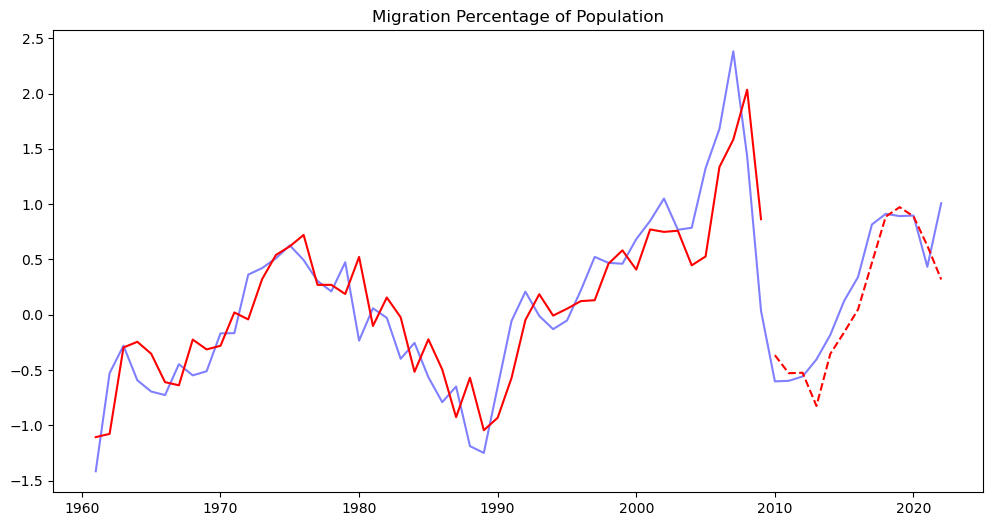

In [132]:
# plot data
Net_Migration_na['fitted_values'] = model.fittedvalues
Net_Migration_na['predicted_values']  = y_pred

plt.figure(figsize=(12,6))
plt.plot(Net_Migration_na['Migration Percentage of Population'], color='blue', alpha=0.5)
plt.plot(Net_Migration_na['fitted_values'], color='red')
plt.plot(Net_Migration_na['predicted_values'], color='red', linestyle='dashed')

plt.title('Migration Percentage of Population')
plt.show()

# Simple OLS with t-1 migration and surplus/deficit, including Crisis indicator

In [133]:
Net_Migration.columns

Index(['Unnamed: 0', 'Migration Percentage of Population',
       'T-1 Net migration 25-44 years', 'T-1 Enterprises_Ireland_250+',
       'T-1 General Surplus/Deficit (Million Euros)',
       'T-1 Trade Volume Index Imports (Base 2010)', 'T-1 Housing_CPI',
       'T-1 Trade Volume Index Exports (Base 2010)',
       'T-1 Unemployment rate_Ireland_Total_Foreign-born',
       'T-1 Emigrants 15-24 years', 'T-1 Emigrants_EU15 to EU27',
       'T-1 South Asia Percentage Change',
       'T-1 Migration Percentage of Population', 'T-1 Crisis Indicator',
       'Events_Positive_Impact', 'Events_Negative_Impact', 'Events_Impact'],
      dtype='object')

In [134]:
# Drop rows with missing values
X = Net_Migration[['T-1 Migration Percentage of Population', 'T-1 General Surplus/Deficit (Million Euros)','T-1 Crisis Indicator']]
X = X.dropna()

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

                                       feature       VIF
0       T-1 Migration Percentage of Population  1.479325
1  T-1 General Surplus/Deficit (Million Euros)  1.825490
2                         T-1 Crisis Indicator  2.071208


In [135]:
Net_Migration_na = Net_Migration[['Migration Percentage of Population', 'T-1 Migration Percentage of Population', 'T-1 General Surplus/Deficit (Million Euros)','T-1 Crisis Indicator']].dropna()
X = Net_Migration_na[['T-1 Migration Percentage of Population', 'T-1 General Surplus/Deficit (Million Euros)','T-1 Crisis Indicator']]
y = Net_Migration_na['Migration Percentage of Population']

# Split the data into training and testing sets
split_index = int(len(X) * 0.8)
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

final_model = model

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Migration Percentage of Population   R-squared:                       0.830
Model:                                            OLS   Adj. R-squared:                  0.800
Method:                                 Least Squares   F-statistic:                     27.74
Date:                                Sun, 02 Jun 2024   Prob (F-statistic):           8.91e-07
Time:                                        17:43:51   Log-Likelihood:                -5.6220
No. Observations:                                  21   AIC:                             19.24
Df Residuals:                                      17   BIC:                             23.42
Df Model:                                           3                                         
Covariance Type:                            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                           0.5775      0.144      4.013      0.001       0.274       0.881
T-1 Migration Percentage of Population          0.6069      0.122      4.994      0.000       0.351       0.863
T-1 General Surplus/Deficit (Million Euros)   1.65e-05   7.34e-06      2.249      0.038    1.02e-06     3.2e-05
T-1 Crisis Indicator                           -0.2194      0.085     -2.569      0.020      -0.400      -0.039
==============================================================================
Omnibus:                        1.822   Durbin-Watson:                   1.604
Prob(Omnibus):                  0.402   Jarque-Bera (JB):                1.095
Skew:                           0.559   Prob(JB):                        0.578
Kurtosis:                       2.950   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [136]:
# Assuming 'migration_indexed' has a datetime index
index = Net_Migration_na.index

# Predict using the model and specify the index
y_pred = model.predict(sm.add_constant(X_test))
# y_pred = model.predict(start=split_index, end=len(Net_Migration_na)-1, typ='levels', index=index[split_index:])

# Create a DataFrame for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).dropna()  
print(comparison)

# Extract the filtered y_test and y_pred
y_test_filtered = comparison['Actual']
y_pred_filtered = comparison['Predicted']


        Actual  Predicted
Year                     
2017  0.815412   0.749921
2018  0.912207   1.058117
2019  0.891710   1.138317
2020  0.896621   1.146637
2021  0.433127   0.374288
2022  1.008354   0.512655


In [137]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

MAE: 0.21042676071031877
MSE: 0.06634671765241053
RMSE: 0.2575785659801889


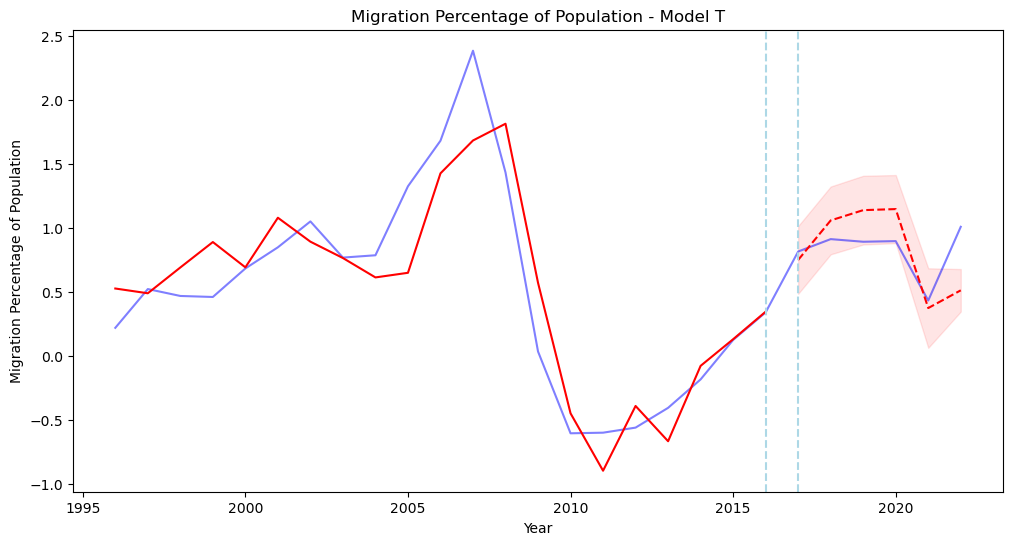

In [138]:
# plot data with 95% confidence interval
Net_Migration_na['fitted_values'] = model.fittedvalues
Net_Migration_na['predicted_values']  = y_pred


# calculate the confidence intervals
X_test_with_const = sm.add_constant(X_test)
predictions = model.get_prediction(X_test_with_const)
confidence_intervals = predictions.conf_int(alpha=0.05)
lower_bounds = confidence_intervals[:, 0]
upper_bounds = confidence_intervals[:, 1]

# plot
plt.figure(figsize=(12,6))
plt.plot(Net_Migration_na['Migration Percentage of Population'], color='blue', alpha=0.5)
plt.plot(Net_Migration_na['fitted_values'], color='red')
plt.plot(Net_Migration_na['predicted_values'], color='red', linestyle='dashed')

# Plotting the predicted values and confidence intervals for the test set
plt.fill_between(X_test_with_const.index, lower_bounds, upper_bounds, color='red', alpha=0.1, label='95% CI')


# add line at split_index
plt.axvline(x=2016, color='lightblue', linestyle='--')
plt.axvline(x=2017, color='lightblue', linestyle='--')

plt.title('Migration Percentage of Population - Model T')
plt.xlabel('Year')
plt.ylabel('Migration Percentage of Population')

plt.show()

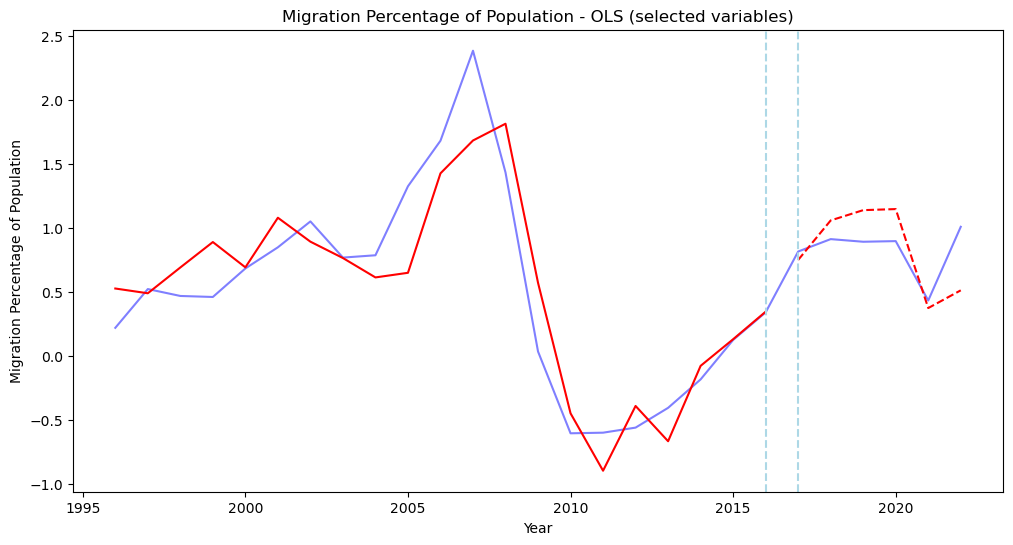

In [139]:
# plot data
Net_Migration_na['fitted_values'] = model.fittedvalues
Net_Migration_na['predicted_values']  = y_pred

plt.figure(figsize=(12,6))
plt.plot(Net_Migration_na['Migration Percentage of Population'], color='blue', alpha=0.5)
plt.plot(Net_Migration_na['fitted_values'], color='red')
plt.plot(Net_Migration_na['predicted_values'], color='red', linestyle='dashed')

# add line at split_index
plt.axvline(x=2016, color='lightblue', linestyle='--')
plt.axvline(x=2017, color='lightblue', linestyle='--')

plt.title('Migration Percentage of Population - OLS (selected variables)')
plt.xlabel('Year')
plt.ylabel('Migration Percentage of Population')

plt.show()

In [140]:
X_test

,T-1 Migration Percentage of Population,T-1 General Surplus/Deficit (Million Euros),T-1 Crisis Indicator
Year,,,
2017,0.340670,-2079.0,0
2018,0.815412,-863.0,0
2019,0.912207,437.0,0
2020,0.891710,1695.0,0
2021,0.896621,-18704.0,2
2022,0.433127,-6565.0,1


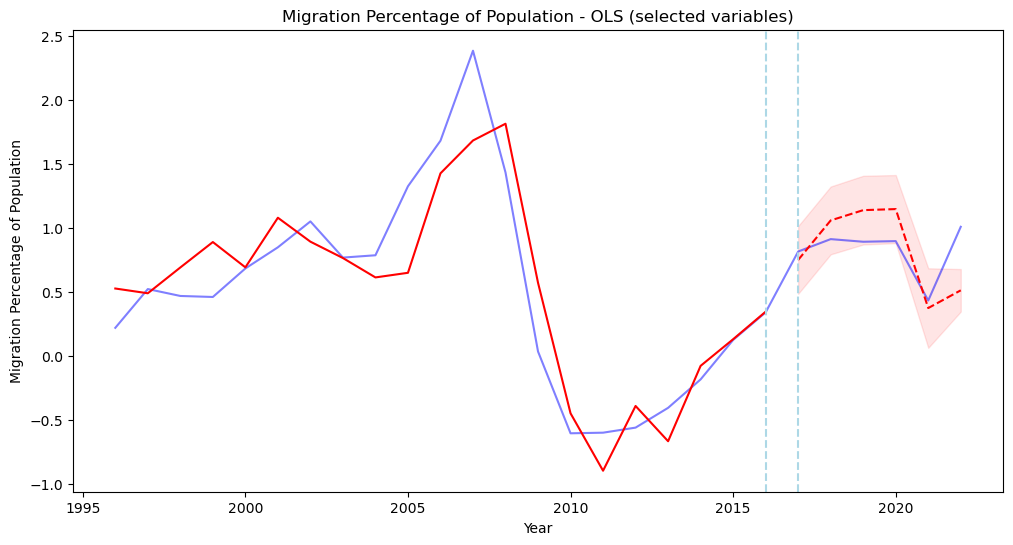

In [141]:
# plot data with 95% confidence interval
Net_Migration_na['fitted_values'] = model.fittedvalues
Net_Migration_na['predicted_values']  = y_pred


# calculate the confidence intervals
X_test_with_const = sm.add_constant(X_test)
predictions = model.get_prediction(X_test_with_const)
confidence_intervals = predictions.conf_int(alpha=0.05)
lower_bounds = confidence_intervals[:, 0]
upper_bounds = confidence_intervals[:, 1]

# plot
plt.figure(figsize=(12,6))
plt.plot(Net_Migration_na['Migration Percentage of Population'], color='blue', alpha=0.5)
plt.plot(Net_Migration_na['fitted_values'], color='red')
plt.plot(Net_Migration_na['predicted_values'], color='red', linestyle='dashed')

# Plotting the predicted values and confidence intervals for the test set
plt.fill_between(X_test_with_const.index, lower_bounds, upper_bounds, color='red', alpha=0.1, label='95% CI')


# add line at split_index
plt.axvline(x=2016, color='lightblue', linestyle='--')
plt.axvline(x=2017, color='lightblue', linestyle='--')

plt.title('Migration Percentage of Population - OLS (selected variables)')
plt.xlabel('Year')
plt.ylabel('Migration Percentage of Population')

plt.show()

In [263]:
# save data to csv 
Net_Migration_Percentage = Net_Migration[['Migration Percentage of Population']]
Net_Migration_Percentage.to_csv('Net_Migration_Percentage.csv')


# Simple OLS with t-1 migration and surplus/deficit, including Crisis indicator & events impact

In [124]:
Net_Migration.columns

Index(['Unnamed: 0', 'Migration Percentage of Population',
       'T-1 Net migration 25-44 years', 'T-1 Enterprises_Ireland_250+',
       'T-1 General Surplus/Deficit (Million Euros)',
       'T-1 Trade Volume Index Imports (Base 2010)', 'T-1 Housing_CPI',
       'T-1 Trade Volume Index Exports (Base 2010)',
       'T-1 Unemployment rate_Ireland_Total_Foreign-born',
       'T-1 Emigrants 15-24 years', 'T-1 Emigrants_EU15 to EU27',
       'T-1 South Asia Percentage Change',
       'T-1 Migration Percentage of Population', 'T-1 Crisis Indicator',
       'Events_Positive_Impact', 'Events_Negative_Impact', 'Events_Impact'],
      dtype='object')

In [125]:
# Drop rows with missing values
X = Net_Migration[['T-1 Migration Percentage of Population', 'T-1 General Surplus/Deficit (Million Euros)','T-1 Crisis Indicator', 'Events_Impact']]
X = X.dropna()

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

                                       feature       VIF
0       T-1 Migration Percentage of Population  1.846633
1  T-1 General Surplus/Deficit (Million Euros)  1.835459
2                         T-1 Crisis Indicator  2.276264
3                                Events_Impact  1.818429


In [126]:
Net_Migration_na = Net_Migration[['Migration Percentage of Population', 'T-1 Migration Percentage of Population', 'T-1 General Surplus/Deficit (Million Euros)','T-1 Crisis Indicator', 'Events_Impact']].dropna()
X = Net_Migration_na[['T-1 Migration Percentage of Population', 'T-1 General Surplus/Deficit (Million Euros)','T-1 Crisis Indicator', 'Events_Impact']]
y = Net_Migration_na['Migration Percentage of Population']

# Split the data into training and testing sets
split_index = int(len(X) * 0.8)
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Migration Percentage of Population   R-squared:                       0.831
Model:                                            OLS   Adj. R-squared:                  0.789
Method:                                 Least Squares   F-statistic:                     19.68
Date:                                Tue, 28 May 2024   Prob (F-statistic):           5.06e-06
Time:                                        13:47:19   Log-Likelihood:                -5.5775
No. Observations:                                  21   AIC:                             21.16
Df Residuals:                                      16   BIC:                             26.38
Df Model:                                           4                                         
Covariance Type:                            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                           0.5760      0.148      3.889      0.001       0.262       0.890
T-1 Migration Percentage of Population          0.6237      0.141      4.436      0.000       0.326       0.922
T-1 General Surplus/Deficit (Million Euros)  1.622e-05   7.62e-06      2.128      0.049    6.34e-08    3.24e-05
T-1 Crisis Indicator                           -0.2120      0.092     -2.299      0.035      -0.408      -0.016
Events_Impact                                  -0.0519      0.199     -0.261      0.798      -0.474       0.370
==============================================================================
Omnibus:                        1.907   Durbin-Watson:                   1.640
Prob(Omnibus):                  0.385   Jarque-Bera (JB):                1.106
Skew:                           0.562   Prob(JB):                        0.575
Kurtosis:                       2.999   Cond. No.                     4.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [127]:
# Assuming 'migration_indexed' has a datetime index
index = Net_Migration_na.index

# Predict using the model and specify the index
y_pred = model.predict(sm.add_constant(X_test))
# y_pred = model.predict(start=split_index, end=len(Net_Migration_na)-1, typ='levels', index=index[split_index:])

# Create a DataFrame for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).dropna()  
print(comparison)

# Extract the filtered y_test and y_pred
y_test_filtered = comparison['Actual']
y_pred_filtered = comparison['Predicted']


        Actual  Predicted
Year                     
2017  0.815412   0.754728
2018  0.912207   1.070557
2019  0.891710   1.152019
2020  0.896621   1.107767
2021  0.433127   0.407740
2022  1.008354   0.475727


In [128]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

MAE: 0.20808355362816525
MSE: 0.07090601856697143
RMSE: 0.2662818404754095


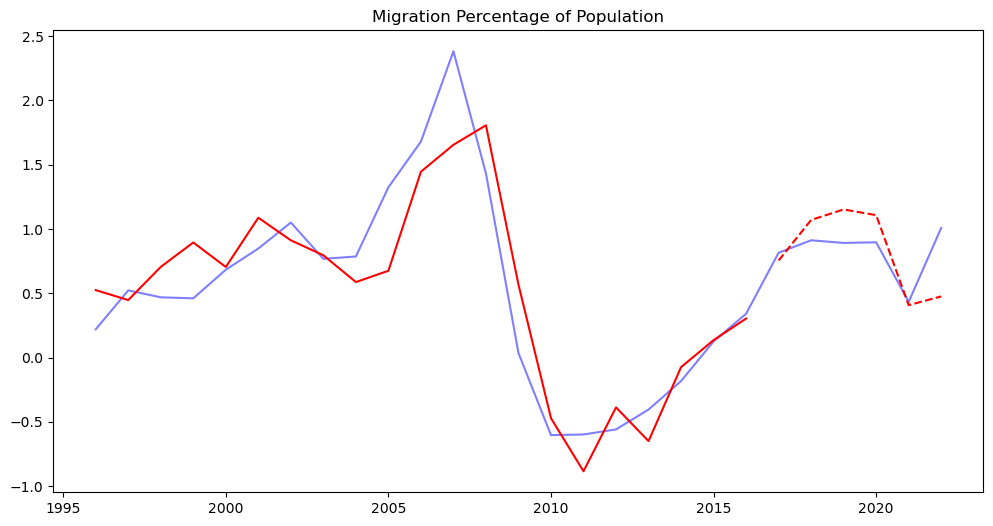

In [129]:
# plot data
Net_Migration_na['fitted_values'] = model.fittedvalues
Net_Migration_na['predicted_values']  = y_pred

plt.figure(figsize=(12,6))
plt.plot(Net_Migration_na['Migration Percentage of Population'], color='blue', alpha=0.5)
plt.plot(Net_Migration_na['fitted_values'], color='red')
plt.plot(Net_Migration_na['predicted_values'], color='red', linestyle='dashed')

plt.title('Migration Percentage of Population')
plt.show()

# Simple OLS with t-1 migration, surplus/deficit and housing CPI, including Crisis indicator

In [130]:
Net_Migration.columns

Index(['Unnamed: 0', 'Migration Percentage of Population',
       'T-1 Net migration 25-44 years', 'T-1 Enterprises_Ireland_250+',
       'T-1 General Surplus/Deficit (Million Euros)',
       'T-1 Trade Volume Index Imports (Base 2010)', 'T-1 Housing_CPI',
       'T-1 Trade Volume Index Exports (Base 2010)',
       'T-1 Unemployment rate_Ireland_Total_Foreign-born',
       'T-1 Emigrants 15-24 years', 'T-1 Emigrants_EU15 to EU27',
       'T-1 South Asia Percentage Change',
       'T-1 Migration Percentage of Population', 'T-1 Crisis Indicator',
       'Events_Positive_Impact', 'Events_Negative_Impact', 'Events_Impact'],
      dtype='object')

In [131]:
# Drop rows with missing values
X = Net_Migration[['T-1 Migration Percentage of Population', 'T-1 General Surplus/Deficit (Million Euros)', 'T-1 Housing_CPI', 'T-1 Crisis Indicator']]
X = X.dropna()

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

                                       feature       VIF
0       T-1 Migration Percentage of Population  2.822300
1  T-1 General Surplus/Deficit (Million Euros)  1.944395
2                              T-1 Housing_CPI  1.969695
3                         T-1 Crisis Indicator  2.367377


In [132]:
Net_Migration_na = Net_Migration[['Migration Percentage of Population', 'T-1 Migration Percentage of Population', 'T-1 General Surplus/Deficit (Million Euros)', 'T-1 Housing_CPI', 'T-1 Crisis Indicator']].dropna()
X = Net_Migration_na[['T-1 Migration Percentage of Population', 'T-1 General Surplus/Deficit (Million Euros)', 'T-1 Housing_CPI', 'T-1 Crisis Indicator']]
y = Net_Migration_na['Migration Percentage of Population']

# Split the data into training and testing sets
split_index = int(len(X) * 0.8)
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Migration Percentage of Population   R-squared:                       0.841
Model:                                            OLS   Adj. R-squared:                  0.798
Method:                                 Least Squares   F-statistic:                     19.82
Date:                                Tue, 28 May 2024   Prob (F-statistic):           7.53e-06
Time:                                        13:47:19   Log-Likelihood:                -5.1945
No. Observations:                                  20   AIC:                             20.39
Df Residuals:                                      15   BIC:                             25.37
Df Model:                                           4                                         
Covariance Type:                            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                           0.6289      0.162      3.889      0.001       0.284       0.974
T-1 Migration Percentage of Population          0.5436      0.160      3.407      0.004       0.204       0.884
T-1 General Surplus/Deficit (Million Euros)  1.818e-05   7.99e-06      2.275      0.038    1.15e-06    3.52e-05
T-1 Housing_CPI                                 0.0048      0.013      0.376      0.712      -0.022       0.032
T-1 Crisis Indicator                           -0.2248      0.098     -2.297      0.036      -0.433      -0.016
==============================================================================
Omnibus:                        1.352   Durbin-Watson:                   1.659
Prob(Omnibus):                  0.509   Jarque-Bera (JB):                0.842
Skew:                           0.496   Prob(JB):                        0.656
Kurtosis:                       2.841   Cond. No.                     3.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [133]:
# Assuming 'migration_indexed' has a datetime index
index = Net_Migration_na.index

# Predict using the model and specify the index
y_pred = model.predict(sm.add_constant(X_test))
# y_pred = model.predict(start=split_index, end=len(Net_Migration_na)-1, typ='levels', index=index[split_index:])

# Create a DataFrame for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).dropna()  
print(comparison)

# Extract the filtered y_test and y_pred
y_test_filtered = comparison['Actual']
y_pred_filtered = comparison['Predicted']


        Actual  Predicted
Year                     
2018  0.912207   1.066271
2019  0.891710   1.157136
2020  0.896621   1.162480
2021  0.433127   0.321763
2022  1.008354   0.547207


In [134]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

MAE: 0.2515718014584444
MSE: 0.07798508108055688
RMSE: 0.27925809044780936


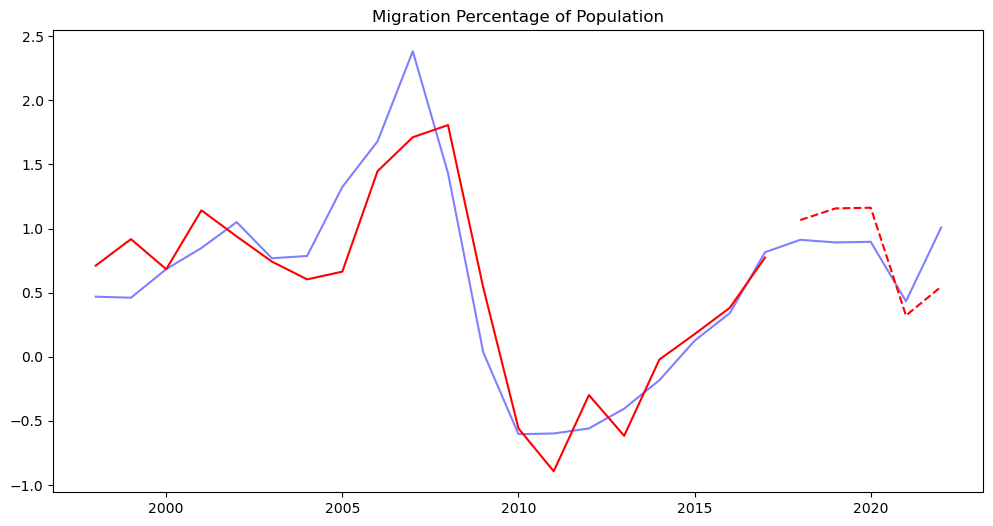

In [135]:
# plot data
Net_Migration_na['fitted_values'] = model.fittedvalues
Net_Migration_na['predicted_values']  = y_pred

plt.figure(figsize=(12,6))
plt.plot(Net_Migration_na['Migration Percentage of Population'], color='blue', alpha=0.5)
plt.plot(Net_Migration_na['fitted_values'], color='red')
plt.plot(Net_Migration_na['predicted_values'], color='red', linestyle='dashed')

plt.title('Migration Percentage of Population')
plt.show()

# Simple OLS with t-1 migration, surplus/deficit and Imports, including Crisis indicator

In [136]:
Net_Migration.columns

Index(['Unnamed: 0', 'Migration Percentage of Population',
       'T-1 Net migration 25-44 years', 'T-1 Enterprises_Ireland_250+',
       'T-1 General Surplus/Deficit (Million Euros)',
       'T-1 Trade Volume Index Imports (Base 2010)', 'T-1 Housing_CPI',
       'T-1 Trade Volume Index Exports (Base 2010)',
       'T-1 Unemployment rate_Ireland_Total_Foreign-born',
       'T-1 Emigrants 15-24 years', 'T-1 Emigrants_EU15 to EU27',
       'T-1 South Asia Percentage Change',
       'T-1 Migration Percentage of Population', 'T-1 Crisis Indicator',
       'Events_Positive_Impact', 'Events_Negative_Impact', 'Events_Impact'],
      dtype='object')

In [137]:
# Drop rows with missing values
X = Net_Migration[['T-1 Migration Percentage of Population', 'T-1 General Surplus/Deficit (Million Euros)', 'T-1 Trade Volume Index Imports (Base 2010)', 'T-1 Crisis Indicator']]
X = X.dropna()

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

                                       feature       VIF
0       T-1 Migration Percentage of Population  2.671625
1  T-1 General Surplus/Deficit (Million Euros)  2.089597
2   T-1 Trade Volume Index Imports (Base 2010)  3.011195
3                         T-1 Crisis Indicator  2.236639


In [138]:
Net_Migration_na = Net_Migration[['Migration Percentage of Population', 'T-1 Migration Percentage of Population', 'T-1 General Surplus/Deficit (Million Euros)', 'T-1 Trade Volume Index Imports (Base 2010)', 'T-1 Crisis Indicator']].dropna()
X = Net_Migration_na[['T-1 Migration Percentage of Population', 'T-1 General Surplus/Deficit (Million Euros)', 'T-1 Trade Volume Index Imports (Base 2010)', 'T-1 Crisis Indicator']]
y = Net_Migration_na['Migration Percentage of Population']

# Split the data into training and testing sets
split_index = int(len(X) * 0.8)
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Migration Percentage of Population   R-squared:                       0.841
Model:                                            OLS   Adj. R-squared:                  0.801
Method:                                 Least Squares   F-statistic:                     21.18
Date:                                Tue, 28 May 2024   Prob (F-statistic):           3.13e-06
Time:                                        13:47:19   Log-Likelihood:                -4.9340
No. Observations:                                  21   AIC:                             19.87
Df Residuals:                                      16   BIC:                             25.09
Df Model:                                           4                                         
Covariance Type:                            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                           0.2595      0.337      0.769      0.453      -0.456       0.975
T-1 Migration Percentage of Population          0.5474      0.134      4.084      0.001       0.263       0.832
T-1 General Surplus/Deficit (Million Euros)  1.848e-05   7.56e-06      2.443      0.027    2.45e-06    3.45e-05
T-1 Trade Volume Index Imports (Base 2010)      0.0035      0.003      1.041      0.313      -0.004       0.011
T-1 Crisis Indicator                           -0.2385      0.087     -2.736      0.015      -0.423      -0.054
==============================================================================
Omnibus:                        2.065   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.356   Jarque-Bera (JB):                1.361
Skew:                           0.620   Prob(JB):                        0.506
Kurtosis:                       2.877   Cond. No.                     6.60e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [139]:
# Assuming 'migration_indexed' has a datetime index
index = Net_Migration_na.index

# Predict using the model and specify the index
y_pred = model.predict(sm.add_constant(X_test))
# y_pred = model.predict(start=split_index, end=len(Net_Migration_na)-1, typ='levels', index=index[split_index:])

# Create a DataFrame for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).dropna()  
print(comparison)

# Extract the filtered y_test and y_pred
y_test_filtered = comparison['Actual']
y_pred_filtered = comparison['Predicted']


        Actual  Predicted
Year                     
2017  0.815412   0.967930
2018  0.912207   1.288158
2019  0.891710   1.437062
2020  0.896621   1.461482
2021  0.433127   0.616381
2022  1.008354   0.896607


In [140]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

MAE: 0.322280454558516
MSE: 0.13785785731809
RMSE: 0.37129214551090356


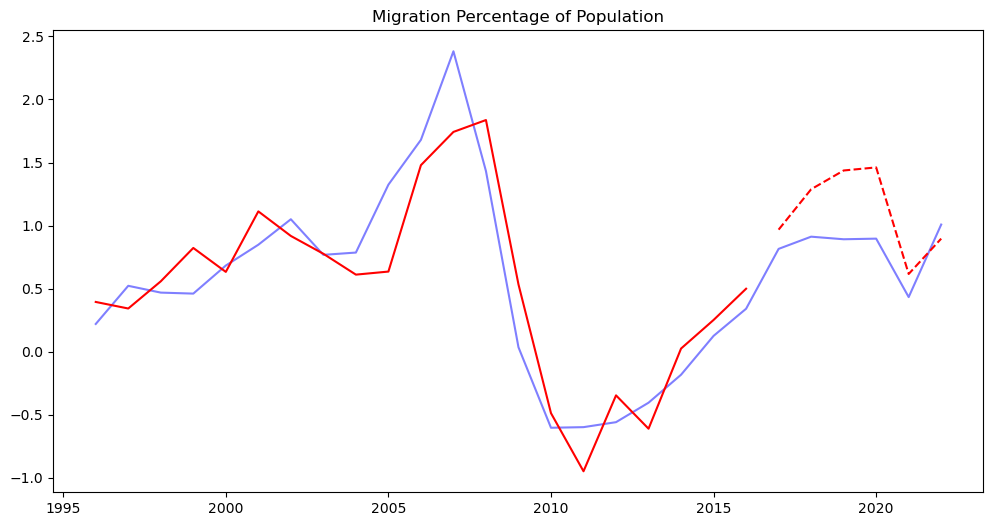

In [141]:
# plot data
Net_Migration_na['fitted_values'] = model.fittedvalues
Net_Migration_na['predicted_values']  = y_pred

plt.figure(figsize=(12,6))
plt.plot(Net_Migration_na['Migration Percentage of Population'], color='blue', alpha=0.5)
plt.plot(Net_Migration_na['fitted_values'], color='red')
plt.plot(Net_Migration_na['predicted_values'], color='red', linestyle='dashed')

plt.title('Migration Percentage of Population')
plt.show()

# Simple OLS with t-1 migration, surplus/deficit and exports, including Crisis indicator

In [142]:
Net_Migration.columns

Index(['Unnamed: 0', 'Migration Percentage of Population',
       'T-1 Net migration 25-44 years', 'T-1 Enterprises_Ireland_250+',
       'T-1 General Surplus/Deficit (Million Euros)',
       'T-1 Trade Volume Index Imports (Base 2010)', 'T-1 Housing_CPI',
       'T-1 Trade Volume Index Exports (Base 2010)',
       'T-1 Unemployment rate_Ireland_Total_Foreign-born',
       'T-1 Emigrants 15-24 years', 'T-1 Emigrants_EU15 to EU27',
       'T-1 South Asia Percentage Change',
       'T-1 Migration Percentage of Population', 'T-1 Crisis Indicator',
       'Events_Positive_Impact', 'Events_Negative_Impact', 'Events_Impact'],
      dtype='object')

In [143]:
# Drop rows with missing values
X = Net_Migration[['T-1 Migration Percentage of Population', 'T-1 General Surplus/Deficit (Million Euros)', 'T-1 Trade Volume Index Exports (Base 2010)', 'T-1 Crisis Indicator']]
X = X.dropna()

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

                                       feature       VIF
0       T-1 Migration Percentage of Population  2.548926
1  T-1 General Surplus/Deficit (Million Euros)  2.130761
2   T-1 Trade Volume Index Exports (Base 2010)  2.952302
3                         T-1 Crisis Indicator  2.246386


In [144]:
Net_Migration_na = Net_Migration[['Migration Percentage of Population', 'T-1 Migration Percentage of Population', 'T-1 General Surplus/Deficit (Million Euros)', 'T-1 Trade Volume Index Exports (Base 2010)', 'T-1 Crisis Indicator']].dropna()
X = Net_Migration_na[['T-1 Migration Percentage of Population', 'T-1 General Surplus/Deficit (Million Euros)', 'T-1 Trade Volume Index Exports (Base 2010)', 'T-1 Crisis Indicator']]
y = Net_Migration_na['Migration Percentage of Population']

# Split the data into training and testing sets
split_index = int(len(X) * 0.8)
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Migration Percentage of Population   R-squared:                       0.856
Model:                                            OLS   Adj. R-squared:                  0.820
Method:                                 Least Squares   F-statistic:                     23.81
Date:                                Tue, 28 May 2024   Prob (F-statistic):           1.44e-06
Time:                                        13:47:20   Log-Likelihood:                -3.8904
No. Observations:                                  21   AIC:                             17.78
Df Residuals:                                      16   BIC:                             23.00
Df Model:                                           4                                         
Covariance Type:                            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                           0.1186      0.303      0.391      0.701      -0.525       0.762
T-1 Migration Percentage of Population          0.5427      0.121      4.470      0.000       0.285       0.800
T-1 General Surplus/Deficit (Million Euros)   2.06e-05   7.37e-06      2.794      0.013    4.97e-06    3.62e-05
T-1 Trade Volume Index Exports (Base 2010)      0.0062      0.004      1.694      0.110      -0.002       0.014
T-1 Crisis Indicator                           -0.2574      0.084     -3.060      0.007      -0.436      -0.079
==============================================================================
Omnibus:                        2.150   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.341   Jarque-Bera (JB):                1.675
Skew:                           0.667   Prob(JB):                        0.433
Kurtosis:                       2.634   Cond. No.                     6.22e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [145]:
# Assuming 'migration_indexed' has a datetime index
index = Net_Migration_na.index

# Predict using the model and specify the index
y_pred = model.predict(sm.add_constant(X_test))
# y_pred = model.predict(start=split_index, end=len(Net_Migration_na)-1, typ='levels', index=index[split_index:])

# Create a DataFrame for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).dropna()  
print(comparison)

# Extract the filtered y_test and y_pred
y_test_filtered = comparison['Actual']
y_pred_filtered = comparison['Predicted']


        Actual  Predicted
Year                     
2017  0.815412   1.043677
2018  0.912207   1.389968
2019  0.891710   1.596459
2020  0.896621   1.687928
2021  0.433127   0.880918
2022  1.008354   1.153639


In [146]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

MAE: 0.46585971067022464
MSE: 0.27080362223355664
RMSE: 0.5203879535822833


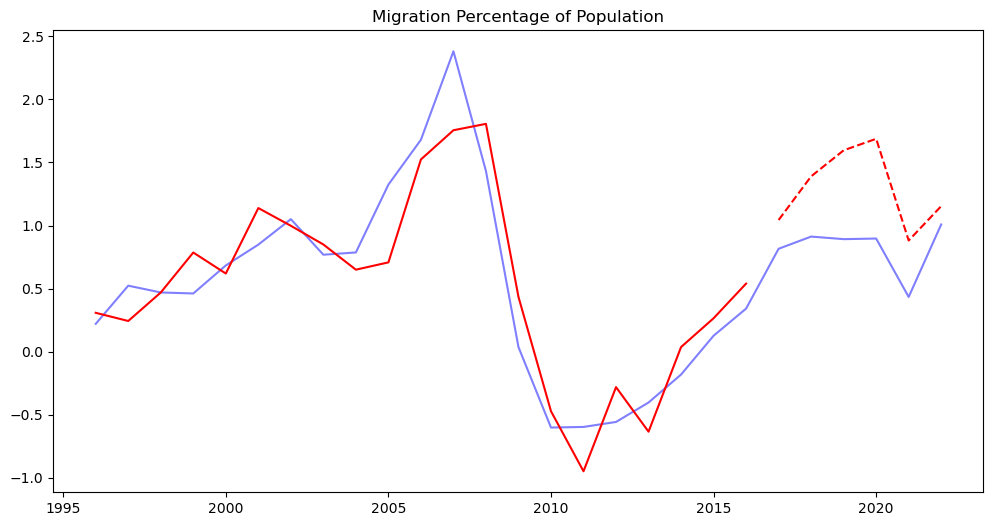

In [147]:
# plot data
Net_Migration_na['fitted_values'] = model.fittedvalues
Net_Migration_na['predicted_values']  = y_pred

plt.figure(figsize=(12,6))
plt.plot(Net_Migration_na['Migration Percentage of Population'], color='blue', alpha=0.5)
plt.plot(Net_Migration_na['fitted_values'], color='red')
plt.plot(Net_Migration_na['predicted_values'], color='red', linestyle='dashed')

plt.title('Migration Percentage of Population')
plt.show()

# Simple OLS with t-1 migration, surplus/deficit, housing CPI and Imports, including Crisis indicator

In [148]:
Net_Migration.columns

Index(['Unnamed: 0', 'Migration Percentage of Population',
       'T-1 Net migration 25-44 years', 'T-1 Enterprises_Ireland_250+',
       'T-1 General Surplus/Deficit (Million Euros)',
       'T-1 Trade Volume Index Imports (Base 2010)', 'T-1 Housing_CPI',
       'T-1 Trade Volume Index Exports (Base 2010)',
       'T-1 Unemployment rate_Ireland_Total_Foreign-born',
       'T-1 Emigrants 15-24 years', 'T-1 Emigrants_EU15 to EU27',
       'T-1 South Asia Percentage Change',
       'T-1 Migration Percentage of Population', 'T-1 Crisis Indicator',
       'Events_Positive_Impact', 'Events_Negative_Impact', 'Events_Impact'],
      dtype='object')

In [149]:
# Drop rows with missing values
X = Net_Migration[['T-1 Migration Percentage of Population', 'T-1 General Surplus/Deficit (Million Euros)', 'T-1 Housing_CPI', 'T-1 Trade Volume Index Imports (Base 2010)', 'T-1 Crisis Indicator']]
X = X.dropna()

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

                                       feature       VIF
0       T-1 Migration Percentage of Population  3.444176
1  T-1 General Surplus/Deficit (Million Euros)  2.142284
2                              T-1 Housing_CPI  2.168398
3   T-1 Trade Volume Index Imports (Base 2010)  3.334574
4                         T-1 Crisis Indicator  2.713605


In [150]:
Net_Migration_na = Net_Migration[['Migration Percentage of Population', 'T-1 Migration Percentage of Population', 'T-1 General Surplus/Deficit (Million Euros)', 'T-1 Housing_CPI', 'T-1 Trade Volume Index Imports (Base 2010)', 'T-1 Crisis Indicator']].dropna()
X = Net_Migration_na[['T-1 Migration Percentage of Population', 'T-1 General Surplus/Deficit (Million Euros)', 'T-1 Housing_CPI', 'T-1 Trade Volume Index Imports (Base 2010)', 'T-1 Crisis Indicator']]
y = Net_Migration_na['Migration Percentage of Population']

# Split the data into training and testing sets
split_index = int(len(X) * 0.8)
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Migration Percentage of Population   R-squared:                       0.845
Model:                                            OLS   Adj. R-squared:                  0.790
Method:                                 Least Squares   F-statistic:                     15.30
Date:                                Tue, 28 May 2024   Prob (F-statistic):           3.04e-05
Time:                                        13:47:20   Log-Likelihood:                -4.9137
No. Observations:                                  20   AIC:                             21.83
Df Residuals:                                      14   BIC:                             27.80
Df Model:                                           5                                         
Covariance Type:                            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                           0.3520      0.468      0.751      0.465      -0.653       1.357
T-1 Migration Percentage of Population          0.5368      0.163      3.289      0.005       0.187       0.887
T-1 General Surplus/Deficit (Million Euros)  1.839e-05   8.16e-06      2.253      0.041    8.86e-07    3.59e-05
T-1 Housing_CPI                                 0.0028      0.013      0.213      0.834      -0.026       0.032
T-1 Trade Volume Index Imports (Base 2010)      0.0025      0.004      0.631      0.538      -0.006       0.011
T-1 Crisis Indicator                           -0.2300      0.100     -2.295      0.038      -0.445      -0.015
==============================================================================
Omnibus:                        2.124   Durbin-Watson:                   1.752
Prob(Omnibus):                  0.346   Jarque-Bera (JB):                1.320
Skew:                           0.628   Prob(JB):                        0.517
Kurtosis:                       2.929   Cond. No.                     8.67e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [151]:
# Assuming 'migration_indexed' has a datetime index
index = Net_Migration_na.index

# Predict using the model and specify the index
y_pred = model.predict(sm.add_constant(X_test))
# y_pred = model.predict(start=split_index, end=len(Net_Migration_na)-1, typ='levels', index=index[split_index:])

# Create a DataFrame for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).dropna()  
print(comparison)

# Extract the filtered y_test and y_pred
y_test_filtered = comparison['Actual']
y_pred_filtered = comparison['Predicted']


        Actual  Predicted
Year                     
2018  0.912207   1.209672
2019  0.891710   1.345912
2020  0.896621   1.363158
2021  0.433127   0.521287
2022  1.008354   0.795907


In [152]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

MAE: 0.30376196002229416
MSE: 0.1130693635111635
RMSE: 0.3362578824520899


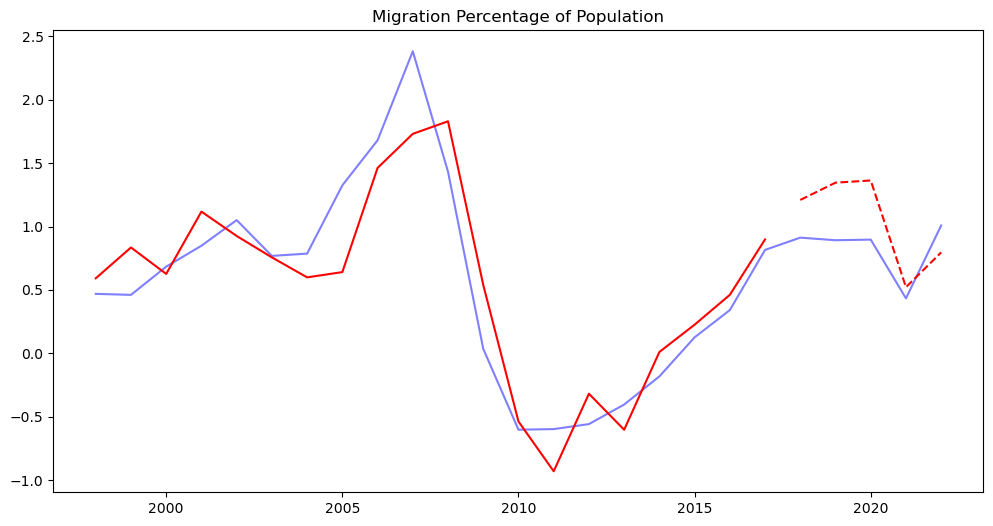

In [153]:
# plot data
Net_Migration_na['fitted_values'] = model.fittedvalues
Net_Migration_na['predicted_values']  = y_pred

plt.figure(figsize=(12,6))
plt.plot(Net_Migration_na['Migration Percentage of Population'], color='blue', alpha=0.5)
plt.plot(Net_Migration_na['fitted_values'], color='red')
plt.plot(Net_Migration_na['predicted_values'], color='red', linestyle='dashed')

plt.title('Migration Percentage of Population')
plt.show()

# Simple OLS with t-1 migration, surplus/deficit, housing CPI and Exports, including Crisis indicator

In [154]:
Net_Migration.columns

Index(['Unnamed: 0', 'Migration Percentage of Population',
       'T-1 Net migration 25-44 years', 'T-1 Enterprises_Ireland_250+',
       'T-1 General Surplus/Deficit (Million Euros)',
       'T-1 Trade Volume Index Imports (Base 2010)', 'T-1 Housing_CPI',
       'T-1 Trade Volume Index Exports (Base 2010)',
       'T-1 Unemployment rate_Ireland_Total_Foreign-born',
       'T-1 Emigrants 15-24 years', 'T-1 Emigrants_EU15 to EU27',
       'T-1 South Asia Percentage Change',
       'T-1 Migration Percentage of Population', 'T-1 Crisis Indicator',
       'Events_Positive_Impact', 'Events_Negative_Impact', 'Events_Impact'],
      dtype='object')

In [155]:
# Drop rows with missing values
X = Net_Migration[['T-1 Migration Percentage of Population', 'T-1 General Surplus/Deficit (Million Euros)', 'T-1 Housing_CPI', 'T-1 Trade Volume Index Exports (Base 2010)', 'T-1 Crisis Indicator']]
X = X.dropna()

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

                                       feature       VIF
0       T-1 Migration Percentage of Population  3.380014
1  T-1 General Surplus/Deficit (Million Euros)  2.180705
2                              T-1 Housing_CPI  2.135807
3   T-1 Trade Volume Index Exports (Base 2010)  3.212656
4                         T-1 Crisis Indicator  2.711222


In [156]:
Net_Migration_na = Net_Migration[['Migration Percentage of Population', 'T-1 Migration Percentage of Population', 'T-1 General Surplus/Deficit (Million Euros)', 'T-1 Housing_CPI', 'T-1 Trade Volume Index Exports (Base 2010)', 'T-1 Crisis Indicator']].dropna()
X = Net_Migration_na[['T-1 Migration Percentage of Population', 'T-1 General Surplus/Deficit (Million Euros)', 'T-1 Housing_CPI', 'T-1 Trade Volume Index Exports (Base 2010)', 'T-1 Crisis Indicator']]
y = Net_Migration_na['Migration Percentage of Population']

# Split the data into training and testing sets
split_index = int(len(X) * 0.8)
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Migration Percentage of Population   R-squared:                       0.860
Model:                                            OLS   Adj. R-squared:                  0.810
Method:                                 Least Squares   F-statistic:                     17.24
Date:                                Tue, 28 May 2024   Prob (F-statistic):           1.52e-05
Time:                                        13:47:20   Log-Likelihood:                -3.8932
No. Observations:                                  20   AIC:                             19.79
Df Residuals:                                      14   BIC:                             25.76
Df Model:                                           5                                         
Covariance Type:                            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                           0.0374      0.452      0.083      0.935      -0.932       1.007
T-1 Migration Percentage of Population          0.5485      0.155      3.544      0.003       0.217       0.881
T-1 General Surplus/Deficit (Million Euros)  1.987e-05   7.84e-06      2.533      0.024    3.05e-06    3.67e-05
T-1 Housing_CPI                                 0.0018      0.013      0.145      0.887      -0.025       0.029
T-1 Trade Volume Index Exports (Base 2010)      0.0065      0.005      1.395      0.185      -0.004       0.017
T-1 Crisis Indicator                           -0.2425      0.096     -2.532      0.024      -0.448      -0.037
==============================================================================
Omnibus:                        2.589   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.274   Jarque-Bera (JB):                1.810
Skew:                           0.731   Prob(JB):                        0.405
Kurtosis:                       2.814   Cond. No.                     8.81e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [157]:
# Assuming 'migration_indexed' has a datetime index
index = Net_Migration_na.index

# Predict using the model and specify the index
y_pred = model.predict(sm.add_constant(X_test))
# y_pred = model.predict(start=split_index, end=len(Net_Migration_na)-1, typ='levels', index=index[split_index:])

# Create a DataFrame for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).dropna()  
print(comparison)

# Extract the filtered y_test and y_pred
y_test_filtered = comparison['Actual']
y_pred_filtered = comparison['Predicted']


        Actual  Predicted
Year                     
2018  0.912207   1.357253
2019  0.891710   1.574827
2020  0.896621   1.666396
2021  0.433127   0.901067
2022  1.008354   1.160339


In [158]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

MAE: 0.5035728333122049
MSE: 0.29986720640681913
RMSE: 0.5476013206766572


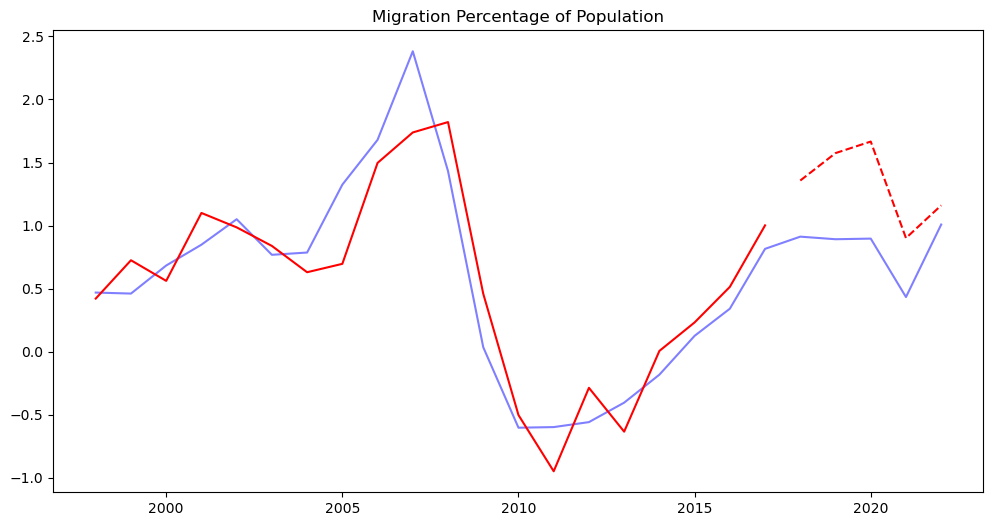

In [159]:
# plot data
Net_Migration_na['fitted_values'] = model.fittedvalues
Net_Migration_na['predicted_values']  = y_pred

plt.figure(figsize=(12,6))
plt.plot(Net_Migration_na['Migration Percentage of Population'], color='blue', alpha=0.5)
plt.plot(Net_Migration_na['fitted_values'], color='red')
plt.plot(Net_Migration_na['predicted_values'], color='red', linestyle='dashed')

plt.title('Migration Percentage of Population')
plt.show()

# Simple OLS with t-1 migration, surplus/deficit, south asia % change, including Crisis indicator

In [160]:
Net_Migration.columns

Index(['Unnamed: 0', 'Migration Percentage of Population',
       'T-1 Net migration 25-44 years', 'T-1 Enterprises_Ireland_250+',
       'T-1 General Surplus/Deficit (Million Euros)',
       'T-1 Trade Volume Index Imports (Base 2010)', 'T-1 Housing_CPI',
       'T-1 Trade Volume Index Exports (Base 2010)',
       'T-1 Unemployment rate_Ireland_Total_Foreign-born',
       'T-1 Emigrants 15-24 years', 'T-1 Emigrants_EU15 to EU27',
       'T-1 South Asia Percentage Change',
       'T-1 Migration Percentage of Population', 'T-1 Crisis Indicator',
       'Events_Positive_Impact', 'Events_Negative_Impact', 'Events_Impact'],
      dtype='object')

In [161]:
# Drop rows with missing values
X = Net_Migration[['T-1 Migration Percentage of Population', 'T-1 General Surplus/Deficit (Million Euros)', 'T-1 South Asia Percentage Change', 'T-1 Crisis Indicator']]
X = X.dropna()

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

                                       feature       VIF
0       T-1 Migration Percentage of Population  2.145921
1  T-1 General Surplus/Deficit (Million Euros)  1.906280
2             T-1 South Asia Percentage Change  2.921690
3                         T-1 Crisis Indicator  2.628304


In [162]:
Net_Migration_na = Net_Migration[['Migration Percentage of Population', 'T-1 Migration Percentage of Population', 'T-1 General Surplus/Deficit (Million Euros)', 'T-1 South Asia Percentage Change', 'T-1 Crisis Indicator']].dropna()
X = Net_Migration_na[['T-1 Migration Percentage of Population', 'T-1 General Surplus/Deficit (Million Euros)', 'T-1 South Asia Percentage Change', 'T-1 Crisis Indicator']]
y = Net_Migration_na['Migration Percentage of Population']

# Split the data into training and testing sets
split_index = int(len(X) * 0.8)
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Migration Percentage of Population   R-squared:                       0.833
Model:                                            OLS   Adj. R-squared:                  0.791
Method:                                 Least Squares   F-statistic:                     19.91
Date:                                Tue, 28 May 2024   Prob (F-statistic):           4.70e-06
Time:                                        13:47:21   Log-Likelihood:                -5.4780
No. Observations:                                  21   AIC:                             20.96
Df Residuals:                                      16   BIC:                             26.18
Df Model:                                           4                                         
Covariance Type:                            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                           0.8639      0.627      1.378      0.187      -0.465       2.193
T-1 Migration Percentage of Population          0.5998      0.125      4.785      0.000       0.334       0.865
T-1 General Surplus/Deficit (Million Euros)  1.824e-05   8.37e-06      2.178      0.045    4.91e-07     3.6e-05
T-1 South Asia Percentage Change               -0.1542      0.328     -0.470      0.645      -0.850       0.541
T-1 Crisis Indicator                           -0.2275      0.089     -2.553      0.021      -0.416      -0.039
==============================================================================
Omnibus:                        1.534   Durbin-Watson:                   1.672
Prob(Omnibus):                  0.464   Jarque-Bera (JB):                1.006
Skew:                           0.530   Prob(JB):                        0.605
Kurtosis:                       2.833   Cond. No.                     1.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [163]:
# Assuming 'migration_indexed' has a datetime index
index = Net_Migration_na.index

# Predict using the model and specify the index
y_pred = model.predict(sm.add_constant(X_test))
# y_pred = model.predict(start=split_index, end=len(Net_Migration_na)-1, typ='levels', index=index[split_index:])

# Create a DataFrame for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).dropna()  
print(comparison)

# Extract the filtered y_test and y_pred
y_test_filtered = comparison['Actual']
y_pred_filtered = comparison['Predicted']


        Actual  Predicted
Year                     
2017  0.815412   0.843298
2018  0.912207   1.149602
2019  0.891710   1.235796
2020  0.896621   1.253109
2021  0.433127   0.432010
2022  1.008354   0.617622


In [164]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

MAE: 0.22628391143785018
MSE: 0.07588081915994206
RMSE: 0.2754647330602269


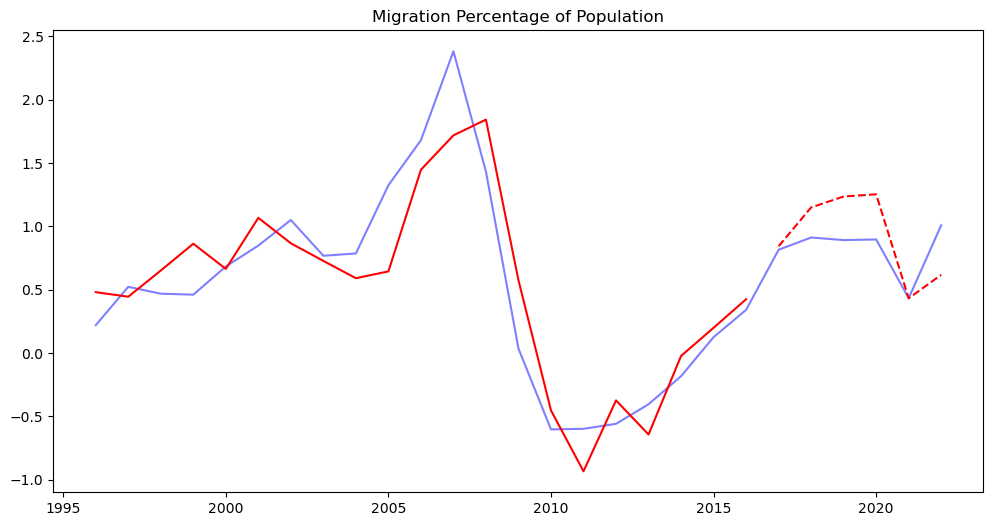

In [165]:
# plot data
Net_Migration_na['fitted_values'] = model.fittedvalues
Net_Migration_na['predicted_values']  = y_pred

plt.figure(figsize=(12,6))
plt.plot(Net_Migration_na['Migration Percentage of Population'], color='blue', alpha=0.5)
plt.plot(Net_Migration_na['fitted_values'], color='red')
plt.plot(Net_Migration_na['predicted_values'], color='red', linestyle='dashed')

plt.title('Migration Percentage of Population')
plt.show()

# LOGARITHMIC

# LOG(migration) with t-1 migration and surplus/deficit, including Crisis indicator

In [166]:
Net_Migration.columns

Index(['Unnamed: 0', 'Migration Percentage of Population',
       'T-1 Net migration 25-44 years', 'T-1 Enterprises_Ireland_250+',
       'T-1 General Surplus/Deficit (Million Euros)',
       'T-1 Trade Volume Index Imports (Base 2010)', 'T-1 Housing_CPI',
       'T-1 Trade Volume Index Exports (Base 2010)',
       'T-1 Unemployment rate_Ireland_Total_Foreign-born',
       'T-1 Emigrants 15-24 years', 'T-1 Emigrants_EU15 to EU27',
       'T-1 South Asia Percentage Change',
       'T-1 Migration Percentage of Population', 'T-1 Crisis Indicator',
       'Events_Positive_Impact', 'Events_Negative_Impact', 'Events_Impact'],
      dtype='object')

In [179]:
Net_Migration_na = Net_Migration[['Migration Percentage of Population', 'T-1 Migration Percentage of Population', 'T-1 General Surplus/Deficit (Million Euros)','T-1 Crisis Indicator']].dropna()
X = Net_Migration_na[['T-1 Migration Percentage of Population', 'T-1 General Surplus/Deficit (Million Euros)','T-1 Crisis Indicator']]
y = Net_Migration_na['Migration Percentage of Population']

# Split the data into training and testing sets
split_index = int(len(X) * 0.8)
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

X_train = sm.add_constant(X_train)

model = sm.OLS(y_train.apply(lambda x: np.log(x) if x > 0 else -np.log(-x)), X_train).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Migration Percentage of Population   R-squared:                       0.048
Model:                                            OLS   Adj. R-squared:                 -0.120
Method:                                 Least Squares   F-statistic:                    0.2852
Date:                                Wed, 29 May 2024   Prob (F-statistic):              0.835
Time:                                        18:30:40   Log-Likelihood:                -31.311
No. Observations:                                  21   AIC:                             70.62
Df Residuals:                                      17   BIC:                             74.80
Df Model:                                           3                                         
Covariance Type:                            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -0.0895      0.489     -0.183      0.857      -1.121       0.942
T-1 Migration Percentage of Population         -0.0477      0.413     -0.115      0.909      -0.919       0.824
T-1 General Surplus/Deficit (Million Euros) -1.521e-05   2.49e-05     -0.610      0.550   -6.78e-05    3.74e-05
T-1 Crisis Indicator                           -0.1832      0.290     -0.631      0.536      -0.796       0.429
==============================================================================
Omnibus:                        4.867   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.088   Jarque-Bera (JB):                2.946
Skew:                          -0.876   Prob(JB):                        0.229
Kurtosis:                       3.547   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [180]:
# Assuming 'migration_indexed' has a datetime index
index = Net_Migration_na.index

# Predict using the model and specify the index
y_pred = np.exp(model.predict(sm.add_constant(X_test)))
# y_pred = model.predict(start=split_index, end=len(Net_Migration_na)-1, typ='levels', index=index[split_index:])

# Create a DataFrame for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).dropna()  
print(comparison)

# Extract the filtered y_test and y_pred
y_test_filtered = comparison['Actual']

# transform back to original scale
y_pred_filtered = comparison['Predicted']


        Actual  Predicted
Year                     
2017  0.815412   0.928571
2018  0.912207   0.891164
2019  0.891710   0.869695
2020  0.896621   0.854047
2021  0.433127   0.807199
2022  1.008354   0.824065


In [181]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

MAE: 0.12619198699801293
MSE: 0.031572880230903766
RMSE: 0.17768759166273757


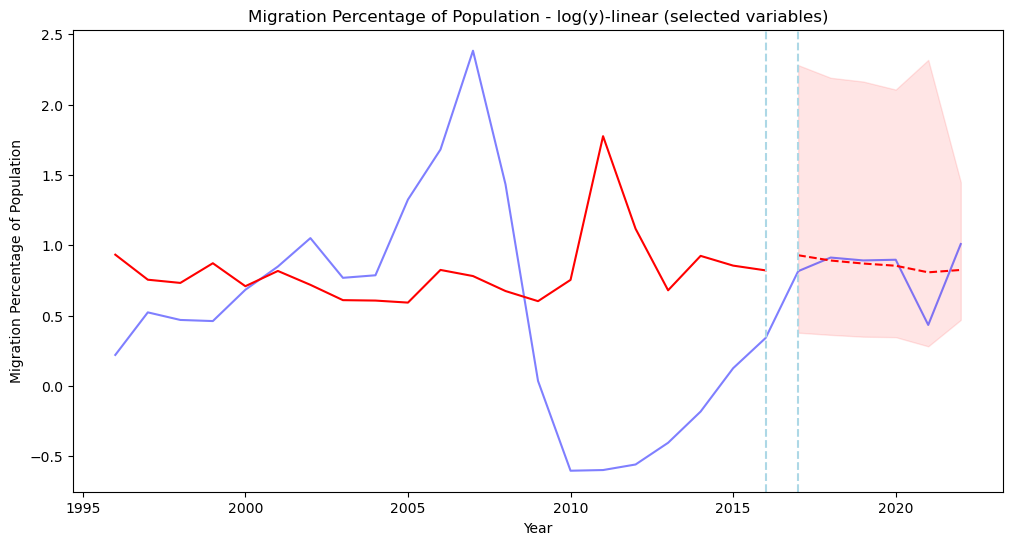

In [182]:
# plot data
Net_Migration_na['fitted_values'] = np.exp(model.fittedvalues)
Net_Migration_na['predicted_values']  = y_pred

# calculate the confidence intervals
X_test_with_const = sm.add_constant(X_test)
predictions = model.get_prediction(X_test_with_const)
confidence_intervals = predictions.conf_int(alpha=0.05)
lower_bounds = np.exp(confidence_intervals[:, 0])
upper_bounds = np.exp(confidence_intervals[:, 1])

# plot
plt.figure(figsize=(12,6))
plt.plot(Net_Migration_na['Migration Percentage of Population'], color='blue', alpha=0.5)
plt.plot(Net_Migration_na['fitted_values'], color='red')
plt.plot(Net_Migration_na['predicted_values'], color='red', linestyle='dashed')

# Plotting the predicted values and confidence intervals for the test set
plt.fill_between(X_test_with_const.index, lower_bounds, upper_bounds, color='red', alpha=0.1, label='95% CI')

# add line at split_index
plt.axvline(x=2016, color='lightblue', linestyle='--')
plt.axvline(x=2017, color='lightblue', linestyle='--')

plt.title('Migration Percentage of Population - log(y)-linear (selected variables)')
plt.xlabel('Year')
plt.ylabel('Migration Percentage of Population')

plt.show()

# LOG(migration) with t-1 unemployment

In [ ]:
Net_Migration.columns

Index(['Unnamed: 0', 'Migration Percentage of Population',
       'T-1 Net migration 25-44 years', 'T-1 Enterprises_Ireland_250+',
       'T-1 General Surplus/Deficit (Million Euros)',
       'T-1 Trade Volume Index Imports (Base 2010)', 'T-1 Housing_CPI',
       'T-1 Trade Volume Index Exports (Base 2010)',
       'T-1 Unemployment rate_Ireland_Total_Foreign-born',
       'T-1 Emigrants 15-24 years', 'T-1 Emigrants_EU15 to EU27',
       'T-1 South Asia Percentage Change',
       'T-1 Migration Percentage of Population', 'T-1 Crisis Indicator',
       'Events_Positive_Impact', 'Events_Negative_Impact', 'Events_Impact'],
      dtype='object')

In [527]:
Net_Migration_na = Net_Migration[['Migration Percentage of Population', 'T-1 Unemployment rate_Ireland_Total_Foreign-born']].dropna()
X = Net_Migration_na[['T-1 Unemployment rate_Ireland_Total_Foreign-born']]
y = Net_Migration_na['Migration Percentage of Population']

# Split the data into training and testing sets
split_index = int(len(X) * 0.8)
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

X_train = sm.add_constant(X_train)

model = sm.OLS(y_train.apply(lambda x: np.log(x) if x > 0 else -np.log(-x)), X_train).fit()

model.summary()

c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Migration Percentage of Population   R-squared:                       0.063
Model:                                            OLS   Adj. R-squared:                  0.001
Method:                                 Least Squares   F-statistic:                     1.015
Date:                                Tue, 28 May 2024   Prob (F-statistic):              0.330
Time:                                        15:05:46   Log-Likelihood:                -25.980
No. Observations:                                  17   AIC:                             55.96
Df Residuals:                                      15   BIC:                             57.63
Df Model:                                           1                                         
Covariance Type:                            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -0.6687      0.666     -1.004      0.331      -2.088       0.751
T-1 Unemployment rate_Ireland_Total_Foreign-born     0.0605      0.060      1.008      0.330      -0.068       0.189
==============================================================================
Omnibus:                       11.858   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                8.625
Skew:                          -1.525   Prob(JB):                       0.0134
Kurtosis:                       4.695   Cond. No.                         25.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [528]:
# Assuming 'migration_indexed' has a datetime index
index = Net_Migration_na.index

# Predict using the model and specify the index
y_pred = np.exp(model.predict(sm.add_constant(X_test)))
# y_pred = model.predict(start=split_index, end=len(Net_Migration_na)-1, typ='levels', index=index[split_index:])

# Create a DataFrame for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).dropna()  
print(comparison)

# Extract the filtered y_test and y_pred
y_test_filtered = comparison['Actual']

# transform back to original scale
y_pred_filtered = comparison['Predicted']


        Actual  Predicted
Year                     
2018  0.912207   0.841612
2019  0.891710   0.792186
2020  0.896621   0.732246
2021  0.433127   0.806701
2022  1.008354   0.806701


In [529]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

MAE: 0.18194424547161175
MSE: 0.04442583575245877
RMSE: 0.21077437166899293


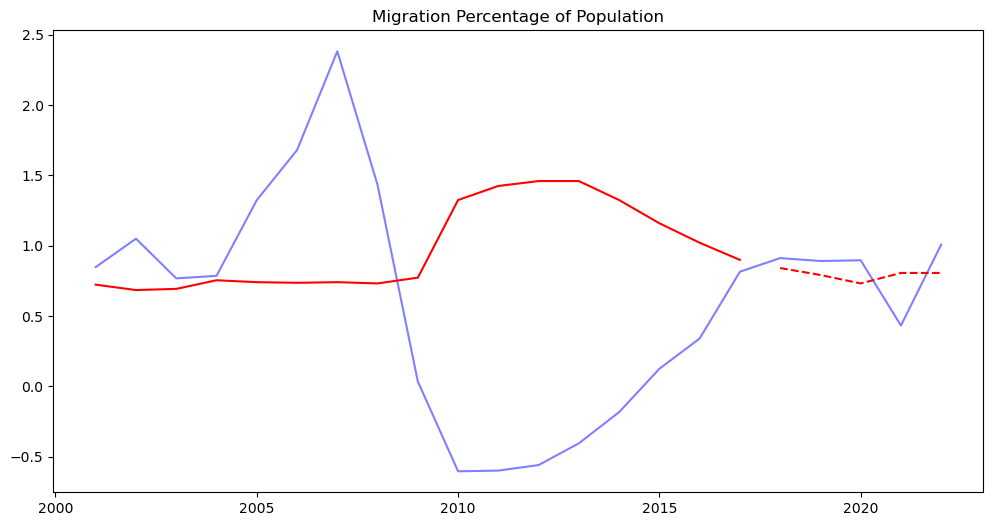

In [530]:
# plot data
Net_Migration_na['fitted_values'] = np.exp(model.fittedvalues)
Net_Migration_na['predicted_values']  = y_pred

plt.figure(figsize=(12,6))
plt.plot(Net_Migration_na['Migration Percentage of Population'], color='blue', alpha=0.5)
plt.plot(Net_Migration_na['fitted_values'], color='red')
plt.plot(Net_Migration_na['predicted_values'], color='red', linestyle='dashed')

plt.title('Migration Percentage of Population')
plt.show()

# Descision Tree

In [171]:
# Decision tree
Net_Migration_na = Net_Migration.dropna()
# [['Migration Percentage of Population', 'T-1 Migration Percentage of Population', 'T-1 General Surplus/Deficit (Million Euros)','T-1 Crisis Indicator']]
# X drop the target variable
X = Net_Migration_na.drop(columns=['Migration Percentage of Population'])
y = Net_Migration_na['Migration Percentage of Population']

# Split the data into training and testing sets
split_index = int(len(X) * 0.8)
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

# Create a decision tree regressor
model = DecisionTreeRegressor(max_depth=4)
model.fit(X_train, y_train)

model.score(X_test, y_test)


-2.8035092204799854

In [172]:
X.columns

# X.columns as list
features = list(X.columns)
features

['Unnamed: 0',
 'T-1 Net migration 25-44 years',
 'T-1 Enterprises_Ireland_250+',
 'T-1 General Surplus/Deficit (Million Euros)',
 'T-1 Trade Volume Index Imports (Base 2010)',
 'T-1 Housing_CPI',
 'T-1 Trade Volume Index Exports (Base 2010)',
 'T-1 Unemployment rate_Ireland_Total_Foreign-born',
 'T-1 Emigrants 15-24 years',
 'T-1 Emigrants_EU15 to EU27',
 'T-1 South Asia Percentage Change',
 'T-1 Migration Percentage of Population',
 'T-1 Crisis Indicator',
 'Events_Positive_Impact',
 'Events_Negative_Impact',
 'Events_Impact']

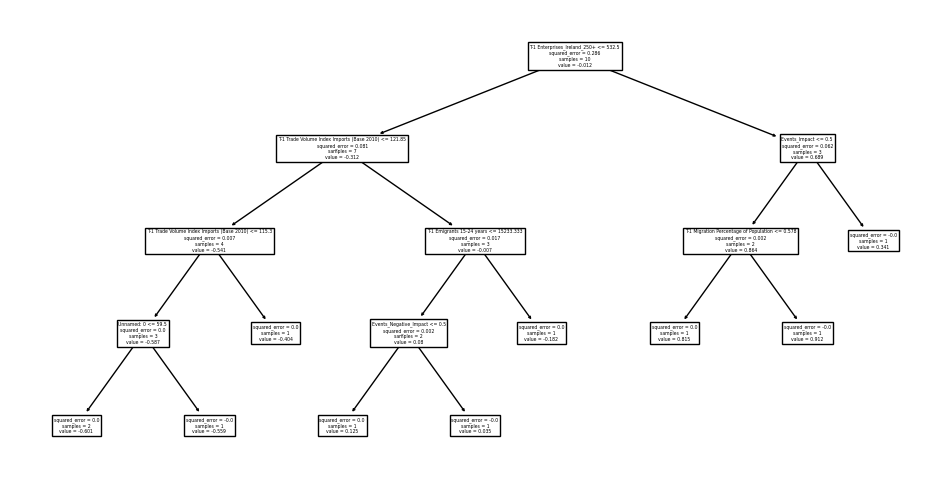

In [173]:
# plot tree
plt.figure(figsize=(12,6))
plot_tree(model, feature_names=list(X.columns))
plt.show()


In [174]:
# Predict using the model
y_pred = model.predict(X_test)

# Create a DataFrame for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).dropna()
print(comparison)

        Actual  Predicted
Year                     
2019  0.891710   0.912207
2020  0.896621   0.340670
2021  0.433127   0.912207


In [175]:
# Extract the filtered y_test and y_pred
y_test_filtered = comparison['Actual']
y_pred_filtered = comparison['Predicted']

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


MAE: 0.3518427933946316
MSE: 0.1796731985518628
RMSE: 0.4238787545417472


C:\Users\joosl\AppData\Local\Temp\ipykernel_34944\2132997988.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Net_Migration_na['predicted_values'] = model.predict(X)


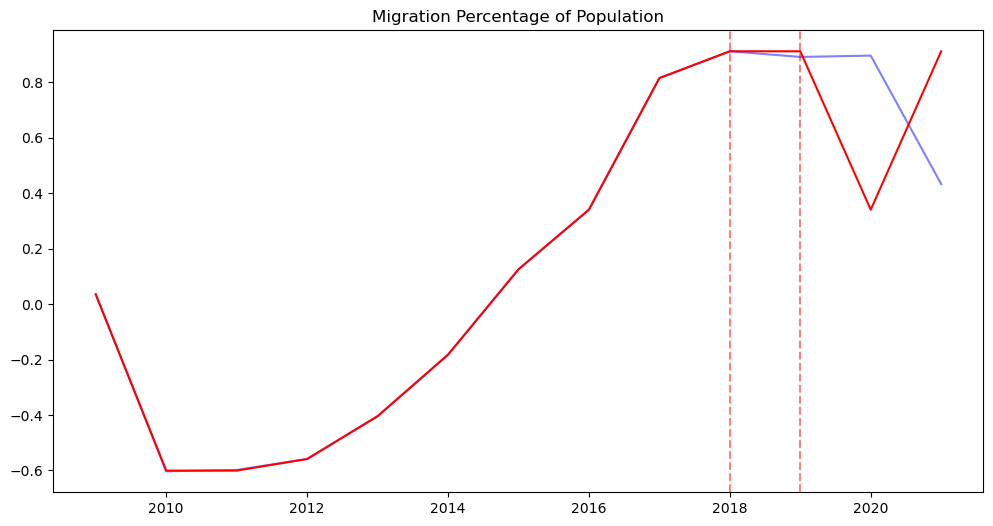

In [176]:
# plot data
Net_Migration_na['predicted_values'] = model.predict(X)
plt.figure(figsize=(12,6))
plt.plot(Net_Migration_na['Migration Percentage of Population'], color='blue', alpha=0.5)
plt.plot(Net_Migration_na['predicted_values'], color='red')

# add line at 2019
plt.axvline(x=2019, color='red', linestyle='--', alpha=0.5)
plt.axvline(x=2018, color='red', linestyle='--', alpha=0.5)



plt.title('Migration Percentage of Population')
plt.show()

# Descision Tree with selected variables

In [195]:
# Decision tree
Net_Migration_na = Net_Migration[['Migration Percentage of Population', 'T-1 Migration Percentage of Population', 'T-1 General Surplus/Deficit (Million Euros)','T-1 Crisis Indicator']].dropna()

# X drop the target variable
X = Net_Migration_na.drop(columns=['Migration Percentage of Population'])
y = Net_Migration_na['Migration Percentage of Population']

# Split the data into training and testing sets
split_index = int(len(X) * 0.8)
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

# Create a decision tree regressor
model = DecisionTreeRegressor(max_depth=3)
model.fit(X_train, y_train)

model.score(X_test, y_test)


-7.134126694154217

In [196]:
X.columns

# X.columns as list
features = list(X.columns)
features

['T-1 Migration Percentage of Population',
 'T-1 General Surplus/Deficit (Million Euros)',
 'T-1 Crisis Indicator']

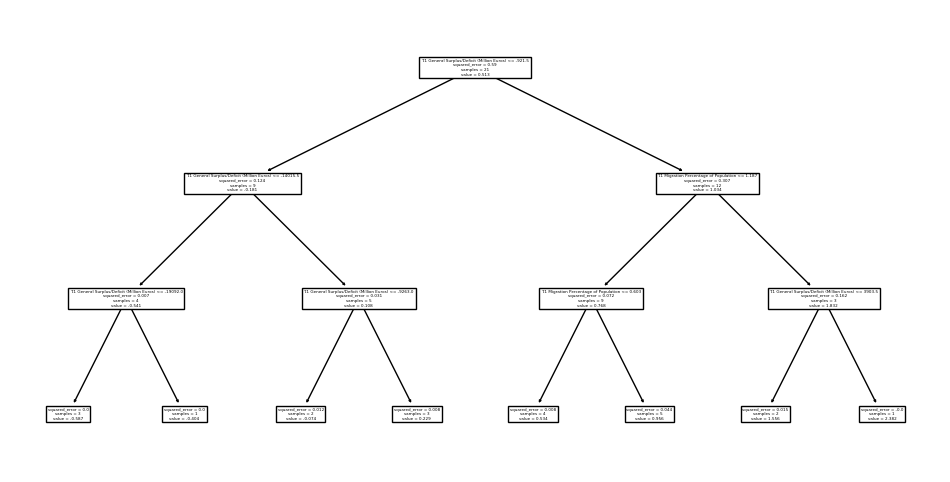

In [197]:
# plot tree
plt.figure(figsize=(12,6))
plot_tree(model, feature_names=list(X.columns))
plt.show()


In [198]:
# Predict using the model
y_pred = model.predict(X_test)

# Create a DataFrame for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).dropna()
print(comparison)

        Actual  Predicted
Year                     
2017  0.815412   0.228693
2018  0.912207   0.955529
2019  0.891710   0.955529
2020  0.896621   0.955529
2021  0.433127  -0.404428
2022  1.008354   0.228693


In [199]:
# Extract the filtered y_test and y_pred
y_test_filtered = comparison['Actual']
y_pred_filtered = comparison['Predicted']

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


MAE: 0.3949968788878007
MSE: 0.27717102707173435
RMSE: 0.5264703477611388


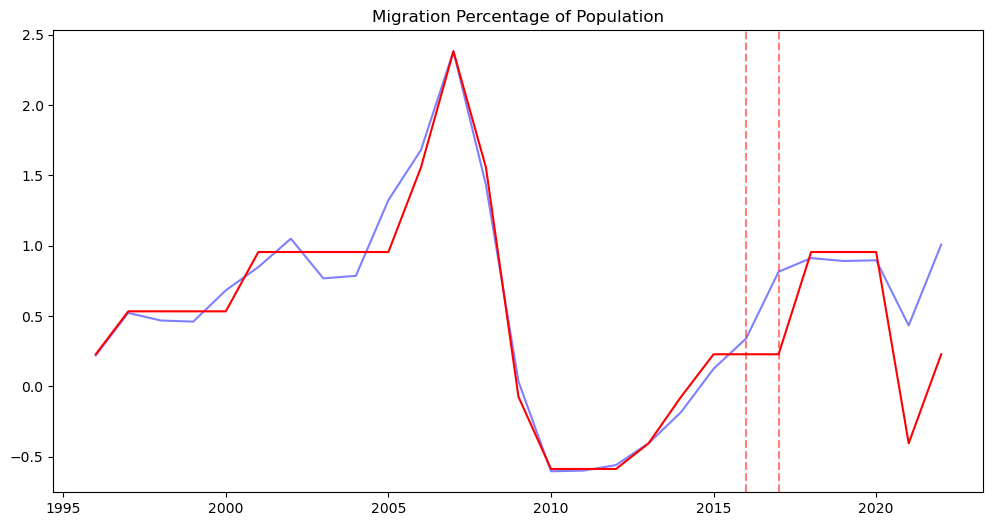

In [200]:
# plot data
Net_Migration_na['predicted_values'] = model.predict(X)
plt.figure(figsize=(12,6))
plt.plot(Net_Migration_na['Migration Percentage of Population'], color='blue', alpha=0.5)
plt.plot(Net_Migration_na['predicted_values'], color='red')

# add line at 2016.5
plt.axvline(x=2016, color='red', linestyle='--', alpha=0.5)
plt.axvline(x=2017, color='red', linestyle='--', alpha=0.5)


plt.title('Migration Percentage of Population')
plt.show()

# Random Forest

In [159]:
# random forest model

Net_Migration_na = Net_Migration.dropna()
# [['Migration Percentage of Population', 'T-1 Migration Percentage of Population', 'T-1 General Surplus/Deficit (Million Euros)','T-1 Crisis Indicator']]
# X drop the target variable
X = Net_Migration_na.drop(columns=['Migration Percentage of Population'])
y = Net_Migration_na['Migration Percentage of Population']

# Split the data into training and testing sets
split_index = int(len(X) * 0.8)
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

# Create a random forest regressor
model = RandomForestRegressor(n_estimators=100, max_depth=4)
model.fit(X_train, y_train)

model.score(X_test, y_test)


0.6113018985387759

In [160]:
X.columns

# X.columns as list
features = list(X.columns)
features

['Unnamed: 0',
 'T-1 Net migration 25-44 years',
 'T-1 Enterprises_Ireland_250+',
 'T-1 General Surplus/Deficit (Million Euros)',
 'T-1 Trade Volume Index Imports (Base 2010)',
 'T-1 Housing_CPI',
 'T-1 Trade Volume Index Exports (Base 2010)',
 'T-1 Unemployment rate_Ireland_Total_Foreign-born',
 'T-1 Emigrants 15-24 years',
 'T-1 Emigrants_EU15 to EU27',
 'T-1 South Asia Percentage Change',
 'T-1 Migration Percentage of Population',
 'T-1 Crisis Indicator',
 'Events_Positive_Impact',
 'Events_Negative_Impact',
 'Events_Impact']

In [161]:
# Predict using the model
y_pred = model.predict(X_test)

# Create a DataFrame for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).dropna()
print(comparison)

        Actual  Predicted
Year                     
2019  0.891710   0.801857
2020  0.896621   0.779871
2021  0.433127   0.615831


In [162]:
# Extract the filtered y_test and y_pred
y_test_filtered = comparison['Actual']
y_pred_filtered = comparison['Predicted']

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.12976895522041884
MSE: 0.01836163056593335
RMSE: 0.13550509424347615


C:\Users\joosl\AppData\Local\Temp\ipykernel_4520\192340859.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Net_Migration_na['predicted_values'] = model.predict(X)


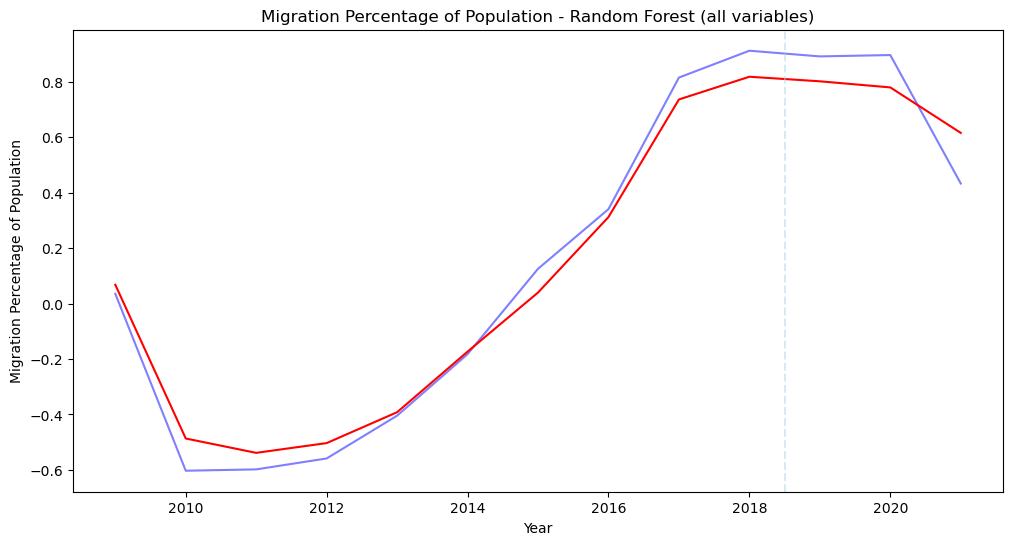

In [164]:
# plot data
Net_Migration_na['predicted_values'] = model.predict(X)
plt.figure(figsize=(12,6))
plt.plot(Net_Migration_na['Migration Percentage of Population'], color='blue', alpha=0.5)
plt.plot(Net_Migration_na['predicted_values'], color='red')

# add line
plt.axvline(x=2018.5, color='lightblue', linestyle='--', alpha=0.5)


plt.title('Migration Percentage of Population - Random Forest (all variables)')
plt.xlabel('Year')
plt.ylabel('Migration Percentage of Population')

plt.show()

# Random Forest with selected variables

In [213]:
# random forest model

Net_Migration_na = Net_Migration[['Migration Percentage of Population', 'T-1 Migration Percentage of Population', 'T-1 General Surplus/Deficit (Million Euros)','T-1 Crisis Indicator']].dropna()
# X drop the target variable
X = Net_Migration_na.drop(columns=['Migration Percentage of Population'])
y = Net_Migration_na['Migration Percentage of Population']

# Split the data into training and testing sets
split_index = int(len(X) * 0.8)
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

# Create a random forest regressor
model = RandomForestRegressor(n_estimators=100, max_depth=4)
model.fit(X_train, y_train)

model.score(X_test, y_test)


-3.364944754104182

In [214]:
X.columns

# X.columns as list
features = list(X.columns)
features

['T-1 Migration Percentage of Population',
 'T-1 General Surplus/Deficit (Million Euros)',
 'T-1 Crisis Indicator']

In [215]:
# Predict using the model
y_pred = model.predict(X_test)

# Create a DataFrame for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).dropna()
print(comparison)

        Actual  Predicted
Year                     
2017  0.815412   0.410890
2018  0.912207   0.818252
2019  0.891710   0.995715
2020  0.896621   1.058215
2021  0.433127   0.055107
2022  1.008354   0.273424


In [216]:
# Extract the filtered y_test and y_pred
y_test_filtered = comparison['Actual']
y_pred_filtered = comparison['Predicted']

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.3128373906354796
MSE: 0.1487358466491446
RMSE: 0.385662866567608


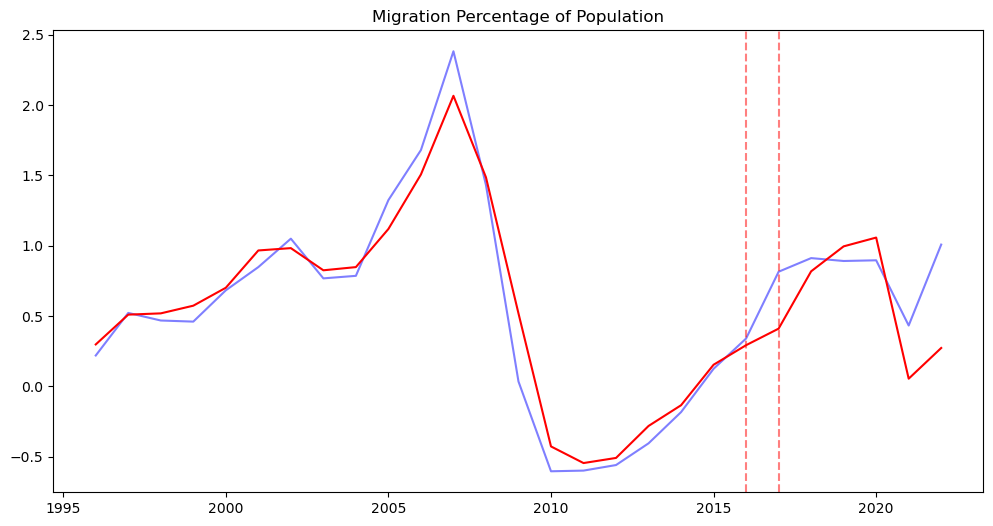

In [217]:
# plot data
Net_Migration_na['predicted_values'] = model.predict(X)
plt.figure(figsize=(12,6))
plt.plot(Net_Migration_na['Migration Percentage of Population'], color='blue', alpha=0.5)
plt.plot(Net_Migration_na['predicted_values'], color='red')

# add line at 2016.5
plt.axvline(x=2016, color='red', linestyle='--', alpha=0.5)
plt.axvline(x=2017, color='red', linestyle='--', alpha=0.5)


plt.title('Migration Percentage of Population')
plt.show()

# XGBoost Tree

In [152]:
# xgboost model

Net_Migration_na = Net_Migration.dropna()

# X drop the target variable
X = Net_Migration_na.drop(columns=['Migration Percentage of Population'])
y = Net_Migration_na['Migration Percentage of Population']

# Split the data into training and testing sets
split_index = int(len(X) * 0.8)
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

# Create a xgboost regressor
model = XGBRegressor(n_estimators=100, max_depth=4)
model.fit(X_train, y_train)

model.score(X_test, y_test)


-0.6152183168040102

In [153]:
X.columns

# X.columns as list
features = list(X.columns)
features

['Unnamed: 0',
 'T-1 Net migration 25-44 years',
 'T-1 Enterprises_Ireland_250+',
 'T-1 General Surplus/Deficit (Million Euros)',
 'T-1 Trade Volume Index Imports (Base 2010)',
 'T-1 Housing_CPI',
 'T-1 Trade Volume Index Exports (Base 2010)',
 'T-1 Unemployment rate_Ireland_Total_Foreign-born',
 'T-1 Emigrants 15-24 years',
 'T-1 Emigrants_EU15 to EU27',
 'T-1 South Asia Percentage Change',
 'T-1 Migration Percentage of Population',
 'T-1 Crisis Indicator',
 'Events_Positive_Impact',
 'Events_Negative_Impact',
 'Events_Impact']

In [154]:
# Predict using the model
y_pred = model.predict(X_test)

# Create a DataFrame for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).dropna()
print(comparison)

        Actual  Predicted
Year                     
2019  0.891710   0.910962
2020  0.896621   0.910962
2021  0.433127   0.910962


In [155]:
# Extract the filtered y_test and y_pred
y_test_filtered = comparison['Actual']
y_pred_filtered = comparison['Predicted']

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.170476311994979
MSE: 0.07630096958279733
RMSE: 0.27622630139578913


C:\Users\joosl\AppData\Local\Temp\ipykernel_4520\1354451791.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Net_Migration_na['predicted_values'] = model.predict(X)


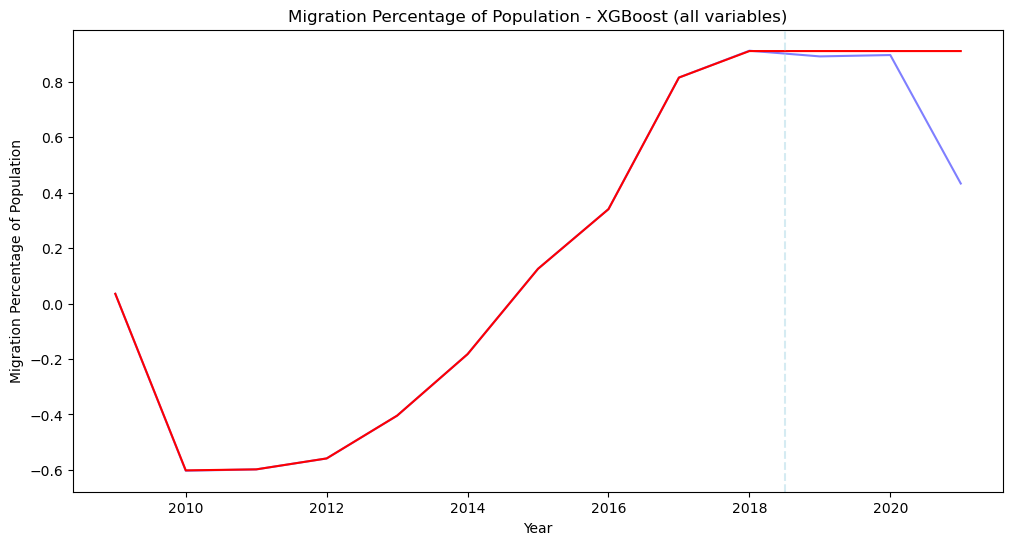

In [158]:
# plot data
Net_Migration_na['predicted_values'] = model.predict(X)
plt.figure(figsize=(12,6))
plt.plot(Net_Migration_na['Migration Percentage of Population'], color='blue', alpha=0.5)
plt.plot(Net_Migration_na['predicted_values'], color='red')

# add line
plt.axvline(x=2018.5, color='lightblue', linestyle='--', alpha=0.5)


plt.title('Migration Percentage of Population - XGBoost (all variables)')
plt.xlabel('Year')
plt.ylabel('Migration Percentage of Population')

plt.show()

# XGBoost Tree with selected variables

In [238]:
# xgboost model

Net_Migration_na = Net_Migration[['Migration Percentage of Population', 'T-1 Migration Percentage of Population', 'T-1 General Surplus/Deficit (Million Euros)','T-1 Crisis Indicator']].dropna()

# X drop the target variable
X = Net_Migration_na.drop(columns=['Migration Percentage of Population'])
y = Net_Migration_na['Migration Percentage of Population']

# Split the data into training and testing sets
split_index = int(len(X) * 0.8)
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

# Create a xgboost regressor
model = XGBRegressor(n_estimators=100, max_depth=4)
model.fit(X_train, y_train)

model.score(X_test, y_test)


-7.651215283536866

In [239]:
X.columns

# X.columns as list
features = list(X.columns)
features

['T-1 Migration Percentage of Population',
 'T-1 General Surplus/Deficit (Million Euros)',
 'T-1 Crisis Indicator']

In [240]:
# Predict using the model
y_pred = model.predict(X_test)

# Create a DataFrame for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).dropna()
print(comparison)

        Actual  Predicted
Year                     
2017  0.815412   0.346398
2018  0.912207   0.411226
2019  0.891710   1.013507
2020  0.896621   1.044131
2021  0.433127  -0.388553
2022  1.008354   0.242823


In [241]:
# Extract the filtered y_test and y_pred
y_test_filtered = comparison['Actual']
y_pred_filtered = comparison['Predicted']

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.47108543186045404
MSE: 0.29479086270931604
RMSE: 0.5429464639440209


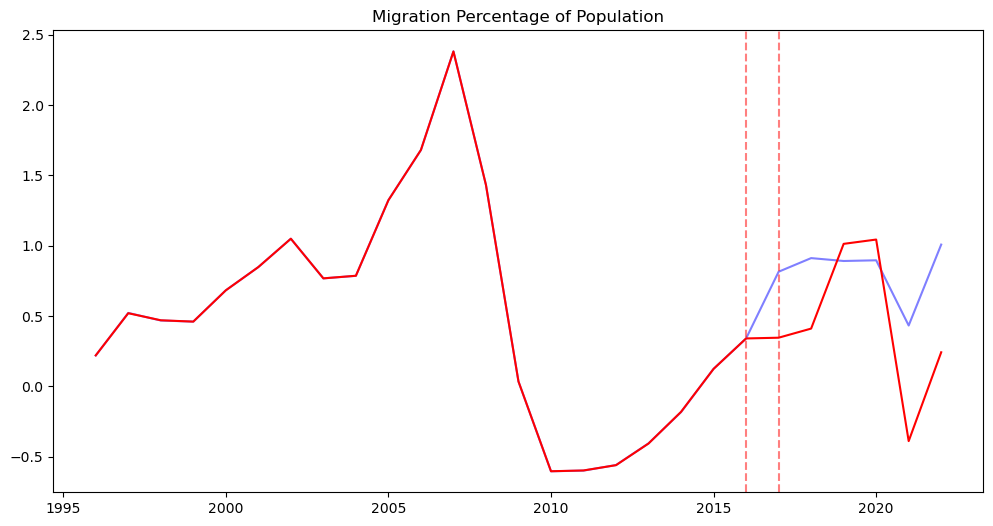

In [242]:
# plot data
Net_Migration_na['predicted_values'] = model.predict(X)
plt.figure(figsize=(12,6))
plt.plot(Net_Migration_na['Migration Percentage of Population'], color='blue', alpha=0.5)
plt.plot(Net_Migration_na['predicted_values'], color='red')

# add line
plt.axvline(x=2016, color='red', linestyle='--', alpha=0.5)
plt.axvline(x=2017, color='red', linestyle='--', alpha=0.5)


plt.title('Migration Percentage of Population')
plt.show()

# Neural Network

In [343]:
# neural network model

Net_Migration_na = Net_Migration.dropna()

# X drop the target variable
X = Net_Migration_na.drop(columns=['Migration Percentage of Population'])
y = Net_Migration_na['Migration Percentage of Population']

# Split the data into training and testing sets
split_index = int(len(X) * 0.8)
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

# Create a neural network regressor
model = MLPRegressor(hidden_layer_sizes=(1000, 500), max_iter=1000)
model.fit(X_train, y_train)

model.score(X_test, y_test)

-33428.66996934126

In [344]:
X.columns

# X.columns as list
features = list(X.columns)
features

['Unnamed: 0',
 'T-1 Net migration 25-44 years',
 'T-1 Enterprises_Ireland_250+',
 'T-1 General Surplus/Deficit (Million Euros)',
 'T-1 Trade Volume Index Imports (Base 2010)',
 'T-1 Housing_CPI',
 'T-1 Trade Volume Index Exports (Base 2010)',
 'T-1 Unemployment rate_Ireland_Total_Foreign-born',
 'T-1 Emigrants 15-24 years',
 'T-1 Emigrants_EU15 to EU27',
 'T-1 South Asia Percentage Change',
 'T-1 Migration Percentage of Population',
 'T-1 Crisis Indicator',
 'Events_Positive_Impact',
 'Events_Negative_Impact',
 'Events_Impact']

In [345]:
# Predict using the model
y_pred = model.predict(X_test)

# Create a DataFrame for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).dropna()
print(comparison)

        Actual  Predicted
Year                     
2019  0.891710 -32.799127
2020  0.896621 -58.976623
2021  0.433127  -3.768566


In [346]:
# Extract the filtered y_test and y_pred
y_test_filtered = comparison['Actual']
y_pred_filtered = comparison['Predicted']

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 32.5885915339582
MSE: 1579.1773811361275
RMSE: 39.73886486974845


C:\Users\joosl\AppData\Local\Temp\ipykernel_34944\1727713201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Net_Migration_na['predicted_values'] = model.predict(X)


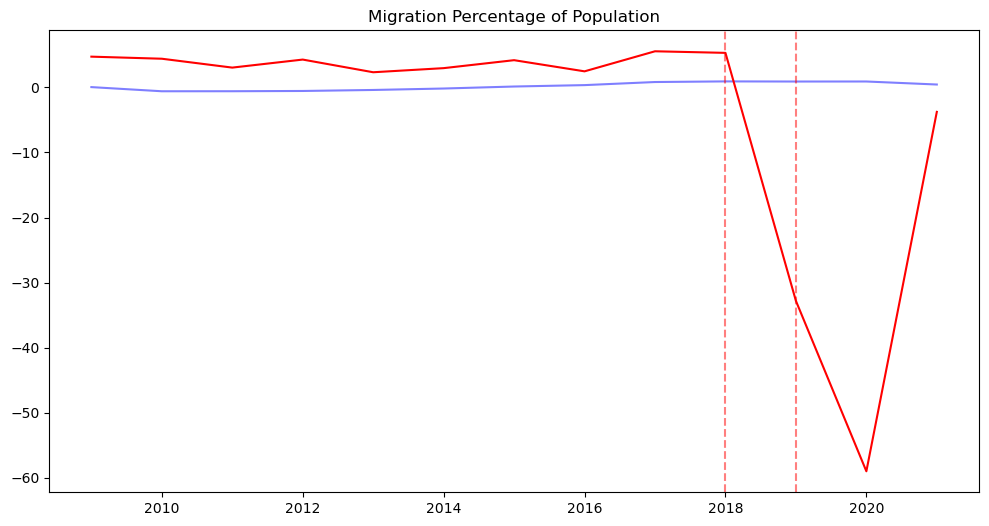

In [347]:
# plot data
Net_Migration_na['predicted_values'] = model.predict(X)
plt.figure(figsize=(12,6))
plt.plot(Net_Migration_na['Migration Percentage of Population'], color='blue', alpha=0.5)
plt.plot(Net_Migration_na['predicted_values'], color='red')

# add line
plt.axvline(x=2018, color='red', linestyle='--', alpha=0.5)
plt.axvline(x=2019, color='red', linestyle='--', alpha=0.5)


plt.title('Migration Percentage of Population')
plt.show()

# Neural Network with selected variables

In [320]:
# neural network model

Net_Migration_na = Net_Migration[['Migration Percentage of Population', 'T-1 Migration Percentage of Population', 'T-1 General Surplus/Deficit (Million Euros)','T-1 Crisis Indicator']].dropna()

# X drop the target variable
X = Net_Migration_na.drop(columns=['Migration Percentage of Population'])
y = Net_Migration_na['Migration Percentage of Population']

# Split the data into training and testing sets
split_index = int(len(X) * 0.8)
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

# Create a neural network regressor
model = MLPRegressor(hidden_layer_sizes=(1000, 500), max_iter=1000)
model.fit(X_train, y_train)

model.score(X_test, y_test)

-5857.976283716734

In [321]:
X.columns

# X.columns as list
features = list(X.columns)
features

['T-1 Migration Percentage of Population',
 'T-1 General Surplus/Deficit (Million Euros)',
 'T-1 Crisis Indicator']

In [322]:
# Predict using the model
y_pred = model.predict(X_test)

# Create a DataFrame for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).dropna()
print(comparison)

        Actual  Predicted
Year                     
2017  0.815412   3.700008
2018  0.912207   1.561642
2019  0.891710   0.580512
2020  0.896621   2.026035
2021  0.433127  33.212889
2022  1.008354  11.649910


In [323]:
# Extract the filtered y_test and y_pred
y_test_filtered = comparison['Actual']
y_pred_filtered = comparison['Predicted']

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 8.065993500396347
MSE: 199.64509224005351
RMSE: 14.129582167921793


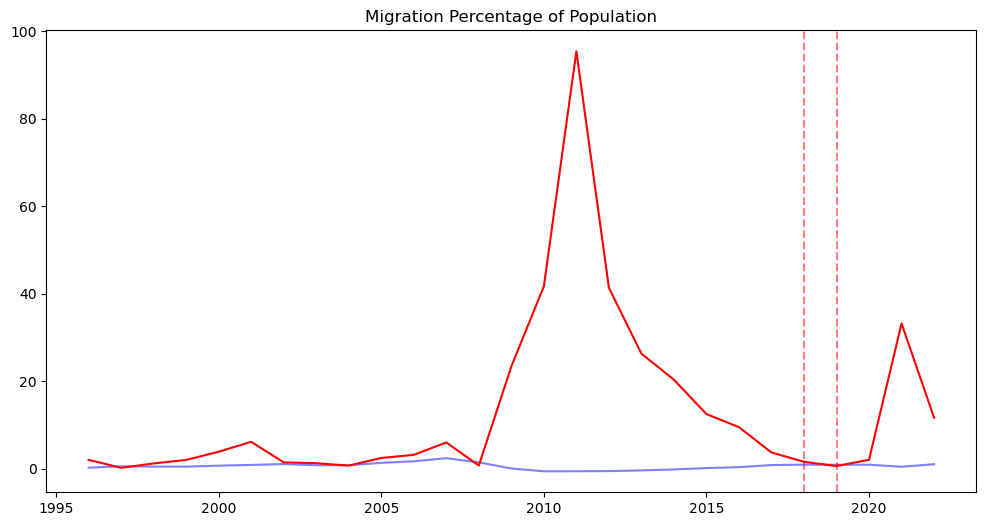

In [324]:
# plot data
Net_Migration_na['predicted_values'] = model.predict(X)
plt.figure(figsize=(12,6))
plt.plot(Net_Migration_na['Migration Percentage of Population'], color='blue', alpha=0.5)
plt.plot(Net_Migration_na['predicted_values'], color='red')

# add line
plt.axvline(x=2018, color='red', linestyle='--', alpha=0.5)
plt.axvline(x=2019, color='red', linestyle='--', alpha=0.5)


plt.title('Migration Percentage of Population')
plt.show()

# ARIMAX(1,0,3) with selected variables

In [ ]:
# arima model
Net_Migration_na = Net_Migration[['Migration Percentage of Population', 'T-1 Migration Percentage of Population', 'T-1 General Surplus/Deficit (Million Euros)','T-1 Crisis Indicator']].dropna()

# X drop the target variable
X = Net_Migration_na.drop(columns=['Migration Percentage of Population'])
y = Net_Migration_na['Migration Percentage of Population']

# Split the data into training and testing sets
split_index = int(len(X) * 0.8)
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

# arima model including exogenous variables
model = ARIMA(y_train, order=(1, 0, 3), exog=X_train)
model_fit = model.fit()

model_fit.summary()

c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-package

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:     Migration Percentage of Population   No. Observations:                   21
Model:                                 ARIMA(1, 0, 3)   Log Likelihood                 -16.201
Date:                                Tue, 28 May 2024   AIC                             50.402
Time:                                        14:49:53   BIC                             59.802
Sample:                                             0   HQIC                            52.442
                                                 - 21                                         
Covariance Type:                                  opg                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                           0.5775      0.686      0.842      0.400      -0.767       1.922
T-1 Migration Percentage of Population          0.6069      0.233      2.601      0.009       0.150       1.064
T-1 General Surplus/Deficit (Million Euros)  2.442e-06   1.77e-05      0.138      0.890   -3.22e-05    3.71e-05
T-1 Crisis Indicator                           -0.2194      0.055     -3.984      0.000      -0.327      -0.111
ar.L1                                           0.9200      0.230      4.008      0.000       0.470       1.370
ma.L1                                       -6.683e-10      0.382  -1.75e-09      1.000      -0.749       0.749
ma.L2                                        1.265e-10      0.432   2.93e-10      1.000      -0.847       0.847
ma.L3                                       -1.977e-10      0.381  -5.19e-10      1.000      -0.747       0.747
sigma2                                          0.0579      0.019      3.007      0.003       0.020       0.096
===================================================================================
Ljung-Box (L1) (Q):                   3.22   Jarque-Bera (JB):                 2.86
Prob(Q):                              0.07   Prob(JB):                         0.24
Heteroskedasticity (H):               0.78   Skew:                            -0.76
Prob(H) (two-sided):                  0.75   Kurtosis:                         3.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
X.columns

# X.columns as list
features = list(X.columns)
features

['T-1 Migration Percentage of Population',
 'T-1 General Surplus/Deficit (Million Euros)',
 'T-1 Crisis Indicator']

In [ ]:
# Predict using the model and specify the index
y_pred = model_fit.forecast(steps=len(X_test), exog=X_test).values

# Create a DataFrame for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).dropna()  
print(comparison)

# Extract the filtered y_test and y_pred
y_test_filtered = comparison['Actual']
y_pred_filtered = comparison['Predicted']


        Actual  Predicted
Year                     
2017  0.815412   0.705063
2018  0.912207   1.002087
2019  0.891710   1.069459
2020  0.896621   1.065106
2021  0.433127   0.584188
2022  1.008354   0.556122


c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test_filtered, y_pred_filtered))
print('MSE:', metrics.mean_squared_error(y_test_filtered, y_pred_filtered))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_filtered, y_pred_filtered)))

MAE: 0.19162583947139256
MSE: 0.05126167375566526
RMSE: 0.22641040999844786


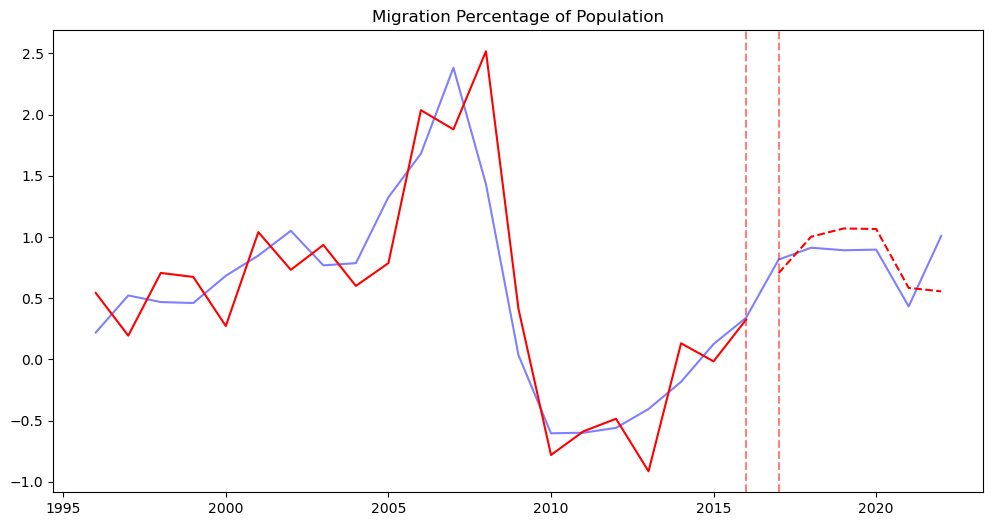

In [ ]:
# plot data
Net_Migration_na['predicted_values'] = comparison['Predicted']
Net_Migration_na['fitted_values'] = model_fit.fittedvalues
plt.figure(figsize=(12,6))
plt.plot(Net_Migration_na['Migration Percentage of Population'], color='blue', alpha=0.5)
plt.plot(Net_Migration_na['predicted_values'], color='red', linestyle='dashed')
plt.plot(Net_Migration_na['fitted_values'], color='red')


# add line at 2016.5
plt.axvline(x=2016, color='red', linestyle='--', alpha=0.5)
plt.axvline(x=2017, color='red', linestyle='--', alpha=0.5)


plt.title('Migration Percentage of Population')
plt.show()

# ARIMAX(1,1,3) with selected variables

In [188]:
# arima model
Net_Migration_na = Net_Migration[['Migration Percentage of Population', 'T-1 Migration Percentage of Population', 'T-1 General Surplus/Deficit (Million Euros)','T-1 Crisis Indicator']].dropna()

# X drop the target variable
X = Net_Migration_na.drop(columns=['Migration Percentage of Population'])
y = Net_Migration_na['Migration Percentage of Population']

# Split the data into training and testing sets
split_index = int(len(X) * 0.8)
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

# arima model including exogenous variables
model = ARIMA(y_train, order=(1, 1, 3), exog=X_train)
model_fit = model.fit()

model_fit.summary()

c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:     Migration Percentage of Population   No. Observations:                   21
Model:                                 ARIMA(1, 1, 3)   Log Likelihood                 -22.015
Date:                                Wed, 29 May 2024   AIC                             60.030
Time:                                        18:37:53   BIC                             67.996
Sample:                                             0   HQIC                            61.585
                                                 - 21                                         
Covariance Type:                                  opg                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
T-1 Migration Percentage of Population          0.3292      0.453      0.726      0.468      -0.560       1.218
T-1 General Surplus/Deficit (Million Euros) -2.099e-06   7.87e-06     -0.267      0.790   -1.75e-05    1.33e-05
T-1 Crisis Indicator                           -0.1645      0.051     -3.236      0.001      -0.264      -0.065
ar.L1                                           0.8279      0.491      1.688      0.091      -0.134       1.789
ma.L1                                       -8.496e-10      0.514  -1.65e-09      1.000      -1.008       1.008
ma.L2                                        2.612e-10      0.324   8.06e-10      1.000      -0.635       0.635
ma.L3                                       -1.524e-10      0.251  -6.07e-10      1.000      -0.492       0.492
sigma2                                          0.1032      0.029      3.543      0.000       0.046       0.160
===================================================================================
Ljung-Box (L1) (Q):                   6.47   Jarque-Bera (JB):                 5.89
Prob(Q):                              0.01   Prob(JB):                         0.05
Heteroskedasticity (H):               0.87   Skew:                            -1.16
Prob(H) (two-sided):                  0.86   Kurtosis:                         4.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [189]:
X.columns

# X.columns as list
features = list(X.columns)
features

['T-1 Migration Percentage of Population',
 'T-1 General Surplus/Deficit (Million Euros)',
 'T-1 Crisis Indicator']

In [234]:
# Predict using the model and specify the index
y_pred = model_fit.forecast(steps=len(X_test), exog=X_test).values

# Create a DataFrame for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).dropna()  
print(comparison)

# Extract the filtered y_test and y_pred
y_test_filtered = comparison['Actual']
y_pred_filtered = comparison['Predicted']

# get confidence interval
forecast = model_fit.get_forecast(steps=len(X_test),exog=X_test)
yhat_conf_int = forecast.conf_int(alpha=0.05)

yhat_conf_int['year'] = [2017, 2018, 2019, 2020, 2021, 2022]
yhat_conf_int.set_index('year', inplace=True)

lower_bounds = yhat_conf_int[['lower Migration Percentage of Population']]
upper_bounds = yhat_conf_int[['upper Migration Percentage of Population']]

comparison['lower_bounds'] = lower_bounds
comparison['upper_bounds'] = upper_bounds

comparison


        Actual  Predicted
Year                     
2017  0.815412   0.666339
2018  0.912207   0.900509
2019  0.891710   0.996253
2020  0.896621   1.042015
2021  0.433127   0.803045
2022  1.008354   0.827335


c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method

,Actual,Predicted,lower_bounds,upper_bounds
Year,,,,
2017,0.815412,0.666339,0.036703,1.295976
2018,0.912207,0.900509,-0.411387,2.212406
2019,0.891710,0.996253,-1.059330,3.051836
2020,0.896621,1.042015,-1.784358,3.868387
2021,0.433127,0.803045,-2.800647,4.406737
2022,1.008354,0.827335,-3.547588,5.202259


In [201]:
print('MAE:', metrics.mean_absolute_error(y_test_filtered, y_pred_filtered))
print('MSE:', metrics.mean_squared_error(y_test_filtered, y_pred_filtered))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_filtered, y_pred_filtered)))

MAE: 0.16027383266332912
MSE: 0.037339157818129846
RMSE: 0.19323342831438314


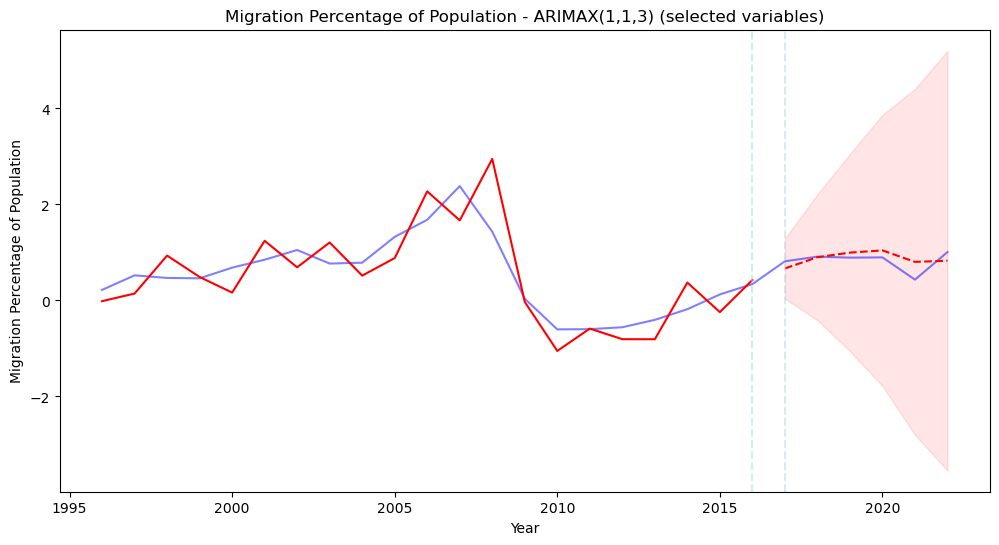

In [235]:
# plot data
Net_Migration_na['predicted_values'] = comparison['Predicted']
Net_Migration_na['fitted_values'] = model_fit.fittedvalues

plt.figure(figsize=(12,6))
plt.plot(Net_Migration_na['Migration Percentage of Population'], color='blue', alpha=0.5)
plt.plot(Net_Migration_na['predicted_values'], color='red', linestyle='dashed')
plt.plot(Net_Migration_na['fitted_values'], color='red')


# Plotting the predicted values and confidence intervals for the test set
plt.fill_between(comparison.index, comparison['lower_bounds'], comparison['upper_bounds'], color='red', alpha=0.1, label='95% CI')


# add line at 2016.5
plt.axvline(x=2016, color='lightblue', linestyle='--', alpha=0.5)
plt.axvline(x=2017, color='lightblue', linestyle='--', alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Migration Percentage of Population')


plt.title('Migration Percentage of Population - ARIMAX(1,1,3) (selected variables)')
plt.show()

# ARIMAX(1,0,1) with unemployment variable

In [462]:
Net_Migration.columns

Index(['Unnamed: 0', 'Migration Percentage of Population',
       'T-1 Net migration 25-44 years', 'T-1 Enterprises_Ireland_250+',
       'T-1 General Surplus/Deficit (Million Euros)',
       'T-1 Trade Volume Index Imports (Base 2010)', 'T-1 Housing_CPI',
       'T-1 Trade Volume Index Exports (Base 2010)',
       'T-1 Unemployment rate_Ireland_Total_Foreign-born',
       'T-1 Emigrants 15-24 years', 'T-1 Emigrants_EU15 to EU27',
       'T-1 South Asia Percentage Change',
       'T-1 Migration Percentage of Population', 'T-1 Crisis Indicator',
       'Events_Positive_Impact', 'Events_Negative_Impact', 'Events_Impact'],
      dtype='object')

In [71]:
# arima model
Net_Migration_na = Net_Migration[['Migration Percentage of Population', 'T-1 Unemployment rate_Ireland_Total_Foreign-born']].dropna()

# X drop the target variable
X = Net_Migration_na.drop(columns=['Migration Percentage of Population'])
y = Net_Migration_na['Migration Percentage of Population']

# Split the data into training and testing sets
split_index = int(len(X) * 0.8)
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

# arima model including exogenous variables
model = ARIMA(y_train, order=(1, 0, 1), exog=X_train)
model_fit = model.fit()

model_fit.summary()

c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:     Migration Percentage of Population   No. Observations:                   17
Model:                                 ARIMA(1, 0, 1)   Log Likelihood                  -5.967
Date:                                Wed, 29 May 2024   AIC                             21.933
Time:                                        12:17:24   BIC                             26.099
Sample:                                             0   HQIC                            22.347
                                                 - 17                                         
Covariance Type:                                  opg                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                1.7388      0.881      1.974      0.048       0.013       3.465
T-1 Unemployment rate_Ireland_Total_Foreign-born    -0.1193      0.126     -0.944      0.345      -0.367       0.128
ar.L1                                                0.1287      0.366      0.351      0.725      -0.589       0.847
ma.L1                                                0.9995    135.533      0.007      0.994    -264.641     266.640
sigma2                                               0.0983     13.295      0.007      0.994     -25.960      26.156
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 3.15
Prob(Q):                              0.79   Prob(JB):                         0.21
Heteroskedasticity (H):               0.16   Skew:                             0.79
Prob(H) (two-sided):                  0.04   Kurtosis:                         4.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [72]:
X.columns

# X.columns as list
features = list(X.columns)
features

['T-1 Unemployment rate_Ireland_Total_Foreign-born']

In [73]:
# Predict using the model and specify the index
y_pred = model_fit.forecast(steps=len(X_test), exog=X_test).values

# Create a DataFrame for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).dropna()  
print(comparison)

# Extract the filtered y_test and y_pred
y_test_filtered = comparison['Actual']
y_pred_filtered = comparison['Predicted']


        Actual  Predicted
Year                     
2018  0.912207   0.951203
2019  0.891710   0.904102
2020  0.896621   1.037835
2021  0.433127   0.844124
2022  1.008354   0.843769


c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [74]:
print('MAE:', metrics.mean_absolute_error(y_test_filtered, y_pred_filtered))
print('MSE:', metrics.mean_squared_error(y_test_filtered, y_pred_filtered))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_filtered, y_pred_filtered)))

MAE: 0.15363651991161237
MSE: 0.043524349086849067
RMSE: 0.20862490044778706


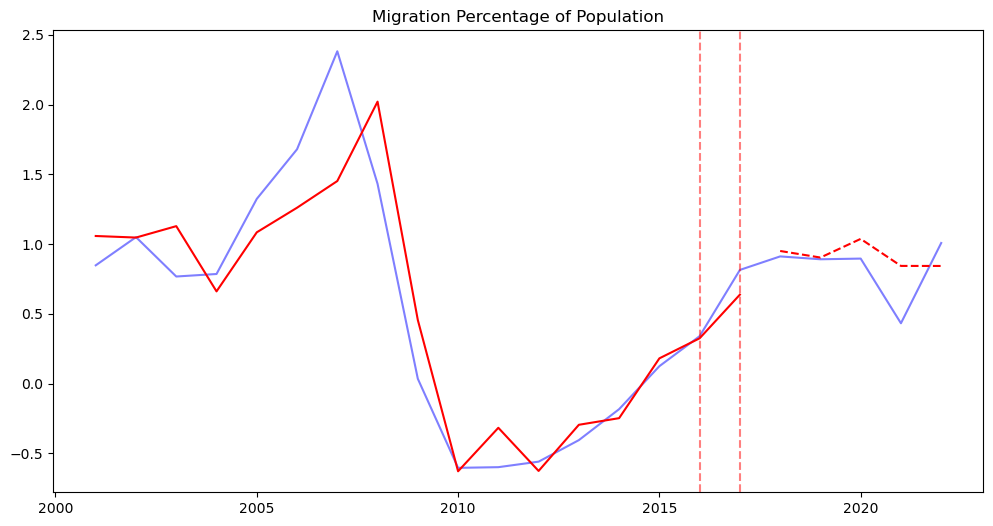

In [493]:
# plot data
Net_Migration_na['predicted_values'] = comparison['Predicted']
Net_Migration_na['fitted_values'] = model_fit.fittedvalues
plt.figure(figsize=(12,6))
plt.plot(Net_Migration_na['Migration Percentage of Population'], color='blue', alpha=0.5)
plt.plot(Net_Migration_na['predicted_values'], color='red', linestyle='dashed')
plt.plot(Net_Migration_na['fitted_values'], color='red')


# add line at 2016.5
plt.axvline(x=2016, color='red', linestyle='--', alpha=0.5)
plt.axvline(x=2017, color='red', linestyle='--', alpha=0.5)


plt.title('Migration Percentage of Population')
plt.show()

# ARIMAX(1,1,1) with unemployment variable

In [ ]:
Net_Migration.columns

Index(['Unnamed: 0', 'Migration Percentage of Population',
       'T-1 Net migration 25-44 years', 'T-1 Enterprises_Ireland_250+',
       'T-1 General Surplus/Deficit (Million Euros)',
       'T-1 Trade Volume Index Imports (Base 2010)', 'T-1 Housing_CPI',
       'T-1 Trade Volume Index Exports (Base 2010)',
       'T-1 Unemployment rate_Ireland_Total_Foreign-born',
       'T-1 Emigrants 15-24 years', 'T-1 Emigrants_EU15 to EU27',
       'T-1 South Asia Percentage Change',
       'T-1 Migration Percentage of Population', 'T-1 Crisis Indicator',
       'Events_Positive_Impact', 'Events_Negative_Impact', 'Events_Impact'],
      dtype='object')

In [170]:
# arima model
Net_Migration_na = Net_Migration[['Migration Percentage of Population', 'T-1 Unemployment rate_Ireland_Total_Foreign-born']].dropna()

# X drop the target variable
X = Net_Migration_na.drop(columns=['Migration Percentage of Population'])
y = Net_Migration_na['Migration Percentage of Population']

# Split the data into training and testing sets
split_index = int(len(X) * 0.8)
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

# arima model including exogenous variables
model = ARIMA(y_train, order=(1, 1, 3), exog=X_train)
model_fit = model.fit()

model_fit.summary()

c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:     Migration Percentage of Population   No. Observations:                   17
Model:                                 ARIMA(1, 1, 3)   Log Likelihood                  -6.278
Date:                                Wed, 29 May 2024   AIC                             24.555
Time:                                        13:10:09   BIC                             29.191
Sample:                                             0   HQIC                            24.793
                                                 - 17                                         
Covariance Type:                                  opg                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
T-1 Unemployment rate_Ireland_Total_Foreign-born    -0.1149      0.052     -2.191      0.028      -0.218      -0.012
ar.L1                                               -0.5108      1.868     -0.274      0.784      -4.171       3.149
ma.L1                                                0.9855   1.23e+04   8.03e-05      1.000    -2.4e+04     2.4e+04
ma.L2                                               -0.9999   6788.847     -0.000      1.000   -1.33e+04    1.33e+04
ma.L3                                               -0.9856    1.3e+04  -7.57e-05      1.000   -2.55e+04    2.55e+04
sigma2                                               0.0784   1036.282   7.57e-05      1.000   -2030.997    2031.154
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.69
Prob(Q):                              0.83   Prob(JB):                         0.71
Heteroskedasticity (H):               0.22   Skew:                             0.13
Prob(H) (two-sided):                  0.12   Kurtosis:                         3.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [171]:
X.columns

# X.columns as list
features = list(X.columns)
features

['T-1 Unemployment rate_Ireland_Total_Foreign-born']

In [172]:
# Predict using the model and specify the index
y_pred = model_fit.forecast(steps=len(X_test), exog=X_test).values

# Create a DataFrame for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).dropna()  
print(comparison)

# Extract the filtered y_test and y_pred
y_test_filtered = comparison['Actual']
y_pred_filtered = comparison['Predicted']


        Actual  Predicted
Year                     
2018  0.912207   0.943756
2019  0.891710   0.875918
2020  0.896621   1.016823
2021  0.433127   0.837322
2022  1.008354   0.835118


c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [173]:
print('MAE:', metrics.mean_absolute_error(y_test_filtered, y_pred_filtered))
print('MSE:', metrics.mean_squared_error(y_test_filtered, y_pred_filtered))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_filtered, y_pred_filtered)))

MAE: 0.1489944581207645
MSE: 0.04181538862152591
RMSE: 0.20448811364361966


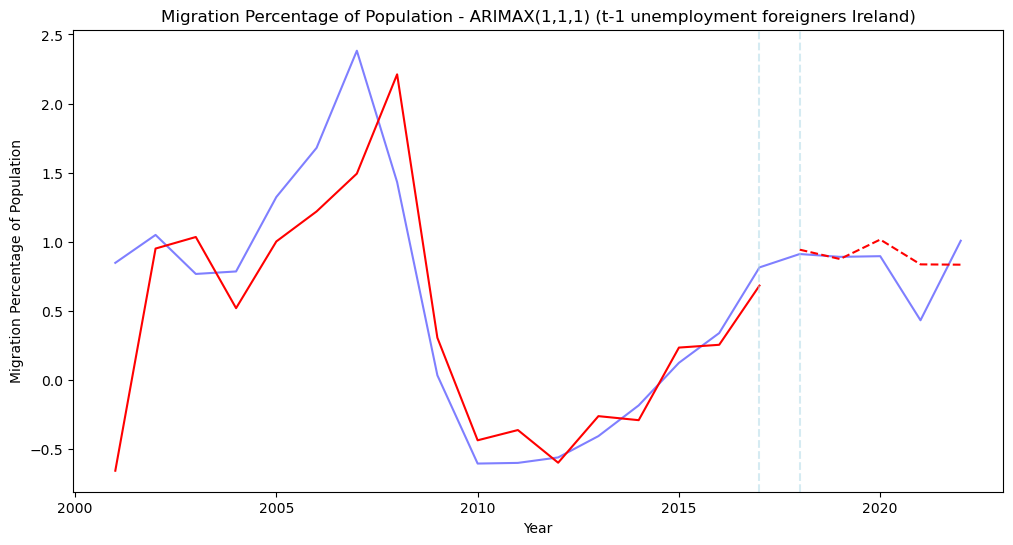

In [174]:
# plot data
Net_Migration_na['predicted_values'] = comparison['Predicted']
Net_Migration_na['fitted_values'] = model_fit.fittedvalues
plt.figure(figsize=(12,6))
plt.plot(Net_Migration_na['Migration Percentage of Population'], color='blue', alpha=0.5)
plt.plot(Net_Migration_na['predicted_values'], color='red', linestyle='dashed')
plt.plot(Net_Migration_na['fitted_values'], color='red')


# add line at 2016.5
plt.axvline(x=2017, color='lightblue', linestyle='--', alpha=0.5)
plt.axvline(x=2018, color='lightblue', linestyle='--', alpha=0.5)


plt.title('Migration Percentage of Population - ARIMAX(1,1,1) (t-1 unemployment foreigners Ireland)')
plt.xlabel('Year')
plt.ylabel('Migration Percentage of Population')

plt.show()

# Final Model (Model T)

In [142]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Migration Percentage of Population   R-squared:                       0.830
Model:                                            OLS   Adj. R-squared:                  0.800
Method:                                 Least Squares   F-statistic:                     27.74
Date:                                Sun, 02 Jun 2024   Prob (F-statistic):           8.91e-07
Time:                                        17:43:57   Log-Likelihood:                -5.6220
No. Observations:                                  21   AIC:                             19.24
Df Residuals:                                      17   BIC:                             23.42
Df Model:                                           3                                         
Covariance Type:                            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                           0.5775      0.144      4.013      0.001       0.274       0.881
T-1 Migration Percentage of Population          0.6069      0.122      4.994      0.000       0.351       0.863
T-1 General Surplus/Deficit (Million Euros)   1.65e-05   7.34e-06      2.249      0.038    1.02e-06     3.2e-05
T-1 Crisis Indicator                           -0.2194      0.085     -2.569      0.020      -0.400      -0.039
==============================================================================
Omnibus:                        1.822   Durbin-Watson:                   1.604
Prob(Omnibus):                  0.402   Jarque-Bera (JB):                1.095
Skew:                           0.559   Prob(JB):                        0.578
Kurtosis:                       2.950   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [260]:
# save the model
final_model.save('final_model.h5')

In [143]:
import pickle

# Specify the file path where you want to save the model
file_path = 'C:\\Users\\joosl\\Downloads\\Courses\\Dissertation\\final_model2.pkl'

# Open a file in binary write mode
with open(file_path, 'wb') as file:
    # Serialize and save the model to the file
    pickle.dump(final_model, file)

print("Model saved successfully using pickle.")


Model saved successfully using pickle.


In [144]:
import dill


# Specify the file path where you want to save the model
file_path = 'C:\\Users\\joosl\\Downloads\\Courses\\Dissertation\\final_model3.pkl'

# Open a file in binary write mode
with open(file_path, 'wb') as file:
    # Serialize and save the model to the file using dill
    dill.dump(final_model, file)

print("Model saved successfully using dill.")

Model saved successfully using dill.
